<a href="https://colab.research.google.com/github/xlzuvekas/Machine-Learning/blob/main/ENCE_3631_Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adv Machine Learning ENCE 3631/4631 
# Homework # 5 

**Xavier Zuvekas**

**Problem #1** 

Implement VGG-16 network architecture [1] in Keras or use the existing 
implementation and apply it to MNIST database. 

i) Train your network from scratch 
(randomly initialize your network) with enough epochs till the training error is 
saturated.

 ii) use a VGG-16 network that is trained on ImageNet (it can be found on 
Keras [2], [3], [4]- see below) and retrain it on MNIST. Report the accuracy and 
training error on both the validation and training set. You need to resize your images, 
so they can be passed to the VGG16 network. Replicate the grayscale channel to 
accommodate for the RGB nature of the input Conv Layer. You also need to adjust 
the last layer of the VGG network to accommodate the MNIST 10 class labels. 

First, let's import the required libraries

In [2]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras
from tqdm import tqdm

from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Success!")

Success!


Now, lets download the dataset and split it into train/test

In [3]:
# Download mnist from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Check the shape of the dataset

#verify train labels
print(ytrain)
#verify shape of xtrain, ytrain
print(xtrain.shape)
print(ytrain.shape)
#verify shape of xtest, ytest
print(xtest.shape)
print(ytest.shape)


[5 0 4 ... 5 6 8]
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Now, we convert the images into 3 channels to account for the RGB Nature of the input conv layer

In [5]:
# Convert the images into 3 channels

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest] * 3)


xtrain.shape,xtest.shape


# Reshape images to use tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

# VGG16 requires 48*48 images

#libraries to quickly reshape images as arrays
from tensorflow.keras.utils import img_to_array, array_to_img

#perform reshape action on xtrain and xtest data

xtrain = np.asarray([img_to_array(array_to_img(img, scale=False).resize((48,48))) for img in xtrain])
xtest = np.asarray([img_to_array(array_to_img(img, scale=False).resize((48,48))) for img in xtest])

#update tuple
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

The train and test sets have been successfully formatted into (length,48,48,3)

((60000, 48, 48, 3), (10000, 48, 48, 3))

now, lets make reformat the test/train sets into multiple arrays

In [6]:

# create an empty list to store image arrays
x=[] 
# set the value of x to be the xtrain variable
x=xtrain 
# create an empty list to store labels
y=[] 
# set the value of y to be the ytrain variable
y=ytrain

# create empty lists to store copies of the test and validation image arrays
test_images=[]
val_images=[]
# set the value of test_images and val_images to be the xtest variable
test_images=xtest
val_images=xtest

# create empty lists to store copies of the original test and validation image arrays
test_images_original=[]
val_images_original=[]
# set the value of test_images_Original and val_images_Original to be the xtest variable
test_images_original=xtest
val_images_original=xtest

# create empty lists to store the labels of the test and validation images
test_image_label=[]
val_image_label=[]
# set the value of test_image_label and val_image_label to be the ytest variable
test_image_label=ytest
val_image_label=ytest

# print a message to indicate that dataset preparation is completed
print("Preparing Dataset Completed.")


Preparing Dataset Completed.


Check that the datasets are the proper shapes, and convert to numpy arrays

In [7]:
# Verify the output

# Print a message indicating that we are looking at the validation dataset
print("Validation Dataset")

# Convert the val_images data into a numpy array so that it can be passed to the model
val_images=np.array(val_images) 
# Print the shape of the val_images data array
print(val_images.shape)

# One-hot encode the labels associated with the val_image_label data array
val_image_label=to_categorical(val_image_label) 
# Print the shape of the val_image_label data array after one-hot encoding
print(val_image_label.shape)

# Print a message indicating that we are looking at the training dataset
print("Training Dataset")

# Convert the x data into a numpy array so that it can be passed to the model
x=np.array(x) 
# Print the shape of the x data array
print(x.shape)

# One-hot encode the labels associated with the y data array
y=to_categorical(y) 
# Print the shape of the y data array after one-hot encoding
print(y.shape)

# Print a message indicating that we are looking at the test dataset
print("Test Dataset")

# Convert the test_images data into a numpy array so that it can be passed to the model
test_images=np.array(test_images) 
# Print the shape of the test_images data array
print(test_images.shape)

# One-hot encode the labels associated with the test_image_label data array
test_image_label=to_categorical(test_image_label) 
# Print the shape of the test_image_label data array after one-hot encoding
print(test_image_label.shape)



Validation Dataset
(10000, 48, 48, 3)
(10000, 10)
Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)


As shown above, the validation, training, and test datasets have been properly formatted. Labels have been one-hot encoded, and image data has been resized to 48x48x3

In [8]:
# check model properties

#make it look nice
print("Default VGG16 Model Summary.\n")

# initialize model, default weights='imagenet'
model_vgg16=VGG16(weights='imagenet')

# show model stats
model_vgg16.summary()

Default VGG16 Model Summary.

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                              

Now, let's set up our custom model

In [9]:


# make it look nice
print("Summary of MNIST adapted VGG16 model.\n")

# Set up the input layer for the model, input image size as (48,48,3)

input_layer_size=layers.Input(shape=(48,48,3))

# Initialize the VGG16 model with our parameters
# weights='imagenet' - set default weights to 'imagenet'
# input_tensor - Pass the updated input_layer_size (48x48x3)
# include_top=False - exclude the top (last) layer of VGG16 because we must account for 10 class labels later

model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer_size,include_top=False)

# Print a summary of the VGG16 model, including the properties we set up above
model_vgg16.summary()

print("1) Input layer setup @ 48x48x3 \n2) Top layer removed to adjust for 10 class labels. \n")



Summary of MNIST adapted VGG16 model.

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                       

Great, now our model can accept the proper input, and has been adjusted to remove the last layer so we can add our own to account for the 10 classes. Let's do it!

In [10]:
# access the current last layer of the model and add flatten and dense layers after it

# Print a message indicating that we are adding layers to the model
print("Summary of Custom VGG16 model.\n")

# select the last layer of the VGG16 model
last_layer=model_vgg16.output 

# Add a flatten layer to the last layer
flatten=layers.Flatten()(last_layer) 



# Add 3 dense layers to the model, with 50 units each and 'relu' activation function (thanks github copilot)
dense1=layers.Dense(100,activation='relu')(flatten)
dense2=layers.Dense(100,activation='relu')(dense1)
dense3=layers.Dense(100,activation='relu')(dense2)

# combine and add to the final output layer, 10 units and 'softmax' (thanks again copilot)
output_layer=layers.Dense(10,activation='softmax')(dense3)

# Create a new model with the modified input layer and the output layer we just created
model=models.Model(inputs=input_layer_size,outputs=output_layer)

# Print a summary of the new model
model.summary()


Summary of Custom VGG16 model.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  

In this stage, we set the batch size for each dense layer to 50. Now, we must train the model.





In [11]:
# we will freeze all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=True
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [12]:
# test/train split with randomization

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)


print("Test/Train split complete.")

Test/Train split complete.


In [13]:
# Compile the model

#adam optimizer (extended gradient descent)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Compile complete.")
model.summary()

Compile complete.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12,

In [14]:

import tensorflow as tf
device_name = tf.test.gpu_device_name()

#YAY GPU ACCELERATION (REDUCED RUNTIME FROM 8 HOURS TO 5 minutes)

with tf.device('/device:GPU:0'):
 vgg_model = model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))
print(device_name)
print("Fitting the model completed.")

Epoch 1/20
375/375 [==============================] - 58s 108ms/step - loss: 1.4168 - accuracy: 0.6061 - val_loss: 0.1895 - val_accuracy: 0.9485
Epoch 2/20
375/375 [==============================] - 41s 109ms/step - loss: 0.1411 - accuracy: 0.9621 - val_loss: 0.1370 - val_accuracy: 0.9645
Epoch 3/20
375/375 [==============================] - 38s 102ms/step - loss: 0.0892 - accuracy: 0.9768 - val_loss: 0.0878 - val_accuracy: 0.9792
Epoch 4/20
375/375 [==============================] - 38s 102ms/step - loss: 0.1098 - accuracy: 0.9722 - val_loss: 0.0919 - val_accuracy: 0.9812
Epoch 5/20
375/375 [==============================] - 41s 109ms/step - loss: 0.0649 - accuracy: 0.9834 - val_loss: 0.0638 - val_accuracy: 0.9857
Epoch 6/20
375/375 [==============================] - 41s 109ms/step - loss: 0.0506 - accuracy: 0.9870 - val_loss: 0.0761 - val_accuracy: 0.9863
Epoch 7/20
375/375 [==============================] - 41s 109ms/step - loss: 0.0676 - accuracy: 0.9830 - val_loss: 0.0620 - val_ac

**Results:**
Summary of results with various tests

Given the large  size of the model, the Colab Runtime was crashing when attempting to keep multiple models initialized. Visualizations have only been provided for the highest scoring model, with all layers being trainable. GPU acceleration was used from Tensorflow to reduce training time by over 60x.

**All layers trainable**


*   Dense Layer Size: 100, Epochs: 20, Accuracy: 99.4%, Loss: 0.0251

Runtime ~19 minutes


**All layers frozen except last last:**

*   Dense Layer Size: 50, Epochs: 5,  Accuracy: 62%

Runtime ~2 minutes

*   Dense Layer Size: 75, Epochs: 10, Accuracy: 70.8, Loss: 0.8814

Runtime ~4 minutes


*   Dense Layer Size: 100, Epochs: 10, Accuracy: 77.2%, Loss: 0.6991

Runtime ~5 minutes


*   Dense Layer Size: 100, Epochs: 20, Accuracy: 78.2%, Loss: 0.6530

Runtime ~9 minutes




Now that we have tested the model, lets make some visualizations for the most accurate model. 

In [24]:
def get_Element_Name(arg):
    switch = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switch.get(arg, "Invalid")
    
def predict(img_name):
  
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + get_Element_Name(class_names[output]))

    

In [17]:
predict_results=[]
with tf.device('/device:GPU:0'):
  for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predict_results.append(model.predict(img))

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 477ms/step


  0%|          | 1/10000 [00:00<1:29:13,  1.87it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 3/10000 [00:00<31:54,  5.22it/s]  

1/1 [==============================] - 0s 19ms/step


  0%|          | 5/10000 [00:00<20:32,  8.11it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 7/10000 [00:00<15:53, 10.48it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 9/10000 [00:01<13:40, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 11/10000 [00:01<12:13, 13.63it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 13/10000 [00:01<11:18, 14.72it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 15/10000 [00:01<10:40, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 17/10000 [00:01<10:30, 15.83it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 19/10000 [00:01<10:14, 16.24it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 21/10000 [00:01<10:06, 16.46it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 23/10000 [00:01<09:55, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 25/10000 [00:01<09:58, 16.68it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 27/10000 [00:02<09:56, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 29/10000 [00:02<09:44, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 31/10000 [00:02<09:40, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 33/10000 [00:02<09:37, 17.27it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 35/10000 [00:02<09:34, 17.34it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 37/10000 [00:02<09:29, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 39/10000 [00:02<09:37, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 41/10000 [00:02<09:40, 17.15it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 43/10000 [00:03<10:40, 15.54it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 45/10000 [00:03<11:38, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 47/10000 [00:03<12:23, 13.38it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 49/10000 [00:03<12:37, 13.13it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 51/10000 [00:03<13:00, 12.74it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 53/10000 [00:03<13:18, 12.46it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 55/10000 [00:04<13:16, 12.48it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 57/10000 [00:04<13:23, 12.38it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 59/10000 [00:04<13:24, 12.36it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 61/10000 [00:04<13:00, 12.74it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 63/10000 [00:04<12:10, 13.60it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 65/10000 [00:04<11:27, 14.45it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 67/10000 [00:04<10:49, 15.29it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 69/10000 [00:04<10:24, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 71/10000 [00:05<10:17, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 73/10000 [00:05<10:01, 16.50it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 75/10000 [00:05<09:41, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 77/10000 [00:05<09:34, 17.28it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 79/10000 [00:05<09:30, 17.40it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 81/10000 [00:05<09:35, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 83/10000 [00:05<09:37, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 85/10000 [00:05<09:45, 16.93it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 87/10000 [00:06<09:36, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 89/10000 [00:06<09:47, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 91/10000 [00:06<09:50, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 93/10000 [00:06<09:53, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 95/10000 [00:06<09:52, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 97/10000 [00:06<09:56, 16.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 99/10000 [00:06<10:23, 15.88it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 101/10000 [00:06<10:14, 16.11it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 103/10000 [00:07<10:06, 16.31it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 105/10000 [00:07<10:01, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 107/10000 [00:07<10:06, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 109/10000 [00:07<10:03, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 111/10000 [00:07<09:47, 16.83it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 113/10000 [00:07<09:52, 16.69it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 115/10000 [00:07<09:41, 17.00it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 117/10000 [00:07<09:56, 16.57it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 119/10000 [00:07<09:42, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 121/10000 [00:08<09:36, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 123/10000 [00:08<09:30, 17.32it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 125/10000 [00:08<09:44, 16.90it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 127/10000 [00:08<09:42, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 129/10000 [00:08<09:52, 16.66it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 131/10000 [00:08<09:42, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 133/10000 [00:08<09:58, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 135/10000 [00:08<10:28, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 137/10000 [00:09<10:31, 15.62it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 139/10000 [00:09<10:06, 16.27it/s]

1/1 [==============================] - 0s 20ms/step


  1%|▏         | 141/10000 [00:09<09:51, 16.67it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 143/10000 [00:09<09:57, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 145/10000 [00:09<10:01, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 147/10000 [00:09<10:04, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 149/10000 [00:09<09:52, 16.64it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 151/10000 [00:09<09:47, 16.76it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 153/10000 [00:10<10:28, 15.67it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 155/10000 [00:10<10:12, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 157/10000 [00:10<10:18, 15.93it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 159/10000 [00:10<10:44, 15.26it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 161/10000 [00:10<11:41, 14.02it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 163/10000 [00:10<12:35, 13.02it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 165/10000 [00:10<13:22, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 167/10000 [00:11<13:32, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 169/10000 [00:11<13:36, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 171/10000 [00:11<14:01, 11.68it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 173/10000 [00:11<13:53, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 175/10000 [00:11<13:47, 11.88it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 177/10000 [00:11<13:23, 12.22it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 179/10000 [00:12<12:31, 13.08it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 181/10000 [00:12<18:07,  9.03it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 183/10000 [00:12<15:45, 10.38it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 185/10000 [00:12<13:59, 11.70it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 187/10000 [00:12<12:46, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 189/10000 [00:12<12:25, 13.17it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 191/10000 [00:13<11:51, 13.79it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 193/10000 [00:13<11:22, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 195/10000 [00:13<10:46, 15.17it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 197/10000 [00:13<10:43, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 199/10000 [00:13<10:23, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 201/10000 [00:13<10:21, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 203/10000 [00:13<10:02, 16.25it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 205/10000 [00:13<10:03, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 207/10000 [00:14<10:01, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 209/10000 [00:14<09:50, 16.57it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 211/10000 [00:14<09:42, 16.81it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 213/10000 [00:14<09:41, 16.82it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 215/10000 [00:14<10:52, 15.00it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 217/10000 [00:14<11:49, 13.79it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 219/10000 [00:14<12:27, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 221/10000 [00:15<12:44, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 223/10000 [00:15<13:14, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 225/10000 [00:15<13:26, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 227/10000 [00:15<13:28, 12.09it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 229/10000 [00:15<13:36, 11.96it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 231/10000 [00:15<13:27, 12.10it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 233/10000 [00:16<13:49, 11.77it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 235/10000 [00:16<12:32, 12.98it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 237/10000 [00:16<11:35, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 239/10000 [00:16<10:54, 14.90it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 241/10000 [00:16<11:03, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 243/10000 [00:16<10:42, 15.18it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 245/10000 [00:16<10:26, 15.58it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 247/10000 [00:16<10:08, 16.03it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 249/10000 [00:17<10:13, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 251/10000 [00:17<10:13, 15.89it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 253/10000 [00:17<10:06, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 255/10000 [00:17<10:00, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 257/10000 [00:17<09:51, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 259/10000 [00:17<09:57, 16.29it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 261/10000 [00:17<09:43, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 263/10000 [00:17<09:28, 17.13it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 265/10000 [00:18<09:47, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 267/10000 [00:18<09:59, 16.23it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 269/10000 [00:18<09:49, 16.51it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 271/10000 [00:18<09:54, 16.36it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 273/10000 [00:18<09:45, 16.62it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 275/10000 [00:18<09:35, 16.90it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 277/10000 [00:18<09:48, 16.52it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 279/10000 [00:18<09:36, 16.88it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 281/10000 [00:19<09:32, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 283/10000 [00:19<09:41, 16.71it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 285/10000 [00:19<09:49, 16.47it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 287/10000 [00:19<09:48, 16.49it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 289/10000 [00:19<09:43, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 291/10000 [00:19<09:37, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 293/10000 [00:19<09:36, 16.83it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 295/10000 [00:19<09:45, 16.57it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 297/10000 [00:19<09:35, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 299/10000 [00:20<09:30, 17.00it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 301/10000 [00:20<09:31, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 303/10000 [00:20<09:40, 16.71it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 305/10000 [00:20<09:37, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 307/10000 [00:20<09:36, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 309/10000 [00:20<09:35, 16.83it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 311/10000 [00:20<09:29, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 313/10000 [00:20<09:36, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 315/10000 [00:21<09:44, 16.58it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 317/10000 [00:21<09:39, 16.70it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 319/10000 [00:21<09:36, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 321/10000 [00:21<09:50, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 323/10000 [00:21<09:44, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 325/10000 [00:21<09:25, 17.10it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 327/10000 [00:21<09:23, 17.18it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 329/10000 [00:21<09:28, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 331/10000 [00:22<09:40, 16.67it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 333/10000 [00:22<09:30, 16.94it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 335/10000 [00:22<09:39, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 337/10000 [00:22<09:31, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 339/10000 [00:22<09:58, 16.15it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 341/10000 [00:22<09:56, 16.18it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 343/10000 [00:22<09:48, 16.42it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 345/10000 [00:22<09:38, 16.68it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 347/10000 [00:22<09:33, 16.82it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 349/10000 [00:23<09:49, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 351/10000 [00:23<09:53, 16.27it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 353/10000 [00:23<09:53, 16.25it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 355/10000 [00:23<09:49, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 357/10000 [00:23<09:58, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 359/10000 [00:23<09:57, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 361/10000 [00:23<09:46, 16.43it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 363/10000 [00:23<09:45, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▎         | 365/10000 [00:24<09:39, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 367/10000 [00:24<09:58, 16.10it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 369/10000 [00:24<10:02, 15.99it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 371/10000 [00:24<09:51, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 373/10000 [00:24<09:53, 16.23it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 375/10000 [00:24<10:00, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 377/10000 [00:24<10:08, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 379/10000 [00:24<09:50, 16.30it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 381/10000 [00:25<09:41, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 383/10000 [00:25<09:51, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 385/10000 [00:25<10:09, 15.77it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 387/10000 [00:25<09:58, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 389/10000 [00:25<09:44, 16.46it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 391/10000 [00:25<09:43, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 393/10000 [00:25<09:46, 16.39it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 395/10000 [00:25<09:34, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 397/10000 [00:26<09:40, 16.53it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 399/10000 [00:26<10:22, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 401/10000 [00:26<11:29, 13.92it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 403/10000 [00:26<12:50, 12.46it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 405/10000 [00:26<12:54, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 407/10000 [00:26<13:12, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 409/10000 [00:27<13:14, 12.07it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 411/10000 [00:27<13:24, 11.92it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 413/10000 [00:27<13:39, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 415/10000 [00:27<13:29, 11.84it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 417/10000 [00:27<13:20, 11.97it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 419/10000 [00:27<12:03, 13.23it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 421/10000 [00:28<11:38, 13.72it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 423/10000 [00:28<11:03, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 425/10000 [00:28<10:36, 15.04it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 427/10000 [00:28<10:23, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 429/10000 [00:28<10:14, 15.58it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 431/10000 [00:28<10:04, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 433/10000 [00:28<10:06, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 435/10000 [00:28<10:03, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 437/10000 [00:28<09:50, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 439/10000 [00:29<09:55, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 441/10000 [00:29<09:59, 15.95it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 443/10000 [00:29<09:55, 16.05it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 445/10000 [00:29<09:52, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 447/10000 [00:29<09:55, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 449/10000 [00:29<09:52, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 451/10000 [00:29<09:47, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 453/10000 [00:29<09:48, 16.23it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 455/10000 [00:30<09:55, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 457/10000 [00:30<09:59, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 459/10000 [00:30<10:05, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 461/10000 [00:30<10:15, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 463/10000 [00:30<10:11, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 465/10000 [00:30<10:17, 15.45it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 467/10000 [00:30<10:10, 15.61it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 469/10000 [00:31<09:57, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 471/10000 [00:31<09:52, 16.10it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 473/10000 [00:31<09:46, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 475/10000 [00:31<10:18, 15.41it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 477/10000 [00:31<10:21, 15.32it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 479/10000 [00:31<10:10, 15.59it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 481/10000 [00:31<10:01, 15.82it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 483/10000 [00:31<10:05, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 485/10000 [00:32<09:54, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 487/10000 [00:32<09:47, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 489/10000 [00:32<09:47, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 491/10000 [00:32<10:09, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 493/10000 [00:32<10:40, 14.83it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 495/10000 [00:32<10:35, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 497/10000 [00:32<10:35, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 499/10000 [00:32<10:20, 15.31it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 501/10000 [00:33<10:32, 15.03it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 503/10000 [00:33<10:27, 15.14it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 505/10000 [00:33<10:07, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 507/10000 [00:33<09:55, 15.93it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 509/10000 [00:33<09:40, 16.36it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 511/10000 [00:33<09:52, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 513/10000 [00:33<09:45, 16.21it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 515/10000 [00:33<09:32, 16.56it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 517/10000 [00:34<09:32, 16.57it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 519/10000 [00:34<09:39, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 521/10000 [00:34<09:40, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 523/10000 [00:34<09:55, 15.90it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 525/10000 [00:34<09:54, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 527/10000 [00:34<09:56, 15.87it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 529/10000 [00:34<09:58, 15.84it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 531/10000 [00:34<09:50, 16.03it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 533/10000 [00:35<09:56, 15.88it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 535/10000 [00:35<09:42, 16.24it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 537/10000 [00:35<09:44, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 539/10000 [00:35<09:42, 16.23it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 541/10000 [00:35<09:44, 16.18it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 543/10000 [00:35<09:46, 16.11it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 545/10000 [00:35<09:31, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 547/10000 [00:35<09:59, 15.78it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 549/10000 [00:36<09:57, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 551/10000 [00:36<09:52, 15.96it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 553/10000 [00:36<09:37, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 555/10000 [00:36<09:54, 15.90it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 557/10000 [00:36<10:02, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 559/10000 [00:36<09:50, 15.99it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 561/10000 [00:36<09:44, 16.16it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 563/10000 [00:36<09:46, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 565/10000 [00:37<09:48, 16.02it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 567/10000 [00:37<09:41, 16.23it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 569/10000 [00:37<09:48, 16.02it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 571/10000 [00:37<09:44, 16.14it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 573/10000 [00:37<10:00, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 575/10000 [00:37<10:03, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 577/10000 [00:37<10:24, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 579/10000 [00:37<11:10, 14.06it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 581/10000 [00:38<11:50, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 583/10000 [00:38<12:37, 12.43it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▌         | 585/10000 [00:38<13:09, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 587/10000 [00:38<13:12, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 589/10000 [00:38<13:16, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 591/10000 [00:39<13:07, 11.95it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 593/10000 [00:39<13:25, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 595/10000 [00:39<13:20, 11.75it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 597/10000 [00:39<12:38, 12.40it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 599/10000 [00:39<12:12, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 601/10000 [00:39<11:33, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 603/10000 [00:39<11:00, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 605/10000 [00:40<10:27, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 607/10000 [00:40<10:09, 15.41it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 609/10000 [00:40<10:16, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 611/10000 [00:40<10:20, 15.12it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 613/10000 [00:40<10:13, 15.31it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 615/10000 [00:40<10:08, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 617/10000 [00:40<09:52, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 619/10000 [00:40<10:06, 15.46it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 621/10000 [00:41<09:59, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 623/10000 [00:41<09:58, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 625/10000 [00:41<09:45, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 627/10000 [00:41<09:50, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 629/10000 [00:41<09:45, 16.01it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 631/10000 [00:41<09:53, 15.78it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 633/10000 [00:41<09:55, 15.73it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 635/10000 [00:41<09:38, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 637/10000 [00:42<09:49, 15.89it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 639/10000 [00:42<09:49, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 641/10000 [00:42<09:46, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 643/10000 [00:42<09:41, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 645/10000 [00:42<09:54, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 647/10000 [00:42<09:52, 15.78it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 649/10000 [00:42<09:41, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 651/10000 [00:42<09:53, 15.76it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 653/10000 [00:43<09:47, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 655/10000 [00:43<10:13, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 657/10000 [00:43<10:10, 15.30it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 659/10000 [00:43<10:06, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 661/10000 [00:43<09:48, 15.86it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 663/10000 [00:43<10:06, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 665/10000 [00:43<10:10, 15.30it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 667/10000 [00:43<10:02, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 669/10000 [00:44<10:07, 15.37it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 671/10000 [00:44<09:56, 15.65it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 673/10000 [00:44<09:54, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 675/10000 [00:44<09:47, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 677/10000 [00:44<09:46, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 679/10000 [00:44<09:48, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 681/10000 [00:44<09:54, 15.68it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 683/10000 [00:44<09:53, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 685/10000 [00:45<09:57, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 687/10000 [00:45<09:49, 15.81it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 689/10000 [00:45<10:02, 15.45it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 691/10000 [00:45<10:03, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 693/10000 [00:45<09:54, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 695/10000 [00:45<09:54, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 697/10000 [00:45<09:51, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 699/10000 [00:46<09:59, 15.51it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 701/10000 [00:46<09:56, 15.60it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 703/10000 [00:46<09:54, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 705/10000 [00:46<09:46, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 707/10000 [00:46<09:55, 15.62it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 709/10000 [00:46<09:54, 15.62it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 711/10000 [00:46<10:09, 15.24it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 713/10000 [00:46<10:08, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 715/10000 [00:47<09:59, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 717/10000 [00:47<10:05, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 719/10000 [00:47<10:04, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 721/10000 [00:47<09:50, 15.71it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 723/10000 [00:47<09:47, 15.80it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 725/10000 [00:47<09:44, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 727/10000 [00:47<10:25, 14.83it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 729/10000 [00:47<10:16, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 731/10000 [00:48<10:08, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 733/10000 [00:48<10:11, 15.14it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 735/10000 [00:48<10:17, 15.01it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 737/10000 [00:48<10:04, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 739/10000 [00:48<09:48, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 741/10000 [00:48<09:44, 15.84it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 743/10000 [00:48<09:56, 15.52it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 745/10000 [00:49<09:57, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 747/10000 [00:49<09:48, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 749/10000 [00:49<09:51, 15.65it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 751/10000 [00:49<09:45, 15.80it/s]

1/1 [==============================] - 0s 35ms/step


  8%|▊         | 753/10000 [00:49<10:40, 14.43it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 755/10000 [00:49<11:36, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 757/10000 [00:49<12:15, 12.57it/s]

1/1 [==============================] - 0s 33ms/step


  8%|▊         | 759/10000 [00:50<12:55, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 761/10000 [00:50<12:32, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 763/10000 [00:50<12:22, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 765/10000 [00:50<12:17, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 767/10000 [00:50<12:11, 12.63it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 769/10000 [00:50<12:52, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 771/10000 [00:51<13:02, 11.79it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 773/10000 [00:51<13:17, 11.57it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 775/10000 [00:51<13:04, 11.77it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 777/10000 [00:51<11:57, 12.86it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 779/10000 [00:51<11:14, 13.68it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 781/10000 [00:51<10:47, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 783/10000 [00:51<10:43, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 785/10000 [00:52<10:31, 14.60it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 787/10000 [00:52<10:26, 14.71it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 789/10000 [00:52<10:19, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 791/10000 [00:52<10:02, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 793/10000 [00:52<09:58, 15.39it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 795/10000 [00:52<09:52, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 797/10000 [00:52<09:51, 15.55it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 799/10000 [00:52<10:03, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 801/10000 [00:53<10:00, 15.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 803/10000 [00:53<10:11, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 805/10000 [00:53<10:07, 15.15it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 807/10000 [00:53<10:08, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 809/10000 [00:53<10:00, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 811/10000 [00:53<09:54, 15.46it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 813/10000 [00:53<09:47, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 815/10000 [00:54<10:03, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 817/10000 [00:54<10:06, 15.14it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 819/10000 [00:54<10:04, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 821/10000 [00:54<09:52, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 823/10000 [00:54<09:46, 15.64it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 825/10000 [00:54<09:40, 15.80it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 827/10000 [00:54<09:38, 15.86it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 829/10000 [00:54<09:35, 15.95it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 831/10000 [00:55<09:46, 15.63it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 833/10000 [00:55<09:38, 15.84it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 835/10000 [00:55<09:45, 15.65it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 837/10000 [00:55<09:47, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 839/10000 [00:55<09:48, 15.56it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 841/10000 [00:55<09:40, 15.77it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 843/10000 [00:55<09:41, 15.76it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 845/10000 [00:55<09:40, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 847/10000 [00:56<09:51, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 849/10000 [00:56<09:33, 15.95it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 851/10000 [00:56<09:34, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 853/10000 [00:56<10:01, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 855/10000 [00:56<10:00, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 857/10000 [00:56<09:56, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 859/10000 [00:56<09:50, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 861/10000 [00:56<09:50, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 863/10000 [00:57<10:11, 14.93it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 865/10000 [00:57<10:00, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 867/10000 [00:57<09:49, 15.48it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 869/10000 [00:57<09:50, 15.46it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▊         | 871/10000 [00:57<09:58, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 873/10000 [00:57<09:49, 15.49it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 875/10000 [00:57<09:36, 15.83it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 877/10000 [00:57<09:30, 15.99it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 879/10000 [00:58<09:50, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 881/10000 [00:58<10:01, 15.15it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 883/10000 [00:58<09:50, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▉         | 885/10000 [00:58<09:42, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 887/10000 [00:58<09:46, 15.54it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 889/10000 [00:58<09:55, 15.29it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 891/10000 [00:58<09:50, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 893/10000 [00:59<09:50, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 895/10000 [00:59<10:00, 15.17it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 897/10000 [00:59<10:06, 15.01it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 899/10000 [00:59<10:01, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 901/10000 [00:59<09:46, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 903/10000 [00:59<09:45, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 905/10000 [00:59<09:28, 16.00it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 907/10000 [00:59<09:44, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 909/10000 [01:00<10:05, 15.02it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 911/10000 [01:00<09:55, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 913/10000 [01:00<09:37, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 915/10000 [01:00<09:51, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 917/10000 [01:00<09:39, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 919/10000 [01:00<09:34, 15.81it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 921/10000 [01:00<09:35, 15.77it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 923/10000 [01:00<09:28, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 925/10000 [01:01<09:47, 15.45it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 927/10000 [01:01<09:49, 15.39it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 929/10000 [01:01<09:39, 15.66it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 931/10000 [01:01<10:35, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 933/10000 [01:01<11:27, 13.20it/s]

1/1 [==============================] - 0s 30ms/step


  9%|▉         | 935/10000 [01:01<11:57, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 937/10000 [01:02<12:17, 12.29it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 939/10000 [01:02<13:01, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 941/10000 [01:02<13:05, 11.53it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 943/10000 [01:02<13:18, 11.34it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 945/10000 [01:02<13:11, 11.44it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 947/10000 [01:02<13:29, 11.18it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 949/10000 [01:03<13:16, 11.36it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 951/10000 [01:03<13:11, 11.43it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 953/10000 [01:03<12:17, 12.27it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 955/10000 [01:03<11:32, 13.07it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 957/10000 [01:03<10:55, 13.79it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 959/10000 [01:03<10:29, 14.36it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 961/10000 [01:03<10:26, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 963/10000 [01:04<10:22, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 965/10000 [01:04<10:16, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 967/10000 [01:04<09:56, 15.14it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 969/10000 [01:04<10:05, 14.91it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 971/10000 [01:04<09:50, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 973/10000 [01:04<09:51, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 975/10000 [01:04<09:41, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 977/10000 [01:04<09:37, 15.62it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 979/10000 [01:05<09:47, 15.36it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 981/10000 [01:05<10:03, 14.95it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 983/10000 [01:05<09:55, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 985/10000 [01:05<09:51, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 987/10000 [01:05<09:54, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 989/10000 [01:05<09:51, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 991/10000 [01:05<10:08, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 993/10000 [01:06<10:06, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 995/10000 [01:06<10:14, 14.65it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 997/10000 [01:06<10:30, 14.28it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 999/10000 [01:06<10:09, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1001/10000 [01:06<10:17, 14.58it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1003/10000 [01:06<09:57, 15.05it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1005/10000 [01:06<10:04, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1007/10000 [01:07<09:57, 15.06it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1009/10000 [01:07<09:50, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1011/10000 [01:07<09:58, 15.01it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1013/10000 [01:07<10:05, 14.85it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 1015/10000 [01:07<10:14, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1017/10000 [01:07<10:04, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1019/10000 [01:07<10:00, 14.95it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1021/10000 [01:07<09:48, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1023/10000 [01:08<09:50, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1025/10000 [01:08<16:00,  9.34it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 1027/10000 [01:08<14:44, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1029/10000 [01:08<13:22, 11.18it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1031/10000 [01:08<12:26, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1033/10000 [01:09<12:04, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1035/10000 [01:09<11:42, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 1037/10000 [01:09<11:53, 12.57it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1039/10000 [01:09<11:35, 12.88it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1041/10000 [01:09<11:40, 12.79it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1043/10000 [01:09<11:22, 13.12it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1045/10000 [01:09<10:59, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 1047/10000 [01:10<11:01, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1049/10000 [01:10<10:45, 13.87it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1051/10000 [01:10<11:00, 13.56it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1053/10000 [01:10<10:48, 13.80it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1055/10000 [01:10<10:30, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1057/10000 [01:10<10:24, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1059/10000 [01:10<10:28, 14.23it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1061/10000 [01:11<10:14, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1063/10000 [01:11<10:10, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1065/10000 [01:11<10:35, 14.06it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1067/10000 [01:11<10:30, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1069/10000 [01:11<10:17, 14.47it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1071/10000 [01:11<10:09, 14.64it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1073/10000 [01:11<10:03, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1075/10000 [01:12<10:10, 14.61it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1077/10000 [01:12<10:20, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1079/10000 [01:12<09:56, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1081/10000 [01:12<09:55, 14.97it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1083/10000 [01:12<09:53, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1085/10000 [01:12<09:56, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1087/10000 [01:12<09:42, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 1089/10000 [01:12<09:43, 15.27it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1091/10000 [01:13<09:32, 15.57it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1093/10000 [01:13<09:31, 15.58it/s]

1/1 [==============================] - 0s 38ms/step


 11%|█         | 1095/10000 [01:13<11:14, 13.21it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1097/10000 [01:13<11:40, 12.71it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 1099/10000 [01:13<11:54, 12.46it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 1101/10000 [01:13<11:46, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1103/10000 [01:14<11:36, 12.77it/s]

1/1 [==============================] - 0s 39ms/step


 11%|█         | 1105/10000 [01:14<11:46, 12.58it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1107/10000 [01:14<11:29, 12.90it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1109/10000 [01:14<11:46, 12.58it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1111/10000 [01:14<11:28, 12.92it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1113/10000 [01:14<12:05, 12.25it/s]

1/1 [==============================] - 0s 37ms/step


 11%|█         | 1115/10000 [01:15<13:33, 10.92it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1117/10000 [01:15<13:10, 11.23it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1119/10000 [01:15<12:18, 12.03it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1121/10000 [01:15<11:37, 12.73it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1123/10000 [01:15<11:04, 13.35it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1125/10000 [01:15<10:28, 14.12it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1127/10000 [01:15<10:04, 14.67it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 1129/10000 [01:16<09:56, 14.86it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1131/10000 [01:16<09:57, 14.85it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1133/10000 [01:16<09:56, 14.86it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1135/10000 [01:16<09:58, 14.81it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1137/10000 [01:16<09:56, 14.86it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1139/10000 [01:16<09:44, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1141/10000 [01:16<09:30, 15.53it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1143/10000 [01:16<09:27, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1145/10000 [01:17<09:24, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1147/10000 [01:17<09:38, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1149/10000 [01:17<09:48, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1151/10000 [01:17<09:44, 15.15it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1153/10000 [01:17<09:44, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1155/10000 [01:17<09:45, 15.11it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1157/10000 [01:17<09:48, 15.04it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1159/10000 [01:18<09:46, 15.08it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1161/10000 [01:18<09:39, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1163/10000 [01:18<09:51, 14.94it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1165/10000 [01:18<09:53, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1167/10000 [01:18<10:05, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1169/10000 [01:18<09:47, 15.03it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1171/10000 [01:18<09:32, 15.42it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1173/10000 [01:18<09:30, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1175/10000 [01:19<09:41, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1177/10000 [01:19<09:31, 15.43it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1179/10000 [01:19<09:35, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1181/10000 [01:19<09:34, 15.35it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1183/10000 [01:19<09:35, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1185/10000 [01:19<09:46, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1187/10000 [01:19<09:43, 15.11it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1189/10000 [01:20<09:39, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1191/10000 [01:20<09:31, 15.41it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1193/10000 [01:20<09:27, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1195/10000 [01:20<09:26, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1197/10000 [01:20<09:24, 15.60it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1199/10000 [01:20<09:27, 15.52it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1201/10000 [01:20<09:28, 15.47it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1203/10000 [01:20<09:27, 15.51it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1205/10000 [01:21<09:29, 15.45it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1207/10000 [01:21<09:22, 15.62it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1209/10000 [01:21<09:30, 15.40it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1211/10000 [01:21<09:32, 15.36it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1213/10000 [01:21<09:43, 15.06it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1215/10000 [01:21<09:45, 15.01it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1217/10000 [01:21<09:30, 15.40it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1219/10000 [01:21<09:36, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1221/10000 [01:22<09:48, 14.93it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1223/10000 [01:22<09:44, 15.01it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1225/10000 [01:22<09:24, 15.56it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1227/10000 [01:22<09:33, 15.30it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1229/10000 [01:22<09:38, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1231/10000 [01:22<09:35, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1233/10000 [01:22<09:44, 15.01it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1235/10000 [01:23<09:39, 15.12it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1237/10000 [01:23<09:34, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1239/10000 [01:23<09:47, 14.90it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1241/10000 [01:23<09:47, 14.91it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1243/10000 [01:23<09:39, 15.10it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 1245/10000 [01:23<09:41, 15.05it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 1247/10000 [01:23<09:55, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1249/10000 [01:23<09:42, 15.03it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1251/10000 [01:24<09:36, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1253/10000 [01:24<09:31, 15.31it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1255/10000 [01:24<09:25, 15.46it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1257/10000 [01:24<09:30, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1259/10000 [01:24<09:26, 15.43it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1261/10000 [01:24<09:38, 15.12it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1263/10000 [01:24<09:40, 15.06it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1265/10000 [01:24<09:38, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1267/10000 [01:25<09:44, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 1269/10000 [01:25<09:43, 14.96it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 1271/10000 [01:25<10:18, 14.12it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1273/10000 [01:25<10:56, 13.28it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1275/10000 [01:25<11:52, 12.24it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1277/10000 [01:25<11:59, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1279/10000 [01:26<11:47, 12.32it/s]

1/1 [==============================] - 0s 39ms/step


 13%|█▎        | 1281/10000 [01:26<11:55, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1283/10000 [01:26<12:33, 11.57it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1285/10000 [01:26<12:59, 11.18it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1287/10000 [01:26<12:54, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1289/10000 [01:27<12:48, 11.34it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1291/10000 [01:27<12:43, 11.41it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1293/10000 [01:27<12:24, 11.69it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1295/10000 [01:27<11:38, 12.46it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1297/10000 [01:27<11:03, 13.12it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1299/10000 [01:27<10:24, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1301/10000 [01:27<10:26, 13.88it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1303/10000 [01:28<10:14, 14.16it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1305/10000 [01:28<09:51, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1307/10000 [01:28<09:40, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1309/10000 [01:28<09:42, 14.93it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1311/10000 [01:28<09:53, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1313/10000 [01:28<09:38, 15.03it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1315/10000 [01:28<09:25, 15.36it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1317/10000 [01:28<09:33, 15.14it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1319/10000 [01:29<09:35, 15.08it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1321/10000 [01:29<09:26, 15.31it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1323/10000 [01:29<09:20, 15.47it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1325/10000 [01:29<09:13, 15.68it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1327/10000 [01:29<09:30, 15.21it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1329/10000 [01:29<09:32, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1331/10000 [01:29<09:40, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1333/10000 [01:29<09:37, 15.00it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1335/10000 [01:30<09:28, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1337/10000 [01:30<09:44, 14.83it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1339/10000 [01:30<09:38, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1341/10000 [01:30<09:26, 15.29it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1343/10000 [01:30<09:26, 15.27it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1345/10000 [01:30<09:28, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1347/10000 [01:30<09:42, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1349/10000 [01:31<09:31, 15.13it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1351/10000 [01:31<09:19, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1353/10000 [01:31<09:18, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1355/10000 [01:31<09:41, 14.86it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1357/10000 [01:31<09:35, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1359/10000 [01:31<09:27, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 1361/10000 [01:31<09:25, 15.29it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1363/10000 [01:31<09:32, 15.09it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1365/10000 [01:32<09:42, 14.83it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▎        | 1367/10000 [01:32<09:39, 14.91it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1369/10000 [01:32<09:34, 15.02it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1371/10000 [01:32<09:27, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1373/10000 [01:32<09:32, 15.07it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1375/10000 [01:32<09:36, 14.95it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1377/10000 [01:32<09:39, 14.87it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1379/10000 [01:33<09:37, 14.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1381/10000 [01:33<09:27, 15.19it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1383/10000 [01:33<09:36, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1385/10000 [01:33<09:35, 14.96it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1387/10000 [01:33<09:22, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1389/10000 [01:33<09:26, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1391/10000 [01:33<09:47, 14.65it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1393/10000 [01:33<09:45, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1395/10000 [01:34<09:45, 14.70it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1397/10000 [01:34<09:31, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1399/10000 [01:34<09:27, 15.17it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1401/10000 [01:34<09:26, 15.19it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1403/10000 [01:34<09:31, 15.05it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1405/10000 [01:34<09:18, 15.39it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1407/10000 [01:34<09:10, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1409/10000 [01:35<09:29, 15.10it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1411/10000 [01:35<09:32, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1413/10000 [01:35<09:37, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1415/10000 [01:35<09:36, 14.88it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1417/10000 [01:35<09:25, 15.17it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1419/10000 [01:35<09:32, 15.00it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1421/10000 [01:35<09:29, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1423/10000 [01:35<09:42, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1425/10000 [01:36<09:46, 14.61it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1427/10000 [01:36<09:48, 14.58it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1429/10000 [01:36<09:39, 14.78it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1431/10000 [01:36<09:37, 14.84it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1433/10000 [01:36<09:28, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1435/10000 [01:36<09:22, 15.22it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1437/10000 [01:36<09:43, 14.67it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1439/10000 [01:37<09:32, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1441/10000 [01:37<09:21, 15.24it/s]

1/1 [==============================] - 0s 35ms/step


 14%|█▍        | 1443/10000 [01:37<09:51, 14.47it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1445/10000 [01:37<10:39, 13.39it/s]

1/1 [==============================] - 0s 38ms/step


 14%|█▍        | 1447/10000 [01:37<11:07, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 1449/10000 [01:37<11:29, 12.40it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 1451/10000 [01:38<11:45, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1453/10000 [01:38<12:11, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▍        | 1455/10000 [01:38<12:11, 11.68it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1457/10000 [01:38<12:06, 11.76it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1459/10000 [01:38<12:12, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1461/10000 [01:38<11:53, 11.97it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1463/10000 [01:39<11:48, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1465/10000 [01:39<12:17, 11.58it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1467/10000 [01:39<12:05, 11.77it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1469/10000 [01:39<11:16, 12.62it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1471/10000 [01:39<10:50, 13.10it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1473/10000 [01:39<10:57, 12.97it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1475/10000 [01:39<10:40, 13.31it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1477/10000 [01:40<10:01, 14.16it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1479/10000 [01:40<10:07, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1481/10000 [01:40<09:56, 14.29it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1483/10000 [01:40<09:51, 14.41it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1485/10000 [01:40<09:40, 14.67it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1487/10000 [01:40<09:31, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1489/10000 [01:40<09:20, 15.18it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1491/10000 [01:41<09:30, 14.92it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1493/10000 [01:41<09:38, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1495/10000 [01:41<09:42, 14.59it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1497/10000 [01:41<09:32, 14.84it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1499/10000 [01:41<09:42, 14.59it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1501/10000 [01:41<09:33, 14.81it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1503/10000 [01:41<09:35, 14.75it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1505/10000 [01:41<09:20, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1507/10000 [01:42<09:20, 15.16it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1509/10000 [01:42<09:48, 14.44it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1511/10000 [01:42<09:30, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1513/10000 [01:42<09:36, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1515/10000 [01:42<09:25, 15.01it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1517/10000 [01:42<09:34, 14.77it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1519/10000 [01:42<09:32, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1521/10000 [01:43<09:26, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 1523/10000 [01:43<09:22, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1525/10000 [01:43<09:21, 15.09it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1527/10000 [01:43<09:45, 14.48it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1529/10000 [01:43<09:25, 14.97it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1531/10000 [01:43<09:32, 14.80it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1533/10000 [01:43<09:25, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1535/10000 [01:43<09:27, 14.93it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1537/10000 [01:44<09:32, 14.79it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1539/10000 [01:44<09:42, 14.52it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1541/10000 [01:44<09:31, 14.81it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1543/10000 [01:44<09:18, 15.15it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1545/10000 [01:44<09:22, 15.04it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1547/10000 [01:44<09:18, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1549/10000 [01:44<09:09, 15.38it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1551/10000 [01:45<09:00, 15.64it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1553/10000 [01:45<09:08, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1555/10000 [01:45<09:16, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1557/10000 [01:45<09:09, 15.36it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1559/10000 [01:45<09:10, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1561/10000 [01:45<09:05, 15.46it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1563/10000 [01:45<09:21, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1565/10000 [01:45<09:29, 14.82it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1567/10000 [01:46<09:23, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1569/10000 [01:46<09:26, 14.88it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1571/10000 [01:46<09:34, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1573/10000 [01:46<09:44, 14.41it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1575/10000 [01:46<09:44, 14.41it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1577/10000 [01:46<09:20, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1579/10000 [01:46<09:22, 14.97it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1581/10000 [01:47<09:34, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1583/10000 [01:47<09:35, 14.64it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1585/10000 [01:47<09:40, 14.48it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1587/10000 [01:47<09:27, 14.82it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1589/10000 [01:47<09:44, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1591/10000 [01:47<09:51, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1593/10000 [01:47<09:42, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1595/10000 [01:48<09:44, 14.37it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1597/10000 [01:48<09:35, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1599/10000 [01:48<09:51, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1601/10000 [01:48<10:05, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 1603/10000 [01:48<10:11, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1605/10000 [01:48<10:05, 13.86it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1607/10000 [01:48<10:09, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1609/10000 [01:49<09:43, 14.39it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1611/10000 [01:49<09:36, 14.54it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1613/10000 [01:49<09:35, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 1615/10000 [01:49<10:02, 13.93it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1617/10000 [01:49<10:37, 13.16it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1619/10000 [01:49<11:00, 12.70it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▌        | 1621/10000 [01:49<11:37, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 1623/10000 [01:50<11:42, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 1625/10000 [01:50<11:40, 11.95it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 1627/10000 [01:50<12:12, 11.43it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 1629/10000 [01:50<12:17, 11.34it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▋        | 1631/10000 [01:50<12:35, 11.08it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 1633/10000 [01:51<12:10, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 1635/10000 [01:51<12:28, 11.17it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1637/10000 [01:51<12:37, 11.04it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1639/10000 [01:51<12:21, 11.27it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1641/10000 [01:51<11:17, 12.35it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1643/10000 [01:51<10:51, 12.82it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1645/10000 [01:52<10:43, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1647/10000 [01:52<10:28, 13.29it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▋        | 1649/10000 [01:52<10:05, 13.79it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1651/10000 [01:52<09:59, 13.93it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1653/10000 [01:52<10:02, 13.87it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1655/10000 [01:52<09:43, 14.30it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1657/10000 [01:52<09:45, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1659/10000 [01:52<09:38, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1661/10000 [01:53<09:30, 14.62it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1663/10000 [01:53<09:27, 14.70it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1665/10000 [01:53<09:28, 14.66it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1667/10000 [01:53<09:26, 14.72it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1669/10000 [01:53<09:24, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1671/10000 [01:53<09:30, 14.60it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1673/10000 [01:53<09:27, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1675/10000 [01:54<09:19, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1677/10000 [01:54<09:15, 14.98it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1679/10000 [01:54<09:15, 14.97it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1681/10000 [01:54<09:30, 14.58it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1683/10000 [01:54<09:16, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1685/10000 [01:54<09:15, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1687/10000 [01:54<09:07, 15.17it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1689/10000 [01:54<09:15, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1691/10000 [01:55<09:06, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1693/10000 [01:55<09:19, 14.85it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1695/10000 [01:55<09:19, 14.84it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1697/10000 [01:55<09:25, 14.68it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1699/10000 [01:55<09:26, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1701/10000 [01:55<09:23, 14.72it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1703/10000 [01:55<09:14, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1705/10000 [01:56<09:12, 15.00it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1707/10000 [01:56<09:10, 15.05it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1709/10000 [01:56<09:19, 14.82it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1711/10000 [01:56<09:17, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1713/10000 [01:56<09:43, 14.21it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1715/10000 [01:56<09:42, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1717/10000 [01:56<09:41, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1719/10000 [01:57<09:28, 14.56it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1721/10000 [01:57<09:18, 14.83it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1723/10000 [01:57<09:12, 14.98it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1725/10000 [01:57<09:15, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1727/10000 [01:57<09:29, 14.53it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1729/10000 [01:57<09:23, 14.68it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1731/10000 [01:57<09:26, 14.61it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1733/10000 [01:57<09:30, 14.50it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1735/10000 [01:58<09:19, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1737/10000 [01:58<09:14, 14.90it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1739/10000 [01:58<09:19, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1741/10000 [01:58<09:19, 14.76it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1743/10000 [01:58<09:32, 14.42it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1745/10000 [01:58<09:46, 14.07it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1747/10000 [01:58<09:39, 14.25it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1749/10000 [01:59<09:28, 14.52it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1751/10000 [01:59<09:30, 14.45it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1753/10000 [01:59<09:27, 14.53it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1755/10000 [01:59<09:26, 14.55it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1757/10000 [01:59<09:36, 14.29it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1759/10000 [01:59<09:41, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1761/10000 [01:59<09:38, 14.25it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1763/10000 [02:00<09:48, 13.99it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1765/10000 [02:00<09:34, 14.32it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1767/10000 [02:00<09:33, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1769/10000 [02:00<09:36, 14.29it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 1771/10000 [02:00<09:40, 14.16it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1773/10000 [02:00<09:32, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1775/10000 [02:00<09:27, 14.50it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1777/10000 [02:01<09:27, 14.48it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1779/10000 [02:01<09:32, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1781/10000 [02:01<09:25, 14.54it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1783/10000 [02:01<09:22, 14.60it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 1785/10000 [02:01<09:50, 13.90it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 1787/10000 [02:01<11:09, 12.26it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1789/10000 [02:01<11:17, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1791/10000 [02:02<11:28, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1793/10000 [02:02<10:55, 12.53it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1795/10000 [02:02<11:01, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1797/10000 [02:02<11:57, 11.44it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1799/10000 [02:02<12:10, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1801/10000 [02:03<11:59, 11.39it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1803/10000 [02:03<12:02, 11.35it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 1805/10000 [02:03<12:10, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 1807/10000 [02:03<12:10, 11.22it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 1809/10000 [02:03<11:53, 11.48it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1811/10000 [02:03<11:51, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1813/10000 [02:04<11:31, 11.84it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1815/10000 [02:04<11:03, 12.34it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1817/10000 [02:04<10:33, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1819/10000 [02:04<10:17, 13.25it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1821/10000 [02:04<10:09, 13.42it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1823/10000 [02:04<10:13, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1825/10000 [02:04<10:04, 13.52it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1827/10000 [02:05<09:56, 13.70it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1829/10000 [02:05<09:43, 14.00it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1831/10000 [02:05<09:32, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1833/10000 [02:05<09:32, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1835/10000 [02:05<09:32, 14.27it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1837/10000 [02:05<09:17, 14.64it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1839/10000 [02:05<09:26, 14.42it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1841/10000 [02:06<09:27, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1843/10000 [02:06<09:24, 14.44it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1845/10000 [02:06<09:20, 14.55it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1847/10000 [02:06<09:21, 14.52it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1849/10000 [02:06<09:14, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▊        | 1851/10000 [02:06<09:39, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1853/10000 [02:06<09:50, 13.79it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1855/10000 [02:07<09:38, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 1857/10000 [02:07<09:42, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1859/10000 [02:07<09:47, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1861/10000 [02:07<09:40, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1863/10000 [02:07<09:33, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 1865/10000 [02:07<09:35, 14.14it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1867/10000 [02:07<09:48, 13.83it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▊        | 1869/10000 [02:08<10:00, 13.54it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▊        | 1871/10000 [02:08<09:50, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1873/10000 [02:08<09:50, 13.76it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1875/10000 [02:08<09:36, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1877/10000 [02:08<09:24, 14.38it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1879/10000 [02:08<09:26, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1881/10000 [02:08<09:27, 14.31it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1883/10000 [02:09<09:37, 14.06it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1885/10000 [02:09<09:29, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1887/10000 [02:09<09:39, 13.99it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1889/10000 [02:09<09:22, 14.43it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1891/10000 [02:09<09:12, 14.68it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1893/10000 [02:09<09:29, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1895/10000 [02:09<09:43, 13.89it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1897/10000 [02:10<09:45, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1899/10000 [02:10<09:32, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1901/10000 [02:10<09:27, 14.26it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1903/10000 [02:10<09:32, 14.13it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1905/10000 [02:10<09:36, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1907/10000 [02:10<09:31, 14.17it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1909/10000 [02:10<09:32, 14.14it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1911/10000 [02:11<09:37, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1913/10000 [02:11<09:51, 13.68it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1915/10000 [02:11<15:35,  8.64it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1917/10000 [02:11<13:55,  9.67it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1919/10000 [02:11<12:51, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1921/10000 [02:12<12:23, 10.86it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 1923/10000 [02:12<12:08, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1925/10000 [02:12<11:38, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1927/10000 [02:12<11:19, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1929/10000 [02:12<11:12, 11.99it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1931/10000 [02:12<11:13, 11.99it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1933/10000 [02:13<11:03, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1935/10000 [02:13<10:57, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1937/10000 [02:13<10:48, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1939/10000 [02:13<10:47, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1941/10000 [02:13<10:33, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1943/10000 [02:13<10:54, 12.31it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 1945/10000 [02:14<12:09, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


 19%|█▉        | 1947/10000 [02:14<12:54, 10.39it/s]

1/1 [==============================] - 0s 33ms/step


 19%|█▉        | 1949/10000 [02:14<12:47, 10.49it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 1951/10000 [02:14<12:08, 11.05it/s]

1/1 [==============================] - 0s 34ms/step


 20%|█▉        | 1953/10000 [02:14<11:42, 11.45it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 1955/10000 [02:14<12:04, 11.11it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 1957/10000 [02:15<12:21, 10.84it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 1959/10000 [02:15<13:00, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 1961/10000 [02:15<12:55, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 1963/10000 [02:15<12:59, 10.31it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 1965/10000 [02:15<13:15, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 1967/10000 [02:16<13:04, 10.24it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1969/10000 [02:16<12:26, 10.76it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1971/10000 [02:16<11:47, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1973/10000 [02:16<11:19, 11.81it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1975/10000 [02:16<11:02, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1977/10000 [02:16<10:41, 12.51it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 1979/10000 [02:17<11:14, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1981/10000 [02:17<11:25, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1983/10000 [02:17<11:33, 11.57it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1985/10000 [02:17<11:15, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1987/10000 [02:17<10:45, 12.41it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1989/10000 [02:17<10:42, 12.47it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1991/10000 [02:18<10:27, 12.77it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1993/10000 [02:18<10:38, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


 20%|█▉        | 1995/10000 [02:18<10:30, 12.70it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1997/10000 [02:18<10:23, 12.84it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1999/10000 [02:18<10:28, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2001/10000 [02:18<10:21, 12.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2003/10000 [02:19<10:20, 12.90it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 2005/10000 [02:19<10:23, 12.83it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2007/10000 [02:19<10:10, 13.10it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2009/10000 [02:19<10:00, 13.31it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2011/10000 [02:19<10:06, 13.17it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2013/10000 [02:19<10:05, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2015/10000 [02:19<09:48, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2017/10000 [02:20<09:51, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2019/10000 [02:20<10:05, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 2021/10000 [02:20<09:59, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2023/10000 [02:20<09:47, 13.58it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2025/10000 [02:20<09:35, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2027/10000 [02:20<09:34, 13.87it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2029/10000 [02:20<09:49, 13.52it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2031/10000 [02:21<09:46, 13.58it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2033/10000 [02:21<09:52, 13.45it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 2035/10000 [02:21<09:36, 13.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2037/10000 [02:21<09:48, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2039/10000 [02:21<09:40, 13.72it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2041/10000 [02:21<09:41, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2043/10000 [02:21<09:34, 13.84it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2045/10000 [02:22<09:42, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2047/10000 [02:22<09:59, 13.26it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 2049/10000 [02:22<09:54, 13.37it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2051/10000 [02:22<10:08, 13.06it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2053/10000 [02:22<09:53, 13.39it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2055/10000 [02:22<09:55, 13.35it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2057/10000 [02:23<09:37, 13.75it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2059/10000 [02:23<09:25, 14.05it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2061/10000 [02:23<09:38, 13.73it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2063/10000 [02:23<09:29, 13.93it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2065/10000 [02:23<09:33, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2067/10000 [02:23<09:38, 13.72it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2069/10000 [02:23<09:36, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2071/10000 [02:24<09:22, 14.09it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2073/10000 [02:24<09:38, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2075/10000 [02:24<09:34, 13.79it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2077/10000 [02:24<09:40, 13.66it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2079/10000 [02:24<09:28, 13.94it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2081/10000 [02:24<09:17, 14.20it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 2083/10000 [02:24<09:37, 13.72it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2085/10000 [02:25<09:34, 13.78it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2087/10000 [02:25<09:32, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2089/10000 [02:25<09:31, 13.83it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2091/10000 [02:25<09:34, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2093/10000 [02:25<09:15, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2095/10000 [02:25<09:08, 14.42it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2097/10000 [02:25<09:05, 14.49it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2099/10000 [02:26<08:58, 14.68it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 2101/10000 [02:26<09:24, 13.98it/s]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 2103/10000 [02:26<10:22, 12.69it/s]

1/1 [==============================] - 0s 31ms/step


 21%|██        | 2105/10000 [02:26<11:11, 11.76it/s]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 2107/10000 [02:26<12:10, 10.81it/s]

1/1 [==============================] - 0s 52ms/step


 21%|██        | 2109/10000 [02:26<12:35, 10.44it/s]

1/1 [==============================] - 0s 30ms/step


 21%|██        | 2111/10000 [02:27<12:56, 10.16it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2113/10000 [02:27<12:54, 10.19it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2115/10000 [02:27<12:16, 10.70it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 2117/10000 [02:27<11:56, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 2119/10000 [02:27<13:22,  9.82it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 2121/10000 [02:28<13:04, 10.05it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2123/10000 [02:28<12:07, 10.82it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2125/10000 [02:28<11:34, 11.33it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2127/10000 [02:28<11:11, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 2129/10000 [02:28<10:36, 12.37it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2131/10000 [02:28<10:11, 12.87it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 2133/10000 [02:29<09:51, 13.29it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2135/10000 [02:29<09:38, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2137/10000 [02:29<09:44, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 2139/10000 [02:29<09:43, 13.48it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2141/10000 [02:29<09:41, 13.52it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2143/10000 [02:29<09:21, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2145/10000 [02:29<09:21, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██▏       | 2147/10000 [02:30<09:24, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██▏       | 2149/10000 [02:30<09:23, 13.93it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2151/10000 [02:30<09:18, 14.06it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2153/10000 [02:30<09:16, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2155/10000 [02:30<09:21, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2157/10000 [02:30<09:03, 14.43it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2159/10000 [02:30<09:01, 14.47it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2161/10000 [02:31<09:02, 14.45it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2163/10000 [02:31<09:10, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2165/10000 [02:31<09:10, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2167/10000 [02:31<09:19, 14.01it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2169/10000 [02:31<09:20, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2171/10000 [02:31<09:06, 14.32it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2173/10000 [02:31<09:19, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2175/10000 [02:32<09:11, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2177/10000 [02:32<09:09, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2179/10000 [02:32<09:08, 14.26it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2181/10000 [02:32<09:19, 13.96it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2183/10000 [02:32<09:22, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2185/10000 [02:32<09:25, 13.82it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2187/10000 [02:32<09:12, 14.15it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2189/10000 [02:33<09:06, 14.29it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2191/10000 [02:33<09:22, 13.88it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2193/10000 [02:33<09:20, 13.93it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2195/10000 [02:33<09:11, 14.14it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2197/10000 [02:33<09:10, 14.16it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2199/10000 [02:33<09:03, 14.36it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2201/10000 [02:33<09:09, 14.19it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2203/10000 [02:34<09:04, 14.32it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2205/10000 [02:34<09:07, 14.23it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2207/10000 [02:34<09:13, 14.08it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 2209/10000 [02:34<09:31, 13.64it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2211/10000 [02:34<09:46, 13.28it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2213/10000 [02:34<09:29, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2215/10000 [02:34<09:22, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2217/10000 [02:35<09:38, 13.46it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2219/10000 [02:35<09:25, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2221/10000 [02:35<09:17, 13.96it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2223/10000 [02:35<09:10, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2225/10000 [02:35<09:14, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2227/10000 [02:35<09:13, 14.04it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2229/10000 [02:35<09:17, 13.93it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2231/10000 [02:36<09:09, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2233/10000 [02:36<09:08, 14.16it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2235/10000 [02:36<09:21, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2237/10000 [02:36<09:22, 13.79it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 2239/10000 [02:36<09:15, 13.96it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2241/10000 [02:36<09:18, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2243/10000 [02:36<09:18, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2245/10000 [02:37<09:29, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2247/10000 [02:37<09:24, 13.73it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2249/10000 [02:37<09:25, 13.70it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2251/10000 [02:37<09:24, 13.73it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2253/10000 [02:37<09:23, 13.74it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2255/10000 [02:37<09:32, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2257/10000 [02:37<09:12, 14.01it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2259/10000 [02:38<09:12, 14.02it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2261/10000 [02:38<09:03, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2263/10000 [02:38<09:30, 13.57it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2265/10000 [02:38<09:52, 13.05it/s]

1/1 [==============================] - 0s 36ms/step


 23%|██▎       | 2267/10000 [02:38<10:15, 12.56it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 2269/10000 [02:38<10:56, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2271/10000 [02:39<11:24, 11.29it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 2273/10000 [02:39<11:52, 10.84it/s]

1/1 [==============================] - 0s 38ms/step


 23%|██▎       | 2275/10000 [02:39<12:10, 10.58it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2277/10000 [02:39<11:34, 11.12it/s]

1/1 [==============================] - 0s 33ms/step


 23%|██▎       | 2279/10000 [02:39<11:45, 10.94it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2281/10000 [02:40<11:42, 10.99it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 2283/10000 [02:40<12:04, 10.66it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2285/10000 [02:40<12:00, 10.71it/s]

1/1 [==============================] - 0s 34ms/step


 23%|██▎       | 2287/10000 [02:40<11:29, 11.18it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 2289/10000 [02:40<11:07, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 2291/10000 [02:40<11:14, 11.43it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2293/10000 [02:41<10:40, 12.03it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2295/10000 [02:41<10:13, 12.55it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2297/10000 [02:41<10:03, 12.77it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2299/10000 [02:41<09:52, 12.99it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2301/10000 [02:41<09:39, 13.29it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2303/10000 [02:41<09:24, 13.62it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2305/10000 [02:41<09:32, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2307/10000 [02:42<09:30, 13.48it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2309/10000 [02:42<09:29, 13.51it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2311/10000 [02:42<09:25, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2313/10000 [02:42<09:11, 13.93it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2315/10000 [02:42<09:05, 14.08it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2317/10000 [02:42<09:14, 13.85it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2319/10000 [02:42<09:28, 13.51it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2321/10000 [02:43<09:16, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2323/10000 [02:43<09:06, 14.04it/s]

1/1 [==============================] - 0s 31ms/step


 23%|██▎       | 2325/10000 [02:43<09:30, 13.45it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2327/10000 [02:43<09:34, 13.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2329/10000 [02:43<09:26, 13.53it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2331/10000 [02:43<09:20, 13.67it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2333/10000 [02:43<09:26, 13.53it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2335/10000 [02:44<09:29, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2337/10000 [02:44<09:13, 13.85it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2339/10000 [02:44<09:02, 14.11it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2341/10000 [02:44<09:01, 14.13it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2343/10000 [02:44<09:14, 13.80it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2345/10000 [02:44<08:59, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2347/10000 [02:44<09:22, 13.60it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2349/10000 [02:45<09:07, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2351/10000 [02:45<09:02, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2353/10000 [02:45<09:08, 13.95it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2355/10000 [02:45<09:08, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2357/10000 [02:45<09:05, 14.01it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2359/10000 [02:45<08:58, 14.18it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2361/10000 [02:45<09:24, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2363/10000 [02:46<09:23, 13.55it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2365/10000 [02:46<09:15, 13.74it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 2367/10000 [02:46<09:08, 13.93it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2369/10000 [02:46<09:16, 13.72it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2371/10000 [02:46<09:25, 13.48it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▎       | 2373/10000 [02:46<09:25, 13.50it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2375/10000 [02:47<09:36, 13.23it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2377/10000 [02:47<09:21, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2379/10000 [02:47<09:31, 13.34it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2381/10000 [02:47<09:21, 13.57it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2383/10000 [02:47<09:17, 13.65it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2385/10000 [02:47<08:55, 14.23it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2387/10000 [02:47<08:57, 14.17it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2389/10000 [02:48<09:07, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2391/10000 [02:48<08:59, 14.10it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2393/10000 [02:48<08:54, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2395/10000 [02:48<09:05, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2397/10000 [02:48<09:10, 13.80it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2399/10000 [02:48<09:17, 13.63it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2401/10000 [02:48<09:16, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2403/10000 [02:49<09:14, 13.71it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2405/10000 [02:49<09:16, 13.64it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2407/10000 [02:49<09:22, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2409/10000 [02:49<09:15, 13.68it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2411/10000 [02:49<09:05, 13.91it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2413/10000 [02:49<09:15, 13.67it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2415/10000 [02:49<09:22, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2417/10000 [02:50<09:14, 13.67it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2419/10000 [02:50<09:10, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2421/10000 [02:50<09:03, 13.93it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2423/10000 [02:50<08:56, 14.13it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2425/10000 [02:50<09:14, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2427/10000 [02:50<09:04, 13.91it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 2429/10000 [02:50<10:00, 12.60it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 2431/10000 [02:51<10:29, 12.03it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2433/10000 [02:51<11:36, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 2435/10000 [02:51<11:20, 11.12it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 2437/10000 [02:51<11:47, 10.69it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2439/10000 [02:51<12:04, 10.43it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2441/10000 [02:52<11:36, 10.85it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 2443/10000 [02:52<11:36, 10.86it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 2445/10000 [02:52<12:07, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


 24%|██▍       | 2447/10000 [02:52<11:50, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 2449/10000 [02:52<11:47, 10.68it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 2451/10000 [02:53<12:16, 10.25it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 2453/10000 [02:53<11:54, 10.56it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2455/10000 [02:53<10:59, 11.44it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2457/10000 [02:53<10:28, 12.00it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2459/10000 [02:53<10:03, 12.49it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2461/10000 [02:53<10:05, 12.45it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2463/10000 [02:54<09:37, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2465/10000 [02:54<09:24, 13.35it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2467/10000 [02:54<09:11, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2469/10000 [02:54<09:21, 13.41it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 2471/10000 [02:54<09:10, 13.67it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2473/10000 [02:54<09:04, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2475/10000 [02:54<08:57, 14.01it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2477/10000 [02:55<08:53, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2479/10000 [02:55<09:03, 13.85it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2481/10000 [02:55<09:18, 13.46it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2483/10000 [02:55<09:07, 13.72it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 2485/10000 [02:55<08:59, 13.92it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2487/10000 [02:55<09:08, 13.70it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2489/10000 [02:55<09:11, 13.62it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2491/10000 [02:56<08:56, 14.00it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2493/10000 [02:56<09:00, 13.89it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2495/10000 [02:56<08:55, 14.01it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2497/10000 [02:56<09:05, 13.75it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2499/10000 [02:56<09:13, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2501/10000 [02:56<09:18, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2503/10000 [02:56<09:19, 13.41it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2505/10000 [02:57<09:34, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2507/10000 [02:57<09:26, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2509/10000 [02:57<09:52, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2511/10000 [02:57<09:40, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2513/10000 [02:57<09:23, 13.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2515/10000 [02:57<09:33, 13.06it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2517/10000 [02:57<09:26, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2519/10000 [02:58<09:12, 13.54it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2521/10000 [02:58<09:02, 13.79it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2523/10000 [02:58<09:24, 13.24it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 2525/10000 [02:58<09:13, 13.50it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2527/10000 [02:58<09:07, 13.66it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2529/10000 [02:58<09:04, 13.72it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2531/10000 [02:59<09:12, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2533/10000 [02:59<09:15, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2535/10000 [02:59<09:15, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2537/10000 [02:59<09:17, 13.38it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2539/10000 [02:59<09:12, 13.51it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2541/10000 [02:59<09:10, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2543/10000 [02:59<08:59, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2545/10000 [03:00<09:03, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 2547/10000 [03:00<08:59, 13.83it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2549/10000 [03:00<08:50, 14.04it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2551/10000 [03:00<09:07, 13.60it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2553/10000 [03:00<09:02, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2555/10000 [03:00<09:02, 13.72it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2557/10000 [03:00<09:01, 13.75it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2559/10000 [03:01<09:03, 13.70it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2561/10000 [03:01<08:59, 13.80it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2563/10000 [03:01<08:57, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2565/10000 [03:01<09:10, 13.49it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2567/10000 [03:01<09:00, 13.75it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2569/10000 [03:01<09:13, 13.43it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2571/10000 [03:01<09:09, 13.51it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2573/10000 [03:02<09:10, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2575/10000 [03:02<09:08, 13.54it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 2577/10000 [03:02<09:23, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2579/10000 [03:02<09:24, 13.15it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2581/10000 [03:02<09:10, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2583/10000 [03:02<09:04, 13.63it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2585/10000 [03:02<09:01, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2587/10000 [03:03<09:22, 13.19it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 2589/10000 [03:03<10:00, 12.35it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 2591/10000 [03:03<10:17, 12.01it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 2593/10000 [03:03<10:59, 11.24it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 2595/10000 [03:03<11:05, 11.12it/s]

1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 2597/10000 [03:04<11:14, 10.98it/s]

1/1 [==============================] - 0s 39ms/step


 26%|██▌       | 2599/10000 [03:04<11:43, 10.53it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▌       | 2601/10000 [03:04<12:19, 10.01it/s]

1/1 [==============================] - 0s 32ms/step


 26%|██▌       | 2603/10000 [03:04<11:46, 10.48it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 2605/10000 [03:04<13:10,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 2607/10000 [03:05<12:52,  9.57it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 2608/10000 [03:05<12:50,  9.60it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 2609/10000 [03:05<12:49,  9.60it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2611/10000 [03:05<11:55, 10.32it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2613/10000 [03:05<11:16, 10.92it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2615/10000 [03:05<10:31, 11.69it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2617/10000 [03:05<10:00, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2619/10000 [03:06<09:53, 12.44it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2621/10000 [03:06<09:39, 12.74it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2623/10000 [03:06<09:51, 12.47it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2625/10000 [03:06<09:32, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2627/10000 [03:06<09:18, 13.20it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2629/10000 [03:06<09:11, 13.37it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2631/10000 [03:07<09:09, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2633/10000 [03:07<09:16, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2635/10000 [03:07<09:02, 13.57it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 2637/10000 [03:07<09:16, 13.22it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2639/10000 [03:07<09:24, 13.05it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2641/10000 [03:07<09:27, 12.96it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2643/10000 [03:07<09:20, 13.11it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▋       | 2645/10000 [03:08<09:18, 13.17it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2647/10000 [03:08<09:05, 13.47it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2649/10000 [03:08<09:02, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2651/10000 [03:08<08:51, 13.84it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2653/10000 [03:08<08:56, 13.70it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2655/10000 [03:08<08:42, 14.05it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2657/10000 [03:08<08:45, 13.98it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2659/10000 [03:09<08:54, 13.72it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2661/10000 [03:09<09:01, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2663/10000 [03:09<08:53, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2665/10000 [03:09<08:46, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 2667/10000 [03:09<09:24, 12.98it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2669/10000 [03:09<09:18, 13.13it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2671/10000 [03:10<09:13, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2673/10000 [03:10<09:05, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2675/10000 [03:10<09:04, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2677/10000 [03:10<09:10, 13.29it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2679/10000 [03:10<09:14, 13.20it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2681/10000 [03:10<09:13, 13.22it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2683/10000 [03:10<09:04, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2685/10000 [03:11<09:14, 13.20it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2687/10000 [03:11<09:01, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2689/10000 [03:11<09:04, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2691/10000 [03:11<08:51, 13.75it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2693/10000 [03:11<08:55, 13.65it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2695/10000 [03:11<09:29, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2697/10000 [03:11<09:14, 13.17it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2699/10000 [03:12<09:15, 13.14it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2701/10000 [03:12<09:07, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2703/10000 [03:12<09:10, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2705/10000 [03:12<09:05, 13.38it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2707/10000 [03:12<08:48, 13.79it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2709/10000 [03:12<08:58, 13.54it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2711/10000 [03:12<08:43, 13.92it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2713/10000 [03:13<08:49, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2715/10000 [03:13<08:54, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2717/10000 [03:13<09:00, 13.48it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2719/10000 [03:13<08:56, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2721/10000 [03:13<09:07, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2723/10000 [03:13<09:12, 13.17it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2725/10000 [03:14<09:08, 13.26it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2727/10000 [03:14<09:05, 13.34it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2729/10000 [03:14<09:01, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2731/10000 [03:14<09:12, 13.16it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2733/10000 [03:14<09:06, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2735/10000 [03:14<08:59, 13.45it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2737/10000 [03:14<09:08, 13.25it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2739/10000 [03:15<09:14, 13.09it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2741/10000 [03:15<09:02, 13.38it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2743/10000 [03:15<09:00, 13.43it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2745/10000 [03:15<09:35, 12.61it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2747/10000 [03:15<09:47, 12.34it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2749/10000 [03:15<10:11, 11.87it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 2751/10000 [03:16<10:58, 11.01it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 2753/10000 [03:16<10:26, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2755/10000 [03:16<09:59, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2757/10000 [03:16<09:40, 12.47it/s]

1/1 [==============================] - 0s 38ms/step


 28%|██▊       | 2759/10000 [03:17<16:12,  7.44it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2761/10000 [03:17<14:21,  8.40it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2763/10000 [03:17<14:56,  8.08it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 2764/10000 [03:17<14:42,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 2766/10000 [03:17<14:06,  8.55it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 2767/10000 [03:18<14:58,  8.05it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2768/10000 [03:18<14:31,  8.29it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2770/10000 [03:18<12:40,  9.51it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2772/10000 [03:18<11:41, 10.30it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2774/10000 [03:18<10:56, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2776/10000 [03:18<10:34, 11.39it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2778/10000 [03:18<10:27, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2780/10000 [03:19<10:21, 11.62it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2782/10000 [03:19<10:09, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2784/10000 [03:19<10:03, 11.96it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2786/10000 [03:19<09:58, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2788/10000 [03:19<09:48, 12.26it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2790/10000 [03:19<09:48, 12.26it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2792/10000 [03:20<10:06, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2794/10000 [03:20<09:51, 12.18it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2796/10000 [03:20<09:48, 12.25it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2798/10000 [03:20<09:34, 12.53it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2800/10000 [03:20<09:22, 12.80it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2802/10000 [03:20<09:25, 12.73it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2804/10000 [03:21<09:25, 12.71it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2806/10000 [03:21<09:40, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2808/10000 [03:21<09:41, 12.36it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2810/10000 [03:21<09:56, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2812/10000 [03:21<09:46, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 2814/10000 [03:21<09:46, 12.24it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2816/10000 [03:22<09:40, 12.37it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2818/10000 [03:22<09:42, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2820/10000 [03:22<10:00, 11.97it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2822/10000 [03:22<09:46, 12.24it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2824/10000 [03:22<09:33, 12.51it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2826/10000 [03:22<09:21, 12.78it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2828/10000 [03:22<09:28, 12.62it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2830/10000 [03:23<09:11, 13.00it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2832/10000 [03:23<09:21, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2834/10000 [03:23<09:17, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2836/10000 [03:23<09:03, 13.18it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2838/10000 [03:23<09:16, 12.87it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2840/10000 [03:23<09:07, 13.07it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2842/10000 [03:24<09:12, 12.96it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 2844/10000 [03:24<09:20, 12.76it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2846/10000 [03:24<09:18, 12.80it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2848/10000 [03:24<09:19, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2850/10000 [03:24<09:18, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2852/10000 [03:24<09:14, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2854/10000 [03:24<08:58, 13.27it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 2856/10000 [03:25<09:23, 12.68it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 2858/10000 [03:25<09:14, 12.87it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2860/10000 [03:25<09:06, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2862/10000 [03:25<08:58, 13.25it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2864/10000 [03:25<09:09, 13.00it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 2866/10000 [03:25<08:53, 13.37it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2868/10000 [03:26<09:03, 13.12it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▊       | 2870/10000 [03:26<08:56, 13.30it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 2872/10000 [03:26<09:02, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2874/10000 [03:26<09:06, 13.04it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2876/10000 [03:26<09:04, 13.08it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2878/10000 [03:26<08:53, 13.34it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2880/10000 [03:26<08:41, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2882/10000 [03:27<08:52, 13.37it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2884/10000 [03:27<08:55, 13.28it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2886/10000 [03:27<09:08, 12.97it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2888/10000 [03:27<09:00, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2890/10000 [03:27<08:39, 13.68it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2892/10000 [03:27<08:48, 13.44it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2894/10000 [03:27<08:43, 13.57it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 2896/10000 [03:28<09:16, 12.77it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2898/10000 [03:28<09:54, 11.94it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2900/10000 [03:28<10:41, 11.06it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 2902/10000 [03:28<11:29, 10.29it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 2904/10000 [03:29<11:46, 10.05it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 2906/10000 [03:29<12:51,  9.19it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 2907/10000 [03:29<12:58,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 2909/10000 [03:29<12:50,  9.20it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2910/10000 [03:29<12:58,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▉       | 2912/10000 [03:29<12:37,  9.35it/s]

1/1 [==============================] - 0s 40ms/step


 29%|██▉       | 2914/10000 [03:30<11:59,  9.84it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▉       | 2915/10000 [03:30<12:50,  9.20it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2917/10000 [03:30<12:02,  9.80it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2919/10000 [03:30<11:16, 10.47it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2921/10000 [03:30<10:28, 11.26it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2923/10000 [03:30<09:43, 12.12it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2925/10000 [03:31<09:16, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2927/10000 [03:31<09:08, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2929/10000 [03:31<09:06, 12.93it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 2931/10000 [03:31<09:11, 12.82it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2933/10000 [03:31<08:53, 13.26it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2935/10000 [03:31<08:52, 13.27it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 2937/10000 [03:31<09:11, 12.81it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2939/10000 [03:32<09:04, 12.97it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2941/10000 [03:32<08:52, 13.26it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2943/10000 [03:32<08:44, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2945/10000 [03:32<09:00, 13.04it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2947/10000 [03:32<08:57, 13.13it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2949/10000 [03:32<08:46, 13.39it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2951/10000 [03:32<08:44, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2953/10000 [03:33<08:47, 13.36it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 2955/10000 [03:33<08:49, 13.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2957/10000 [03:33<08:50, 13.27it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2959/10000 [03:33<08:46, 13.37it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2961/10000 [03:33<08:38, 13.58it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2963/10000 [03:33<08:48, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2965/10000 [03:34<08:39, 13.55it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2967/10000 [03:34<08:28, 13.84it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2969/10000 [03:34<08:40, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2971/10000 [03:34<08:41, 13.47it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2973/10000 [03:34<09:01, 12.97it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2975/10000 [03:34<09:03, 12.92it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2977/10000 [03:34<08:50, 13.24it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2979/10000 [03:35<08:38, 13.54it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 2981/10000 [03:35<09:13, 12.68it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2983/10000 [03:35<09:06, 12.85it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 2985/10000 [03:35<09:04, 12.89it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2987/10000 [03:35<08:53, 13.14it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2989/10000 [03:35<08:40, 13.46it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2991/10000 [03:35<08:50, 13.22it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2993/10000 [03:36<08:42, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 30%|██▉       | 2995/10000 [03:36<08:42, 13.40it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2997/10000 [03:36<08:45, 13.32it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2999/10000 [03:36<08:55, 13.06it/s]

1/1 [==============================] - 0s 31ms/step


 30%|███       | 3001/10000 [03:36<08:56, 13.04it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3003/10000 [03:36<08:48, 13.23it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3005/10000 [03:37<08:45, 13.31it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3007/10000 [03:37<08:40, 13.44it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3009/10000 [03:37<08:49, 13.21it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3011/10000 [03:37<08:44, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3013/10000 [03:37<08:47, 13.26it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3015/10000 [03:37<08:42, 13.37it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3017/10000 [03:37<08:42, 13.37it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3019/10000 [03:38<08:50, 13.16it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3021/10000 [03:38<08:53, 13.09it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 3023/10000 [03:38<08:51, 13.13it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3025/10000 [03:38<08:50, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3027/10000 [03:38<09:04, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 3029/10000 [03:38<09:01, 12.86it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3031/10000 [03:39<09:13, 12.59it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3033/10000 [03:39<09:08, 12.71it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3035/10000 [03:39<10:18, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 3037/10000 [03:39<10:43, 10.83it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 3039/10000 [03:39<10:34, 10.97it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3041/10000 [03:40<10:44, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3043/10000 [03:40<10:34, 10.97it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 3045/10000 [03:40<10:51, 10.68it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3047/10000 [03:40<11:01, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3049/10000 [03:40<11:08, 10.40it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 3051/10000 [03:40<11:03, 10.47it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3053/10000 [03:41<11:04, 10.46it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3055/10000 [03:41<11:10, 10.36it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3057/10000 [03:41<10:49, 10.69it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 3059/10000 [03:41<11:03, 10.46it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3061/10000 [03:41<11:18, 10.23it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3063/10000 [03:42<11:11, 10.32it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3065/10000 [03:42<10:37, 10.88it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 3067/10000 [03:42<11:03, 10.45it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 3069/10000 [03:42<11:27, 10.09it/s]

1/1 [==============================] - 0s 40ms/step


 31%|███       | 3071/10000 [03:42<11:36,  9.95it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3073/10000 [03:43<11:29, 10.05it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3075/10000 [03:43<11:28, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3077/10000 [03:43<10:50, 10.65it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3079/10000 [03:43<10:18, 11.19it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3081/10000 [03:43<10:07, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3083/10000 [03:43<09:50, 11.71it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3085/10000 [03:44<09:44, 11.83it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3087/10000 [03:44<09:37, 11.98it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3089/10000 [03:44<09:37, 11.97it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3091/10000 [03:44<09:27, 12.18it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 3093/10000 [03:44<09:41, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3095/10000 [03:44<09:32, 12.07it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3097/10000 [03:45<09:22, 12.28it/s]

1/1 [==============================] - 0s 36ms/step


 31%|███       | 3099/10000 [03:45<09:30, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3101/10000 [03:45<09:32, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3103/10000 [03:45<09:25, 12.19it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3105/10000 [03:45<09:19, 12.33it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3107/10000 [03:45<09:23, 12.23it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3109/10000 [03:46<09:38, 11.91it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3111/10000 [03:46<09:25, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3113/10000 [03:46<09:10, 12.51it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3115/10000 [03:46<09:03, 12.66it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3117/10000 [03:46<09:07, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3119/10000 [03:46<08:58, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3121/10000 [03:47<08:58, 12.79it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 3123/10000 [03:47<09:04, 12.64it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3125/10000 [03:47<08:57, 12.80it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3127/10000 [03:47<08:38, 13.24it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 3129/10000 [03:47<08:31, 13.44it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3131/10000 [03:47<08:29, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 3133/10000 [03:47<08:29, 13.48it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 3135/10000 [03:48<08:43, 13.12it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3137/10000 [03:48<08:43, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 3139/10000 [03:48<08:35, 13.30it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3141/10000 [03:48<08:42, 13.11it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3143/10000 [03:48<08:57, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 3145/10000 [03:48<08:52, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 3147/10000 [03:49<08:53, 12.84it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3149/10000 [03:49<09:01, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3151/10000 [03:49<08:49, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3153/10000 [03:49<08:44, 13.06it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3155/10000 [03:49<08:47, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3157/10000 [03:49<08:39, 13.16it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3159/10000 [03:49<08:32, 13.34it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3161/10000 [03:50<08:36, 13.24it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3163/10000 [03:50<08:47, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3165/10000 [03:50<08:47, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3167/10000 [03:50<08:56, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3169/10000 [03:50<08:41, 13.10it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3171/10000 [03:50<08:46, 12.98it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3173/10000 [03:50<08:26, 13.47it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3175/10000 [03:51<08:35, 13.23it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3177/10000 [03:51<08:25, 13.49it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3179/10000 [03:51<08:30, 13.37it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3181/10000 [03:51<08:25, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3183/10000 [03:51<08:19, 13.64it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3185/10000 [03:51<08:33, 13.27it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3187/10000 [03:52<08:31, 13.33it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3189/10000 [03:52<08:51, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3191/10000 [03:52<08:39, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3193/10000 [03:52<08:36, 13.18it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3195/10000 [03:52<08:36, 13.17it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3197/10000 [03:52<08:40, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3199/10000 [03:52<08:44, 12.96it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3201/10000 [03:53<08:31, 13.29it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3203/10000 [03:53<08:40, 13.06it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3205/10000 [03:53<08:54, 12.70it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3207/10000 [03:53<10:16, 11.02it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 3209/10000 [03:53<10:53, 10.39it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3211/10000 [03:54<10:12, 11.09it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3213/10000 [03:54<10:21, 10.92it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3215/10000 [03:54<10:20, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3217/10000 [03:54<10:22, 10.89it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3219/10000 [03:54<09:53, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3221/10000 [03:54<09:29, 11.90it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 3223/10000 [03:55<09:42, 11.64it/s]

1/1 [==============================] - 0s 40ms/step


 32%|███▏      | 3225/10000 [03:55<10:07, 11.15it/s]

1/1 [==============================] - 0s 33ms/step


 32%|███▏      | 3227/10000 [03:55<10:08, 11.13it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 3229/10000 [03:55<10:26, 10.81it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3231/10000 [03:55<09:51, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3233/10000 [03:55<09:51, 11.45it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3235/10000 [03:56<09:45, 11.56it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3237/10000 [03:56<09:40, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3239/10000 [03:56<09:20, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3241/10000 [03:56<09:13, 12.22it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3243/10000 [03:56<09:25, 11.96it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 3245/10000 [03:56<09:12, 12.22it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3247/10000 [03:57<08:59, 12.52it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3249/10000 [03:57<08:55, 12.61it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3251/10000 [03:57<09:10, 12.27it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3253/10000 [03:57<09:24, 11.96it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3255/10000 [03:57<09:18, 12.07it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 3257/10000 [03:57<09:03, 12.40it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3259/10000 [03:58<08:44, 12.85it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3261/10000 [03:58<08:48, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3263/10000 [03:58<08:47, 12.77it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3265/10000 [03:58<08:45, 12.83it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3267/10000 [03:58<08:40, 12.95it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3269/10000 [03:58<08:42, 12.89it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3271/10000 [03:58<08:29, 13.20it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3273/10000 [03:59<08:36, 13.03it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3275/10000 [03:59<08:31, 13.15it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3277/10000 [03:59<08:42, 12.88it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3279/10000 [03:59<08:42, 12.86it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3281/10000 [03:59<08:39, 12.92it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3283/10000 [03:59<08:27, 13.24it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3285/10000 [04:00<08:23, 13.34it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3287/10000 [04:00<08:30, 13.15it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3289/10000 [04:00<08:29, 13.18it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3291/10000 [04:00<08:40, 12.89it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3293/10000 [04:00<08:33, 13.05it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3295/10000 [04:00<08:28, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3297/10000 [04:00<08:36, 12.98it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 3299/10000 [04:01<08:32, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3301/10000 [04:01<08:32, 13.07it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3303/10000 [04:01<08:39, 12.89it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3305/10000 [04:01<08:42, 12.82it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3307/10000 [04:01<08:39, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3309/10000 [04:01<08:31, 13.08it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3311/10000 [04:02<08:25, 13.23it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3313/10000 [04:02<08:18, 13.42it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 3315/10000 [04:02<08:35, 12.96it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3317/10000 [04:02<08:37, 12.92it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3319/10000 [04:02<08:43, 12.75it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3321/10000 [04:02<08:38, 12.88it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3323/10000 [04:03<08:42, 12.78it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3325/10000 [04:03<08:39, 12.84it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3327/10000 [04:03<08:40, 12.82it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3329/10000 [04:03<08:38, 12.87it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3331/10000 [04:03<08:40, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3333/10000 [04:03<08:43, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3335/10000 [04:03<08:38, 12.86it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3337/10000 [04:04<08:27, 13.12it/s]

1/1 [==============================] - 0s 20ms/step


 33%|███▎      | 3339/10000 [04:04<08:32, 13.01it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3341/10000 [04:04<08:35, 12.91it/s]

1/1 [==============================] - 0s 34ms/step


 33%|███▎      | 3343/10000 [04:04<08:46, 12.63it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3345/10000 [04:04<08:36, 12.90it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3347/10000 [04:04<08:46, 12.65it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3349/10000 [04:05<08:40, 12.78it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 3351/10000 [04:05<08:41, 12.76it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▎      | 3353/10000 [04:05<08:42, 12.73it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▎      | 3355/10000 [04:05<09:00, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▎      | 3357/10000 [04:05<09:31, 11.62it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 3359/10000 [04:05<09:35, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3361/10000 [04:06<09:37, 11.49it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3363/10000 [04:06<09:27, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 3365/10000 [04:06<09:07, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 3367/10000 [04:06<08:43, 12.66it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 3369/10000 [04:06<08:58, 12.32it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3371/10000 [04:06<10:14, 10.78it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3373/10000 [04:07<10:58, 10.06it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3375/10000 [04:07<11:02,  9.99it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 3377/10000 [04:07<11:47,  9.36it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 3378/10000 [04:07<12:27,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 3379/10000 [04:07<12:27,  8.86it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 3381/10000 [04:08<11:41,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 3383/10000 [04:08<10:54, 10.11it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3385/10000 [04:08<10:01, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3387/10000 [04:08<09:46, 11.27it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3389/10000 [04:08<09:16, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3391/10000 [04:08<09:06, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3393/10000 [04:09<09:04, 12.13it/s]

1/1 [==============================] - 0s 33ms/step


 34%|███▍      | 3395/10000 [04:09<09:04, 12.13it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3397/10000 [04:09<09:03, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3399/10000 [04:09<08:49, 12.48it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3401/10000 [04:09<08:55, 12.32it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 3403/10000 [04:09<09:19, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3405/10000 [04:10<09:19, 11.79it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3407/10000 [04:10<09:03, 12.13it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3409/10000 [04:10<09:01, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3411/10000 [04:10<09:02, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3413/10000 [04:10<09:01, 12.16it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3415/10000 [04:10<09:10, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3417/10000 [04:11<09:12, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3419/10000 [04:11<08:53, 12.34it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3421/10000 [04:11<08:39, 12.66it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3423/10000 [04:11<08:37, 12.70it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3425/10000 [04:11<08:34, 12.77it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3427/10000 [04:11<08:28, 12.93it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3429/10000 [04:11<08:26, 12.98it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 3431/10000 [04:12<08:23, 13.05it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3433/10000 [04:12<08:21, 13.09it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3435/10000 [04:12<08:20, 13.13it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3437/10000 [04:12<08:15, 13.25it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3439/10000 [04:12<08:13, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3441/10000 [04:12<08:35, 12.71it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 3443/10000 [04:13<08:44, 12.50it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3445/10000 [04:13<08:31, 12.82it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▍      | 3447/10000 [04:13<08:40, 12.58it/s]

1/1 [==============================] - 0s 21ms/step


 34%|███▍      | 3449/10000 [04:13<08:39, 12.60it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 3451/10000 [04:13<08:34, 12.72it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3453/10000 [04:13<08:30, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 3455/10000 [04:13<08:34, 12.71it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3457/10000 [04:14<08:33, 12.75it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 3459/10000 [04:14<08:34, 12.70it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3461/10000 [04:14<08:26, 12.91it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 3463/10000 [04:14<08:20, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 3465/10000 [04:14<08:29, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 3467/10000 [04:14<08:32, 12.74it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3469/10000 [04:15<08:21, 13.02it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 3471/10000 [04:15<08:23, 12.96it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3473/10000 [04:15<08:18, 13.09it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3475/10000 [04:15<08:20, 13.04it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3477/10000 [04:15<08:21, 13.00it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 3479/10000 [04:15<08:09, 13.33it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3481/10000 [04:15<08:08, 13.34it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3483/10000 [04:16<08:09, 13.32it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3485/10000 [04:16<08:19, 13.04it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3487/10000 [04:16<08:19, 13.03it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3489/10000 [04:16<08:13, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 35%|███▍      | 3491/10000 [04:16<08:21, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3493/10000 [04:16<08:17, 13.09it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 3495/10000 [04:17<08:31, 12.71it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3497/10000 [04:17<08:24, 12.88it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 3499/10000 [04:17<08:18, 13.05it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3501/10000 [04:17<08:07, 13.33it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3503/10000 [04:17<08:05, 13.37it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3505/10000 [04:17<07:56, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 3507/10000 [04:17<08:03, 13.43it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3509/10000 [04:18<08:15, 13.11it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3511/10000 [04:18<08:19, 13.00it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3513/10000 [04:18<08:48, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3515/10000 [04:18<09:02, 11.96it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3517/10000 [04:18<09:43, 11.11it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3519/10000 [04:18<09:49, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3521/10000 [04:19<09:28, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3523/10000 [04:19<09:24, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3525/10000 [04:19<09:50, 10.97it/s]

1/1 [==============================] - 0s 40ms/step


 35%|███▌      | 3527/10000 [04:19<10:17, 10.48it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▌      | 3529/10000 [04:19<10:04, 10.70it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3531/10000 [04:20<10:23, 10.38it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 3533/10000 [04:20<10:22, 10.39it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 3535/10000 [04:20<10:07, 10.64it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3537/10000 [04:20<10:13, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3539/10000 [04:20<09:48, 10.98it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 3541/10000 [04:21<09:32, 11.28it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3543/10000 [04:21<09:36, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3545/10000 [04:21<09:07, 11.79it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 3547/10000 [04:21<09:03, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3549/10000 [04:21<09:02, 11.89it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 3551/10000 [04:21<09:05, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3553/10000 [04:21<08:51, 12.13it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3555/10000 [04:22<08:34, 12.53it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3557/10000 [04:22<08:33, 12.54it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3559/10000 [04:22<08:24, 12.78it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3561/10000 [04:22<08:39, 12.39it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 3563/10000 [04:22<08:50, 12.13it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3565/10000 [04:22<08:41, 12.34it/s]

1/1 [==============================] - 0s 37ms/step


 36%|███▌      | 3567/10000 [04:23<08:53, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3569/10000 [04:23<08:42, 12.30it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3571/10000 [04:23<08:30, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3573/10000 [04:23<08:24, 12.75it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3575/10000 [04:23<08:35, 12.46it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3577/10000 [04:23<08:19, 12.87it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 3579/10000 [04:24<08:06, 13.19it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3581/10000 [04:24<08:06, 13.19it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3583/10000 [04:24<08:02, 13.29it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3585/10000 [04:24<08:09, 13.10it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3587/10000 [04:24<08:09, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3589/10000 [04:24<07:54, 13.50it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3591/10000 [04:24<08:05, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3593/10000 [04:25<08:23, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3595/10000 [04:25<08:48, 12.11it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3597/10000 [04:25<08:59, 11.88it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 3599/10000 [04:25<09:02, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3601/10000 [04:25<08:31, 12.50it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3603/10000 [04:25<08:34, 12.43it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3605/10000 [04:26<08:33, 12.46it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3607/10000 [04:26<08:11, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3609/10000 [04:26<08:19, 12.80it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3611/10000 [04:26<08:19, 12.80it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3613/10000 [04:26<08:17, 12.83it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▌      | 3615/10000 [04:26<08:05, 13.15it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3617/10000 [04:27<08:04, 13.17it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3619/10000 [04:27<08:07, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3621/10000 [04:27<08:27, 12.58it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3623/10000 [04:27<08:16, 12.86it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 3625/10000 [04:27<08:16, 12.84it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3627/10000 [04:27<08:18, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 3629/10000 [04:27<08:18, 12.78it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 3631/10000 [04:28<08:18, 12.78it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3633/10000 [04:28<08:16, 12.84it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3635/10000 [04:28<08:30, 12.47it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3637/10000 [04:28<08:20, 12.70it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▋      | 3639/10000 [04:28<08:18, 12.77it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3641/10000 [04:28<08:06, 13.08it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 3643/10000 [04:29<08:13, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3645/10000 [04:29<08:02, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 3647/10000 [04:29<08:08, 13.02it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3649/10000 [04:29<08:16, 12.78it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3651/10000 [04:29<08:05, 13.07it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3653/10000 [04:29<07:58, 13.25it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3655/10000 [04:29<08:02, 13.15it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3657/10000 [04:30<08:20, 12.66it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3659/10000 [04:30<08:31, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3661/10000 [04:30<08:39, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3663/10000 [04:30<08:34, 12.32it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3665/10000 [04:30<09:19, 11.32it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3667/10000 [04:31<15:48,  6.67it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3668/10000 [04:31<14:57,  7.05it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3670/10000 [04:31<13:05,  8.06it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3671/10000 [04:31<12:48,  8.24it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3673/10000 [04:32<12:03,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3674/10000 [04:32<12:04,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3675/10000 [04:32<11:58,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 3676/10000 [04:32<11:43,  8.98it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 3677/10000 [04:32<11:29,  9.16it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3678/10000 [04:32<11:55,  8.84it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 3679/10000 [04:32<11:44,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 37%|███▋      | 3681/10000 [04:32<11:08,  9.45it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3683/10000 [04:33<10:41,  9.85it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3685/10000 [04:33<10:05, 10.44it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3687/10000 [04:33<09:54, 10.62it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 3689/10000 [04:33<09:59, 10.53it/s]

1/1 [==============================] - 0s 40ms/step


 37%|███▋      | 3691/10000 [04:33<10:11, 10.32it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3693/10000 [04:34<10:07, 10.39it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3695/10000 [04:34<09:58, 10.54it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3697/10000 [04:34<09:42, 10.82it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3699/10000 [04:34<09:30, 11.04it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3701/10000 [04:34<09:30, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3703/10000 [04:34<09:23, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3705/10000 [04:35<09:28, 11.08it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 3707/10000 [04:35<09:10, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3709/10000 [04:35<09:14, 11.34it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3711/10000 [04:35<09:04, 11.55it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3713/10000 [04:35<09:08, 11.47it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3715/10000 [04:35<09:15, 11.31it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3717/10000 [04:36<09:29, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3719/10000 [04:36<09:15, 11.31it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3721/10000 [04:36<09:25, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3723/10000 [04:36<09:17, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3725/10000 [04:36<09:11, 11.38it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3727/10000 [04:37<09:03, 11.55it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3729/10000 [04:37<08:50, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3731/10000 [04:37<08:53, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3733/10000 [04:37<09:03, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3735/10000 [04:37<09:04, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3737/10000 [04:37<09:18, 11.21it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3739/10000 [04:38<09:08, 11.41it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3741/10000 [04:38<09:05, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3743/10000 [04:38<08:46, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3745/10000 [04:38<08:52, 11.75it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3747/10000 [04:38<08:38, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3749/10000 [04:38<08:40, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3751/10000 [04:39<08:44, 11.91it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3753/10000 [04:39<09:00, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3755/10000 [04:39<08:51, 11.76it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3757/10000 [04:39<08:48, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3759/10000 [04:39<08:43, 11.91it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3761/10000 [04:39<08:49, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3763/10000 [04:40<09:05, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3765/10000 [04:40<08:52, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3767/10000 [04:40<08:46, 11.84it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3769/10000 [04:40<08:36, 12.07it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3771/10000 [04:40<08:40, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3773/10000 [04:40<08:49, 11.76it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3775/10000 [04:41<08:38, 12.01it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3777/10000 [04:41<08:29, 12.20it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3779/10000 [04:41<08:31, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3781/10000 [04:41<08:44, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3783/10000 [04:41<08:41, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3785/10000 [04:41<08:40, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3787/10000 [04:42<08:32, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3789/10000 [04:42<08:30, 12.17it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3791/10000 [04:42<08:28, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3793/10000 [04:42<08:24, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3795/10000 [04:42<08:11, 12.63it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3797/10000 [04:42<08:06, 12.75it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 3799/10000 [04:43<08:55, 11.59it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 3801/10000 [04:43<09:54, 10.43it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 3803/10000 [04:43<10:08, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3805/10000 [04:43<10:05, 10.24it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 3807/10000 [04:43<11:03,  9.33it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 3808/10000 [04:44<11:35,  8.90it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3809/10000 [04:44<11:29,  8.98it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 3810/10000 [04:44<11:36,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3812/10000 [04:44<10:52,  9.49it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3813/10000 [04:44<10:46,  9.57it/s]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 3814/10000 [04:44<11:22,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 3815/10000 [04:44<11:37,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3816/10000 [04:44<11:45,  8.76it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3818/10000 [04:45<10:39,  9.66it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3820/10000 [04:45<10:07, 10.17it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3822/10000 [04:45<09:21, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3824/10000 [04:45<08:58, 11.47it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3826/10000 [04:45<08:44, 11.77it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3828/10000 [04:45<08:34, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3830/10000 [04:46<08:25, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3832/10000 [04:46<08:21, 12.30it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3834/10000 [04:46<08:51, 11.61it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3836/10000 [04:46<08:50, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3838/10000 [04:46<08:50, 11.62it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3840/10000 [04:46<08:22, 12.27it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3842/10000 [04:47<08:14, 12.45it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3844/10000 [04:47<08:24, 12.21it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3846/10000 [04:47<08:19, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 38%|███▊      | 3848/10000 [04:47<08:25, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3850/10000 [04:47<08:23, 12.20it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▊      | 3852/10000 [04:47<08:24, 12.18it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▊      | 3854/10000 [04:48<08:37, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 3856/10000 [04:48<08:26, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3858/10000 [04:48<08:32, 11.97it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 3860/10000 [04:48<08:32, 11.99it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▊      | 3862/10000 [04:48<09:00, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 3864/10000 [04:48<08:39, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 3866/10000 [04:49<08:36, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3868/10000 [04:49<08:27, 12.09it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 3870/10000 [04:49<08:26, 12.11it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3872/10000 [04:49<08:31, 11.98it/s]

1/1 [==============================] - 0s 34ms/step


 39%|███▊      | 3874/10000 [04:49<08:27, 12.07it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3876/10000 [04:49<08:20, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3878/10000 [04:50<08:17, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3880/10000 [04:50<08:36, 11.85it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3882/10000 [04:50<08:29, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3884/10000 [04:50<08:15, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3886/10000 [04:50<08:16, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3888/10000 [04:50<08:19, 12.23it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3890/10000 [04:51<08:18, 12.25it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3892/10000 [04:51<08:38, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3894/10000 [04:51<08:16, 12.29it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3896/10000 [04:51<08:09, 12.46it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3898/10000 [04:51<08:05, 12.56it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3900/10000 [04:51<08:19, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3902/10000 [04:52<08:10, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3904/10000 [04:52<08:07, 12.50it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3906/10000 [04:52<08:11, 12.40it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3908/10000 [04:52<08:12, 12.36it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3910/10000 [04:52<08:09, 12.43it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3912/10000 [04:52<08:14, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3914/10000 [04:53<08:07, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3916/10000 [04:53<08:19, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3918/10000 [04:53<08:13, 12.33it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3920/10000 [04:53<07:55, 12.78it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▉      | 3922/10000 [04:53<07:52, 12.86it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3924/10000 [04:53<08:00, 12.65it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3926/10000 [04:54<08:15, 12.25it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 3928/10000 [04:54<08:19, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3930/10000 [04:54<08:17, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3932/10000 [04:54<08:02, 12.58it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3934/10000 [04:54<08:17, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3936/10000 [04:54<08:12, 12.32it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3938/10000 [04:54<08:00, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3940/10000 [04:55<07:55, 12.74it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3942/10000 [04:55<08:00, 12.62it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 3944/10000 [04:55<08:59, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3946/10000 [04:55<08:50, 11.41it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3948/10000 [04:55<08:52, 11.37it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3950/10000 [04:56<08:56, 11.28it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3952/10000 [04:56<08:59, 11.21it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 3954/10000 [04:56<09:39, 10.43it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 3956/10000 [04:56<09:38, 10.45it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3958/10000 [04:56<09:30, 10.60it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 3960/10000 [04:57<09:57, 10.10it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3962/10000 [04:57<09:57, 10.10it/s]

1/1 [==============================] - 0s 56ms/step


 40%|███▉      | 3964/10000 [04:57<10:21,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3965/10000 [04:57<10:27,  9.62it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3966/10000 [04:57<10:37,  9.47it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3968/10000 [04:57<09:51, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3970/10000 [04:58<09:10, 10.96it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3972/10000 [04:58<08:39, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3974/10000 [04:58<08:18, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3976/10000 [04:58<08:00, 12.53it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3978/10000 [04:58<08:12, 12.23it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 3980/10000 [04:58<08:05, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3982/10000 [04:58<07:54, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 3984/10000 [04:59<07:47, 12.86it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3986/10000 [04:59<07:33, 13.25it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3988/10000 [04:59<07:46, 12.89it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3990/10000 [04:59<07:42, 12.99it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3992/10000 [04:59<07:32, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 3994/10000 [04:59<07:21, 13.61it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3996/10000 [04:59<07:24, 13.52it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3998/10000 [05:00<07:21, 13.60it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4000/10000 [05:00<07:18, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4002/10000 [05:00<07:18, 13.68it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4004/10000 [05:00<07:31, 13.29it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4006/10000 [05:00<07:48, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4008/10000 [05:00<07:49, 12.76it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4010/10000 [05:01<07:49, 12.75it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4012/10000 [05:01<07:41, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4014/10000 [05:01<07:52, 12.66it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4016/10000 [05:01<08:03, 12.37it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 4018/10000 [05:01<08:16, 12.05it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4020/10000 [05:01<08:17, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4022/10000 [05:02<08:04, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4024/10000 [05:02<08:13, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4026/10000 [05:02<07:57, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4028/10000 [05:02<07:49, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4030/10000 [05:02<07:58, 12.49it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4032/10000 [05:02<08:04, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4034/10000 [05:02<08:02, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4036/10000 [05:03<08:07, 12.24it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4038/10000 [05:03<08:07, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4040/10000 [05:03<08:09, 12.18it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4042/10000 [05:03<08:20, 11.90it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4044/10000 [05:03<08:14, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4046/10000 [05:03<07:58, 12.45it/s]

1/1 [==============================] - 0s 32ms/step


 40%|████      | 4048/10000 [05:04<08:09, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 4050/10000 [05:04<08:18, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4052/10000 [05:04<08:20, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4054/10000 [05:04<08:17, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4056/10000 [05:04<08:14, 12.01it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4058/10000 [05:04<08:09, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4060/10000 [05:05<08:21, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4062/10000 [05:05<08:03, 12.28it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4064/10000 [05:05<08:03, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4066/10000 [05:05<07:52, 12.56it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4068/10000 [05:05<08:10, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4070/10000 [05:05<07:58, 12.39it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4072/10000 [05:06<08:00, 12.33it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4074/10000 [05:06<08:14, 11.99it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4076/10000 [05:06<08:21, 11.82it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4078/10000 [05:06<08:35, 11.49it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 4080/10000 [05:06<08:41, 11.36it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4082/10000 [05:07<08:38, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4084/10000 [05:07<08:26, 11.69it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 4086/10000 [05:07<08:37, 11.43it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4088/10000 [05:07<08:40, 11.36it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4090/10000 [05:07<08:22, 11.76it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 4092/10000 [05:07<08:54, 11.05it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4094/10000 [05:08<08:40, 11.35it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████      | 4096/10000 [05:08<09:06, 10.81it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 4098/10000 [05:08<09:40, 10.18it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 4100/10000 [05:08<09:46, 10.05it/s]

1/1 [==============================] - 0s 49ms/step


 41%|████      | 4102/10000 [05:08<10:11,  9.65it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 4103/10000 [05:09<10:13,  9.62it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 4104/10000 [05:09<10:46,  9.12it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4106/10000 [05:09<10:08,  9.68it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 4108/10000 [05:09<09:48, 10.00it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 4109/10000 [05:09<10:20,  9.50it/s]

1/1 [==============================] - 0s 57ms/step


 41%|████      | 4110/10000 [05:09<10:50,  9.05it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 4111/10000 [05:09<10:53,  9.02it/s]

1/1 [==============================] - 0s 52ms/step


 41%|████      | 4112/10000 [05:10<11:06,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 4113/10000 [05:10<11:21,  8.64it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4115/10000 [05:10<09:44, 10.07it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4117/10000 [05:10<08:59, 10.90it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4119/10000 [05:10<08:46, 11.17it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4121/10000 [05:10<08:23, 11.68it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4123/10000 [05:10<08:32, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4125/10000 [05:11<08:16, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 4127/10000 [05:11<08:11, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 4129/10000 [05:11<07:50, 12.48it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4131/10000 [05:11<07:51, 12.46it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 4133/10000 [05:11<08:03, 12.14it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4135/10000 [05:11<08:14, 11.87it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 4137/10000 [05:12<07:54, 12.36it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4139/10000 [05:12<07:38, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 4141/10000 [05:12<08:00, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████▏     | 4143/10000 [05:12<08:00, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 4145/10000 [05:12<07:47, 12.51it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████▏     | 4147/10000 [05:12<08:02, 12.12it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 4149/10000 [05:13<08:03, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4151/10000 [05:13<07:56, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4153/10000 [05:13<07:55, 12.29it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4155/10000 [05:13<07:51, 12.39it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4157/10000 [05:13<07:35, 12.83it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4159/10000 [05:13<07:44, 12.58it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4161/10000 [05:14<07:40, 12.68it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4163/10000 [05:14<07:33, 12.87it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4165/10000 [05:14<07:34, 12.83it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4167/10000 [05:14<07:39, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4169/10000 [05:14<07:43, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4171/10000 [05:14<07:44, 12.55it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 4173/10000 [05:14<07:53, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4175/10000 [05:15<07:47, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 42%|████▏     | 4177/10000 [05:15<08:00, 12.11it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4179/10000 [05:15<07:55, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4181/10000 [05:15<07:43, 12.56it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4183/10000 [05:15<07:40, 12.64it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4185/10000 [05:15<07:53, 12.27it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4187/10000 [05:16<07:57, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4189/10000 [05:16<07:47, 12.42it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4191/10000 [05:16<07:32, 12.85it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4193/10000 [05:16<07:28, 12.94it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4195/10000 [05:16<07:38, 12.67it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4197/10000 [05:16<07:27, 12.97it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4199/10000 [05:17<07:14, 13.35it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 4201/10000 [05:17<07:31, 12.83it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4203/10000 [05:17<07:43, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4205/10000 [05:17<07:39, 12.60it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4207/10000 [05:17<07:48, 12.36it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4209/10000 [05:17<07:44, 12.46it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4211/10000 [05:17<07:38, 12.61it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4213/10000 [05:18<08:06, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4215/10000 [05:18<07:57, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4217/10000 [05:18<07:50, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4219/10000 [05:18<08:04, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 4221/10000 [05:18<08:16, 11.64it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4223/10000 [05:19<08:04, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4225/10000 [05:19<08:03, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4227/10000 [05:19<08:00, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4229/10000 [05:19<07:55, 12.13it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4231/10000 [05:19<07:56, 12.10it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 4233/10000 [05:19<07:36, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4235/10000 [05:19<07:19, 13.12it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4237/10000 [05:20<07:16, 13.20it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4239/10000 [05:20<08:02, 11.95it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 4241/10000 [05:20<08:36, 11.15it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 4243/10000 [05:20<09:08, 10.50it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 4245/10000 [05:20<08:44, 10.97it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 4247/10000 [05:21<09:07, 10.51it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 4249/10000 [05:21<10:18,  9.30it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4251/10000 [05:21<09:23, 10.21it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4253/10000 [05:21<08:32, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4255/10000 [05:21<07:58, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4257/10000 [05:21<07:48, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4259/10000 [05:22<07:30, 12.74it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4261/10000 [05:22<07:18, 13.09it/s]

1/1 [==============================] - 0s 40ms/step


 43%|████▎     | 4263/10000 [05:22<07:29, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4265/10000 [05:22<07:44, 12.36it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 4267/10000 [05:22<08:18, 11.50it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 4269/10000 [05:23<09:19, 10.25it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4271/10000 [05:23<09:52,  9.67it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4273/10000 [05:23<09:21, 10.19it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4275/10000 [05:23<09:06, 10.48it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4277/10000 [05:23<08:36, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4279/10000 [05:23<08:13, 11.59it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4281/10000 [05:24<08:07, 11.73it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4283/10000 [05:24<07:51, 12.11it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4285/10000 [05:24<08:11, 11.64it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4287/10000 [05:24<08:12, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4289/10000 [05:24<08:02, 11.85it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4291/10000 [05:24<07:43, 12.32it/s]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 4293/10000 [05:25<08:09, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4295/10000 [05:25<08:07, 11.70it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4297/10000 [05:25<07:58, 11.91it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4299/10000 [05:25<07:54, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4301/10000 [05:25<07:50, 12.11it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 4303/10000 [05:25<08:35, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4305/10000 [05:26<08:15, 11.49it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4307/10000 [05:26<08:08, 11.65it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4309/10000 [05:26<08:12, 11.56it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4311/10000 [05:26<08:14, 11.51it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4313/10000 [05:26<07:47, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4315/10000 [05:26<07:25, 12.77it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4317/10000 [05:27<07:23, 12.81it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4319/10000 [05:27<07:27, 12.71it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4321/10000 [05:27<07:48, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4323/10000 [05:27<07:55, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4325/10000 [05:27<07:57, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4327/10000 [05:27<07:55, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4329/10000 [05:28<07:46, 12.15it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4331/10000 [05:28<07:43, 12.23it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4333/10000 [05:28<07:37, 12.39it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4335/10000 [05:28<07:51, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4337/10000 [05:28<07:40, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 43%|████▎     | 4339/10000 [05:28<07:50, 12.03it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4341/10000 [05:29<08:10, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4343/10000 [05:29<07:56, 11.86it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4345/10000 [05:29<07:53, 11.94it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4347/10000 [05:29<08:01, 11.74it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 4349/10000 [05:29<08:13, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4351/10000 [05:29<08:19, 11.31it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▎     | 4353/10000 [05:30<07:58, 11.81it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▎     | 4355/10000 [05:30<07:46, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4357/10000 [05:30<08:06, 11.59it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 4359/10000 [05:30<08:08, 11.55it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▎     | 4361/10000 [05:30<08:06, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4363/10000 [05:30<07:57, 11.81it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▎     | 4365/10000 [05:31<08:01, 11.71it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 4367/10000 [05:31<07:54, 11.88it/s]

1/1 [==============================] - 0s 34ms/step


 44%|████▎     | 4369/10000 [05:31<08:11, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4371/10000 [05:31<08:09, 11.49it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4373/10000 [05:31<08:13, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4375/10000 [05:32<07:55, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4377/10000 [05:32<07:30, 12.47it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4379/10000 [05:32<07:13, 12.98it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4381/10000 [05:32<07:09, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4383/10000 [05:32<07:19, 12.78it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4385/10000 [05:32<07:28, 12.51it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4387/10000 [05:32<07:11, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4389/10000 [05:33<07:07, 13.12it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4391/10000 [05:33<07:15, 12.87it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4393/10000 [05:33<08:35, 10.87it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4395/10000 [05:33<08:34, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4397/10000 [05:33<08:43, 10.70it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 4399/10000 [05:34<09:13, 10.13it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▍     | 4401/10000 [05:34<10:16,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4402/10000 [05:34<10:21,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 4403/10000 [05:34<10:12,  9.14it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▍     | 4404/10000 [05:34<11:06,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 4405/10000 [05:34<11:03,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 4406/10000 [05:34<11:04,  8.42it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 4407/10000 [05:35<11:18,  8.25it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 4408/10000 [05:35<11:11,  8.33it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4409/10000 [05:35<10:44,  8.68it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 4410/10000 [05:35<11:15,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 4411/10000 [05:35<11:21,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 4412/10000 [05:35<10:47,  8.63it/s]

1/1 [==============================] - 0s 38ms/step


 44%|████▍     | 4414/10000 [05:35<09:39,  9.64it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4416/10000 [05:36<08:38, 10.78it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4418/10000 [05:36<08:20, 11.16it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 4420/10000 [05:36<08:25, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4422/10000 [05:36<08:01, 11.59it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4424/10000 [05:36<08:02, 11.57it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 4426/10000 [05:36<08:17, 11.20it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4428/10000 [05:37<08:15, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4430/10000 [05:37<07:58, 11.65it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4432/10000 [05:37<07:34, 12.24it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 4434/10000 [05:37<07:39, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4436/10000 [05:37<08:12, 11.30it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4438/10000 [05:37<08:17, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4440/10000 [05:38<08:12, 11.29it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4442/10000 [05:38<07:50, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4444/10000 [05:38<07:32, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4446/10000 [05:38<07:19, 12.64it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4448/10000 [05:38<07:08, 12.95it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4450/10000 [05:38<07:12, 12.84it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4452/10000 [05:39<07:39, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4454/10000 [05:39<07:43, 11.97it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4456/10000 [05:39<07:58, 11.59it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4458/10000 [05:39<07:52, 11.73it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 4460/10000 [05:39<07:55, 11.66it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4462/10000 [05:39<07:51, 11.75it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 4464/10000 [05:40<08:27, 10.92it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4466/10000 [05:40<08:37, 10.70it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4468/10000 [05:40<08:18, 11.10it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 4470/10000 [05:40<08:17, 11.12it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 4472/10000 [05:40<08:06, 11.37it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▍     | 4474/10000 [05:40<08:11, 11.24it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 4476/10000 [05:41<08:08, 11.31it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▍     | 4478/10000 [05:41<08:00, 11.49it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4480/10000 [05:41<07:57, 11.56it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 4482/10000 [05:41<07:42, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4484/10000 [05:41<07:32, 12.18it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4486/10000 [05:41<07:19, 12.55it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4488/10000 [05:42<07:27, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 4490/10000 [05:42<07:25, 12.37it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▍     | 4492/10000 [05:42<07:45, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4494/10000 [05:42<07:36, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4496/10000 [05:42<07:22, 12.44it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4498/10000 [05:42<07:16, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 4500/10000 [05:43<07:17, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4502/10000 [05:43<07:19, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4504/10000 [05:43<07:21, 12.45it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4506/10000 [05:43<07:32, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4508/10000 [05:43<07:26, 12.30it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 4510/10000 [05:43<07:31, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4512/10000 [05:44<07:26, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4514/10000 [05:44<07:36, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4516/10000 [05:44<07:35, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4518/10000 [05:44<07:33, 12.10it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 4520/10000 [05:45<12:41,  7.19it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4521/10000 [05:45<12:06,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 4522/10000 [05:45<11:45,  7.77it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 4524/10000 [05:45<10:20,  8.83it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 4526/10000 [05:45<09:34,  9.54it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 4528/10000 [05:45<10:07,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4529/10000 [05:46<10:10,  8.96it/s]

1/1 [==============================] - 0s 70ms/step


 45%|████▌     | 4530/10000 [05:46<10:49,  8.42it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 4531/10000 [05:46<10:59,  8.29it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████▌     | 4533/10000 [05:46<10:08,  8.98it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 4534/10000 [05:46<09:54,  9.19it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 4535/10000 [05:46<09:45,  9.33it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▌     | 4536/10000 [05:46<09:39,  9.43it/s]

1/1 [==============================] - 0s 82ms/step


 45%|████▌     | 4538/10000 [05:47<09:58,  9.12it/s]

1/1 [==============================] - 0s 86ms/step


 45%|████▌     | 4539/10000 [05:47<11:00,  8.27it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▌     | 4540/10000 [05:47<11:13,  8.10it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 4541/10000 [05:47<11:24,  7.97it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 4542/10000 [05:47<11:16,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 4543/10000 [05:47<10:55,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 4544/10000 [05:47<10:56,  8.31it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 4545/10000 [05:47<10:58,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 4547/10000 [05:48<10:19,  8.80it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 4548/10000 [05:48<10:12,  8.90it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4550/10000 [05:48<09:17,  9.78it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4551/10000 [05:48<09:16,  9.79it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 4553/10000 [05:48<08:52, 10.22it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4555/10000 [05:48<08:42, 10.42it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4557/10000 [05:49<08:29, 10.67it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4559/10000 [05:49<08:28, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4561/10000 [05:49<08:16, 10.96it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4563/10000 [05:49<08:17, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4565/10000 [05:49<08:07, 11.15it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4567/10000 [05:49<07:54, 11.44it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4569/10000 [05:50<07:47, 11.61it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4571/10000 [05:50<07:54, 11.44it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4573/10000 [05:50<08:15, 10.95it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 4575/10000 [05:50<07:57, 11.36it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4577/10000 [05:50<07:55, 11.40it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4579/10000 [05:51<08:01, 11.26it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4581/10000 [05:51<08:09, 11.06it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4583/10000 [05:51<08:07, 11.12it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▌     | 4585/10000 [05:51<08:03, 11.20it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4587/10000 [05:51<08:01, 11.24it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4589/10000 [05:51<08:18, 10.86it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4591/10000 [05:52<08:14, 10.95it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4593/10000 [05:52<08:02, 11.20it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4595/10000 [05:52<08:07, 11.10it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4597/10000 [05:52<08:00, 11.25it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4599/10000 [05:52<08:10, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4601/10000 [05:53<08:06, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4603/10000 [05:53<07:45, 11.60it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4605/10000 [05:53<07:39, 11.74it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4607/10000 [05:53<08:06, 11.09it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 4609/10000 [05:53<08:04, 11.13it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4611/10000 [05:53<07:45, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4613/10000 [05:54<07:40, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4615/10000 [05:54<07:34, 11.84it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4617/10000 [05:54<07:47, 11.52it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4619/10000 [05:54<07:46, 11.53it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4621/10000 [05:54<07:24, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4623/10000 [05:54<07:08, 12.55it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 4625/10000 [05:55<07:24, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 4627/10000 [05:55<07:13, 12.39it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 4629/10000 [05:55<07:03, 12.68it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 4631/10000 [05:55<06:52, 13.03it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 4633/10000 [05:55<07:10, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▋     | 4635/10000 [05:55<07:34, 11.80it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4637/10000 [05:56<07:34, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 4639/10000 [05:56<07:38, 11.70it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 4641/10000 [05:56<07:25, 12.04it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 4643/10000 [05:56<07:17, 12.25it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 4645/10000 [05:56<07:18, 12.22it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▋     | 4647/10000 [05:56<07:08, 12.49it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 4649/10000 [05:56<07:19, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4651/10000 [05:57<07:29, 11.91it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4653/10000 [05:57<07:39, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4655/10000 [05:57<07:43, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4657/10000 [05:57<07:28, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4659/10000 [05:57<07:10, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4661/10000 [05:57<07:11, 12.38it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4663/10000 [05:58<07:21, 12.09it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4665/10000 [05:58<07:30, 11.84it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4667/10000 [05:58<07:59, 11.12it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4669/10000 [05:58<08:14, 10.77it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4671/10000 [05:58<08:47, 10.10it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4673/10000 [05:59<09:29,  9.35it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4674/10000 [05:59<09:41,  9.17it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 4675/10000 [05:59<10:01,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 4676/10000 [05:59<10:15,  8.65it/s]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 4677/10000 [05:59<10:12,  8.69it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 4678/10000 [05:59<09:54,  8.95it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4679/10000 [05:59<10:34,  8.38it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 4680/10000 [06:00<10:40,  8.31it/s]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 4682/10000 [06:00<09:26,  9.38it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 4684/10000 [06:00<09:26,  9.38it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4686/10000 [06:00<09:09,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4687/10000 [06:00<09:13,  9.61it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 4689/10000 [06:00<09:21,  9.46it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4691/10000 [06:01<08:54,  9.93it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4693/10000 [06:01<08:07, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4695/10000 [06:01<07:50, 11.28it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4697/10000 [06:01<07:37, 11.58it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4699/10000 [06:01<07:45, 11.39it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4701/10000 [06:01<07:25, 11.91it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4703/10000 [06:02<07:04, 12.48it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4705/10000 [06:02<07:06, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4707/10000 [06:02<07:16, 12.12it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4709/10000 [06:02<07:31, 11.71it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4711/10000 [06:02<07:36, 11.58it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4713/10000 [06:02<07:25, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4715/10000 [06:03<07:19, 12.03it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4717/10000 [06:03<07:09, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4719/10000 [06:03<06:51, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4721/10000 [06:03<06:52, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4723/10000 [06:03<07:15, 12.11it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4725/10000 [06:03<07:17, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4727/10000 [06:04<07:11, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4729/10000 [06:04<06:54, 12.71it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4731/10000 [06:04<06:41, 13.12it/s]

1/1 [==============================] - 0s 35ms/step


 47%|████▋     | 4733/10000 [06:04<06:49, 12.86it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4735/10000 [06:04<07:04, 12.40it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4737/10000 [06:04<07:07, 12.32it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4739/10000 [06:05<07:00, 12.50it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4741/10000 [06:05<06:53, 12.73it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 4743/10000 [06:05<07:19, 11.96it/s]

1/1 [==============================] - 0s 37ms/step


 47%|████▋     | 4745/10000 [06:05<07:31, 11.65it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 4747/10000 [06:05<07:29, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4749/10000 [06:05<07:12, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4751/10000 [06:06<07:22, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4753/10000 [06:06<07:18, 11.96it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4755/10000 [06:06<07:22, 11.85it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4757/10000 [06:06<07:12, 12.13it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4759/10000 [06:06<07:09, 12.21it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4761/10000 [06:06<07:31, 11.60it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4763/10000 [06:07<07:18, 11.95it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4765/10000 [06:07<07:08, 12.22it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4767/10000 [06:07<07:21, 11.85it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4769/10000 [06:07<07:35, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4771/10000 [06:07<07:26, 11.71it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 4773/10000 [06:07<07:30, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4775/10000 [06:08<07:32, 11.56it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4777/10000 [06:08<07:22, 11.80it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 4779/10000 [06:08<07:38, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4781/10000 [06:08<07:29, 11.62it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4783/10000 [06:08<07:17, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4785/10000 [06:08<07:20, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4787/10000 [06:09<07:20, 11.83it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4789/10000 [06:09<07:18, 11.89it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4791/10000 [06:09<07:16, 11.95it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4793/10000 [06:09<07:36, 11.41it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4795/10000 [06:09<07:31, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4797/10000 [06:09<07:40, 11.30it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4799/10000 [06:10<07:42, 11.26it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4801/10000 [06:10<07:27, 11.63it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4803/10000 [06:10<07:09, 12.09it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4805/10000 [06:10<07:26, 11.63it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4807/10000 [06:10<07:17, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4809/10000 [06:10<06:55, 12.48it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 4811/10000 [06:11<07:06, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4813/10000 [06:11<07:33, 11.43it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4815/10000 [06:11<07:20, 11.78it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 4817/10000 [06:11<07:46, 11.10it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4819/10000 [06:11<07:41, 11.22it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4821/10000 [06:12<07:37, 11.31it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 4823/10000 [06:12<08:28, 10.17it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4825/10000 [06:12<08:21, 10.32it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 4827/10000 [06:12<08:59,  9.59it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4828/10000 [06:12<09:09,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4830/10000 [06:13<09:02,  9.54it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4831/10000 [06:13<09:00,  9.56it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 4833/10000 [06:13<08:55,  9.65it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 4834/10000 [06:13<09:14,  9.32it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 4836/10000 [06:13<09:12,  9.34it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 4837/10000 [06:13<09:09,  9.40it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4838/10000 [06:13<09:04,  9.49it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4840/10000 [06:14<08:38,  9.95it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4842/10000 [06:14<08:06, 10.60it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4844/10000 [06:14<07:50, 10.97it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4846/10000 [06:14<07:35, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4848/10000 [06:14<07:21, 11.68it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4850/10000 [06:14<07:18, 11.75it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4852/10000 [06:15<06:58, 12.31it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4854/10000 [06:15<06:58, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4856/10000 [06:15<07:08, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4858/10000 [06:15<07:10, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4860/10000 [06:15<07:10, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4862/10000 [06:15<07:01, 12.20it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 4864/10000 [06:16<07:08, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4866/10000 [06:16<06:57, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4868/10000 [06:16<07:05, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 4870/10000 [06:16<07:16, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4872/10000 [06:16<07:14, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 4874/10000 [06:16<07:04, 12.07it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4876/10000 [06:17<07:01, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4878/10000 [06:17<06:57, 12.27it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4880/10000 [06:17<06:50, 12.46it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4882/10000 [06:17<07:19, 11.65it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4884/10000 [06:17<07:08, 11.93it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4886/10000 [06:17<06:59, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4888/10000 [06:18<06:45, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 4890/10000 [06:18<06:44, 12.65it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4892/10000 [06:18<06:42, 12.68it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4894/10000 [06:18<06:54, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4896/10000 [06:18<07:03, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4898/10000 [06:18<07:10, 11.86it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4900/10000 [06:19<07:04, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4902/10000 [06:19<06:49, 12.44it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4904/10000 [06:19<06:48, 12.48it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4906/10000 [06:19<06:42, 12.65it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4908/10000 [06:19<06:53, 12.31it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4910/10000 [06:19<06:49, 12.44it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4912/10000 [06:19<06:39, 12.73it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4914/10000 [06:20<07:02, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4916/10000 [06:20<07:08, 11.86it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4918/10000 [06:20<06:53, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4920/10000 [06:20<06:52, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4922/10000 [06:20<06:42, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4924/10000 [06:20<06:40, 12.68it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 4926/10000 [06:21<06:43, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4928/10000 [06:21<06:51, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 4930/10000 [06:21<06:40, 12.65it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4932/10000 [06:21<06:58, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4934/10000 [06:21<07:00, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4936/10000 [06:21<07:08, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 4938/10000 [06:22<07:03, 11.96it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4940/10000 [06:22<07:23, 11.41it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4942/10000 [06:22<07:17, 11.55it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4944/10000 [06:22<07:19, 11.50it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4946/10000 [06:22<07:16, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4948/10000 [06:22<07:04, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4950/10000 [06:23<07:10, 11.72it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4952/10000 [06:23<06:49, 12.32it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 4954/10000 [06:23<06:42, 12.53it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4956/10000 [06:23<06:36, 12.72it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4958/10000 [06:23<06:49, 12.31it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 4960/10000 [06:23<06:59, 12.00it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4962/10000 [06:24<07:13, 11.62it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4964/10000 [06:24<07:35, 11.06it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4966/10000 [06:24<07:48, 10.75it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 4968/10000 [06:24<08:12, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4970/10000 [06:24<08:09, 10.27it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4972/10000 [06:25<07:35, 11.04it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4974/10000 [06:25<07:18, 11.46it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4976/10000 [06:25<07:19, 11.43it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 4978/10000 [06:25<07:08, 11.71it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 4980/10000 [06:25<07:56, 10.54it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 4982/10000 [06:26<08:18, 10.06it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 4984/10000 [06:26<08:34,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 4985/10000 [06:26<08:45,  9.54it/s]

1/1 [==============================] - 0s 39ms/step


 50%|████▉     | 4987/10000 [06:26<08:21, 10.00it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4989/10000 [06:26<08:05, 10.31it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4991/10000 [06:26<08:10, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4993/10000 [06:27<07:51, 10.61it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4995/10000 [06:27<07:41, 10.85it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4997/10000 [06:27<07:26, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4999/10000 [06:27<07:17, 11.44it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5001/10000 [06:27<07:19, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5003/10000 [06:27<07:15, 11.47it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5005/10000 [06:28<07:01, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5007/10000 [06:28<06:47, 12.24it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5009/10000 [06:28<07:03, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5011/10000 [06:28<06:47, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 5013/10000 [06:28<06:39, 12.47it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5015/10000 [06:28<06:46, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5017/10000 [06:29<06:32, 12.68it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 5019/10000 [06:29<06:32, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5021/10000 [06:29<06:43, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5023/10000 [06:29<06:41, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5025/10000 [06:29<06:42, 12.36it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5027/10000 [06:29<06:53, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 5029/10000 [06:30<06:49, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5031/10000 [06:30<06:44, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 5033/10000 [06:30<06:40, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5035/10000 [06:30<06:49, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5037/10000 [06:30<06:53, 12.01it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5039/10000 [06:30<07:00, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5041/10000 [06:31<06:57, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5043/10000 [06:31<06:48, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5045/10000 [06:31<06:50, 12.07it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5047/10000 [06:31<06:50, 12.07it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 5049/10000 [06:31<07:08, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5051/10000 [06:31<06:53, 11.97it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 5053/10000 [06:32<06:40, 12.34it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5055/10000 [06:32<06:53, 11.96it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5057/10000 [06:32<06:56, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5059/10000 [06:32<06:42, 12.26it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5061/10000 [06:32<06:45, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5063/10000 [06:32<06:59, 11.78it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5065/10000 [06:33<07:16, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5067/10000 [06:33<07:12, 11.40it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5069/10000 [06:33<07:06, 11.55it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5071/10000 [06:33<06:52, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5073/10000 [06:33<06:45, 12.15it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 5075/10000 [06:33<06:48, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5077/10000 [06:34<06:38, 12.35it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5079/10000 [06:34<06:21, 12.91it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5081/10000 [06:34<06:10, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5083/10000 [06:34<06:00, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5085/10000 [06:34<06:03, 13.50it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5087/10000 [06:34<06:07, 13.38it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5089/10000 [06:34<06:17, 13.02it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5091/10000 [06:35<06:50, 11.95it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5093/10000 [06:35<06:54, 11.85it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5095/10000 [06:35<06:51, 11.92it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5097/10000 [06:35<06:53, 11.87it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5099/10000 [06:35<06:55, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5101/10000 [06:36<06:52, 11.87it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 5103/10000 [06:36<07:04, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5105/10000 [06:36<06:40, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5107/10000 [06:36<06:40, 12.22it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 5109/10000 [06:36<07:01, 11.60it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████     | 5111/10000 [06:36<07:21, 11.08it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 5113/10000 [06:37<07:55, 10.28it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5115/10000 [06:37<08:13,  9.89it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5117/10000 [06:37<07:53, 10.32it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████     | 5119/10000 [06:37<07:37, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5121/10000 [06:37<07:18, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5123/10000 [06:37<06:53, 11.79it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████▏    | 5125/10000 [06:38<07:30, 10.81it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████▏    | 5127/10000 [06:38<08:21,  9.71it/s]

1/1 [==============================] - 0s 54ms/step


 51%|█████▏    | 5129/10000 [06:38<08:48,  9.21it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████▏    | 5130/10000 [06:38<08:43,  9.31it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████▏    | 5132/10000 [06:39<08:40,  9.35it/s]

1/1 [==============================] - 0s 39ms/step


 51%|█████▏    | 5134/10000 [06:39<08:08,  9.95it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████▏    | 5136/10000 [06:39<07:32, 10.75it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████▏    | 5138/10000 [06:39<07:05, 11.44it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████▏    | 5140/10000 [06:39<06:48, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████▏    | 5142/10000 [06:39<06:46, 11.95it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 5144/10000 [06:39<06:40, 12.12it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 5146/10000 [06:40<06:38, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████▏    | 5148/10000 [06:40<06:58, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5150/10000 [06:40<06:34, 12.31it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5152/10000 [06:40<06:45, 11.96it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5154/10000 [06:40<06:38, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5156/10000 [06:40<06:42, 12.05it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5158/10000 [06:41<06:48, 11.85it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5160/10000 [06:41<06:53, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5162/10000 [06:41<06:44, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5164/10000 [06:41<06:35, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5166/10000 [06:41<06:40, 12.06it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5168/10000 [06:41<06:48, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5170/10000 [06:42<06:59, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5172/10000 [06:42<07:18, 11.00it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5174/10000 [06:42<07:13, 11.13it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5176/10000 [06:42<07:03, 11.39it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5178/10000 [06:42<06:44, 11.93it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5180/10000 [06:43<06:47, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5182/10000 [06:43<06:46, 11.86it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5184/10000 [06:43<06:57, 11.54it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5186/10000 [06:43<06:49, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5188/10000 [06:43<06:40, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5190/10000 [06:43<06:38, 12.07it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5192/10000 [06:44<06:43, 11.91it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5194/10000 [06:44<06:47, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5196/10000 [06:44<06:34, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5198/10000 [06:44<06:17, 12.71it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5200/10000 [06:44<06:03, 13.19it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5202/10000 [06:44<06:08, 13.02it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5204/10000 [06:44<06:09, 13.00it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5206/10000 [06:45<06:07, 13.04it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5208/10000 [06:45<06:19, 12.63it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5210/10000 [06:45<06:37, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5212/10000 [06:45<06:36, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5214/10000 [06:45<06:29, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5216/10000 [06:45<06:17, 12.66it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5218/10000 [06:46<06:15, 12.73it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5220/10000 [06:46<06:37, 12.04it/s]

1/1 [==============================] - 0s 38ms/step


 52%|█████▏    | 5222/10000 [06:46<06:28, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5224/10000 [06:46<06:37, 12.03it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5226/10000 [06:46<06:34, 12.10it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5228/10000 [06:46<06:32, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5230/10000 [06:47<06:19, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5232/10000 [06:47<06:11, 12.83it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5234/10000 [06:47<06:07, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5236/10000 [06:47<06:17, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 5238/10000 [06:47<06:30, 12.19it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5240/10000 [06:47<06:29, 12.21it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5242/10000 [06:48<06:29, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5244/10000 [06:48<06:16, 12.64it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5246/10000 [06:48<06:11, 12.80it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5248/10000 [06:48<06:35, 12.03it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▎    | 5250/10000 [06:48<06:36, 11.97it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5252/10000 [06:48<06:31, 12.13it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5254/10000 [06:49<06:33, 12.07it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5256/10000 [06:49<07:11, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5258/10000 [06:49<07:10, 11.00it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5260/10000 [06:49<07:25, 10.65it/s]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 5262/10000 [06:49<07:57,  9.93it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5264/10000 [06:50<08:09,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5266/10000 [06:50<07:53,  9.99it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5268/10000 [06:50<07:51, 10.04it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5270/10000 [06:50<07:38, 10.31it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5272/10000 [06:50<07:43, 10.20it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 5274/10000 [06:51<08:22,  9.40it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 5275/10000 [06:51<08:45,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 5277/10000 [06:51<08:21,  9.43it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 5278/10000 [06:51<08:24,  9.36it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 5279/10000 [06:51<08:36,  9.13it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5281/10000 [06:51<07:31, 10.45it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5283/10000 [06:51<07:22, 10.67it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5285/10000 [06:52<06:58, 11.27it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5287/10000 [06:52<06:46, 11.60it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5289/10000 [06:52<06:48, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5291/10000 [06:52<06:45, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5293/10000 [06:52<06:41, 11.74it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5295/10000 [06:52<06:29, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5297/10000 [06:53<06:16, 12.50it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5299/10000 [06:53<06:38, 11.80it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5301/10000 [06:53<06:36, 11.86it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5303/10000 [06:53<06:41, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5305/10000 [06:53<06:32, 11.96it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5307/10000 [06:53<06:27, 12.12it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5309/10000 [06:54<06:42, 11.65it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5311/10000 [06:54<06:47, 11.50it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5313/10000 [06:54<06:52, 11.36it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5315/10000 [06:54<06:49, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5317/10000 [06:54<06:30, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5319/10000 [06:55<06:39, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5321/10000 [06:55<06:37, 11.78it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5323/10000 [06:55<06:33, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5325/10000 [06:55<06:34, 11.85it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5327/10000 [06:55<06:49, 11.42it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5329/10000 [06:55<06:40, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5331/10000 [06:56<06:26, 12.08it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5333/10000 [06:56<06:25, 12.12it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5335/10000 [06:56<06:27, 12.05it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5337/10000 [06:56<06:29, 11.97it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5339/10000 [06:56<06:28, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5341/10000 [06:56<06:35, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5343/10000 [06:57<06:36, 11.75it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5345/10000 [06:57<06:37, 11.72it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5347/10000 [06:57<06:53, 11.24it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5349/10000 [06:57<06:41, 11.58it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▎    | 5351/10000 [06:57<06:37, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 5353/10000 [06:57<06:39, 11.62it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 5355/10000 [06:58<06:28, 11.97it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5357/10000 [06:58<06:10, 12.52it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▎    | 5359/10000 [06:58<06:15, 12.36it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 5361/10000 [06:58<06:21, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5363/10000 [06:58<06:24, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5365/10000 [06:58<06:19, 12.21it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 5367/10000 [06:59<06:00, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5369/10000 [06:59<05:49, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5371/10000 [06:59<05:47, 13.33it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5373/10000 [06:59<05:58, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5375/10000 [06:59<06:01, 12.79it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5377/10000 [06:59<05:55, 13.00it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5379/10000 [06:59<06:16, 12.26it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5381/10000 [07:00<06:58, 11.04it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5383/10000 [07:00<06:44, 11.42it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5385/10000 [07:00<06:29, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5387/10000 [07:00<06:24, 11.99it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5389/10000 [07:00<06:18, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5391/10000 [07:00<06:26, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 5393/10000 [07:01<06:20, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5395/10000 [07:01<06:04, 12.62it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5397/10000 [07:01<06:00, 12.76it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5399/10000 [07:01<06:14, 12.29it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5401/10000 [07:01<06:49, 11.23it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5403/10000 [07:02<06:50, 11.21it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▍    | 5405/10000 [07:02<06:37, 11.55it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 5407/10000 [07:02<07:23, 10.35it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5409/10000 [07:03<11:57,  6.40it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5410/10000 [07:03<11:50,  6.46it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████▍    | 5411/10000 [07:03<11:46,  6.49it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▍    | 5412/10000 [07:03<11:53,  6.43it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5413/10000 [07:03<11:11,  6.83it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5414/10000 [07:03<10:50,  7.05it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 5415/10000 [07:03<10:41,  7.15it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5416/10000 [07:03<10:23,  7.35it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5417/10000 [07:04<10:47,  7.08it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 5418/10000 [07:04<11:25,  6.68it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5419/10000 [07:04<10:50,  7.05it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 5420/10000 [07:04<10:22,  7.36it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 5421/10000 [07:04<11:00,  6.93it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5422/10000 [07:04<10:11,  7.49it/s]

1/1 [==============================] - 0s 80ms/step


 54%|█████▍    | 5423/10000 [07:04<10:21,  7.37it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5424/10000 [07:05<09:41,  7.87it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5425/10000 [07:05<09:29,  8.03it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5427/10000 [07:05<08:07,  9.38it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 5428/10000 [07:05<08:05,  9.41it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 5430/10000 [07:05<07:42,  9.87it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 5431/10000 [07:05<07:59,  9.52it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5432/10000 [07:05<08:32,  8.92it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▍    | 5433/10000 [07:06<09:23,  8.11it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 5434/10000 [07:06<10:15,  7.41it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5436/10000 [07:06<08:50,  8.61it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5438/10000 [07:06<08:06,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5440/10000 [07:06<07:44,  9.81it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▍    | 5442/10000 [07:06<07:33, 10.04it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5443/10000 [07:07<07:47,  9.75it/s]

1/1 [==============================] - 0s 48ms/step


 54%|█████▍    | 5444/10000 [07:07<07:46,  9.76it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 5445/10000 [07:07<07:56,  9.55it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5447/10000 [07:07<07:35,  9.99it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 5448/10000 [07:07<07:42,  9.85it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 5450/10000 [07:07<07:29, 10.11it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5451/10000 [07:07<07:47,  9.73it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5452/10000 [07:07<07:47,  9.72it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 5453/10000 [07:08<07:50,  9.66it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 5454/10000 [07:08<07:55,  9.55it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5456/10000 [07:08<07:32, 10.05it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▍    | 5458/10000 [07:08<07:24, 10.22it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5460/10000 [07:08<07:23, 10.25it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5462/10000 [07:08<07:07, 10.61it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5464/10000 [07:09<06:54, 10.94it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5466/10000 [07:09<07:02, 10.74it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5468/10000 [07:09<07:08, 10.58it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5470/10000 [07:09<07:15, 10.39it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▍    | 5472/10000 [07:09<07:10, 10.52it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5474/10000 [07:10<07:12, 10.47it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 5476/10000 [07:10<07:09, 10.54it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▍    | 5478/10000 [07:10<07:44,  9.74it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 5479/10000 [07:10<07:43,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5480/10000 [07:10<07:41,  9.80it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5482/10000 [07:10<07:25, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5484/10000 [07:11<07:14, 10.39it/s]

1/1 [==============================] - 0s 38ms/step


 55%|█████▍    | 5486/10000 [07:11<07:06, 10.59it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5488/10000 [07:11<07:10, 10.47it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 5490/10000 [07:11<07:06, 10.58it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5492/10000 [07:11<06:50, 10.98it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 5494/10000 [07:11<06:31, 11.50it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 5496/10000 [07:12<06:28, 11.60it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 5498/10000 [07:12<06:17, 11.94it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 5500/10000 [07:12<06:28, 11.58it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 5502/10000 [07:12<06:23, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5504/10000 [07:12<06:30, 11.52it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 5506/10000 [07:12<06:27, 11.59it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 5508/10000 [07:13<06:27, 11.58it/s]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 5510/10000 [07:13<06:31, 11.47it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5512/10000 [07:13<06:40, 11.20it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5514/10000 [07:13<06:42, 11.15it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5516/10000 [07:13<06:32, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5518/10000 [07:14<06:11, 12.06it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5520/10000 [07:14<06:16, 11.91it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5522/10000 [07:14<06:24, 11.64it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▌    | 5524/10000 [07:14<06:39, 11.21it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5526/10000 [07:14<06:50, 10.90it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 5528/10000 [07:14<07:12, 10.35it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 5530/10000 [07:15<07:23, 10.08it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5532/10000 [07:15<07:26, 10.00it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 5534/10000 [07:15<07:58,  9.34it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 5535/10000 [07:15<08:02,  9.25it/s]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 5536/10000 [07:15<08:13,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▌    | 5537/10000 [07:15<08:08,  9.13it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 5538/10000 [07:16<08:26,  8.81it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 5539/10000 [07:16<08:43,  8.53it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 5541/10000 [07:16<07:39,  9.70it/s]

1/1 [==============================] - 0s 39ms/step


 55%|█████▌    | 5543/10000 [07:16<07:27,  9.97it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5544/10000 [07:16<07:45,  9.56it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 5546/10000 [07:16<07:31,  9.85it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 5547/10000 [07:17<07:52,  9.42it/s]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 5549/10000 [07:17<07:39,  9.69it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 5550/10000 [07:17<07:58,  9.30it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5551/10000 [07:17<08:08,  9.11it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5553/10000 [07:17<07:21, 10.07it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5555/10000 [07:17<07:03, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5557/10000 [07:17<06:34, 11.27it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5559/10000 [07:18<06:43, 11.00it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5561/10000 [07:18<06:44, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5563/10000 [07:18<06:20, 11.65it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5565/10000 [07:18<06:22, 11.60it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5567/10000 [07:18<06:11, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5569/10000 [07:18<06:12, 11.91it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5571/10000 [07:19<06:02, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5573/10000 [07:19<05:56, 12.42it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5575/10000 [07:19<05:57, 12.36it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5577/10000 [07:19<06:14, 11.82it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5579/10000 [07:19<06:12, 11.88it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5581/10000 [07:19<06:14, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5583/10000 [07:20<05:58, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5585/10000 [07:20<05:42, 12.88it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5587/10000 [07:20<05:39, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5589/10000 [07:20<05:31, 13.32it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5591/10000 [07:20<05:44, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5593/10000 [07:20<05:39, 12.97it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5595/10000 [07:21<05:49, 12.60it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5597/10000 [07:21<05:48, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5599/10000 [07:21<05:47, 12.65it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5601/10000 [07:21<05:56, 12.35it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5603/10000 [07:21<05:54, 12.40it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5605/10000 [07:21<06:03, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5607/10000 [07:22<05:57, 12.29it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5609/10000 [07:22<05:51, 12.48it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5611/10000 [07:22<05:51, 12.47it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5613/10000 [07:22<05:53, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5615/10000 [07:22<06:06, 11.97it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 5617/10000 [07:22<06:15, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5619/10000 [07:23<05:58, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5621/10000 [07:23<05:46, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 5623/10000 [07:23<05:58, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5625/10000 [07:23<05:59, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5627/10000 [07:23<05:59, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 5629/10000 [07:23<05:55, 12.30it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 5631/10000 [07:23<05:57, 12.23it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 5633/10000 [07:24<05:57, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 5635/10000 [07:24<05:56, 12.23it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▋    | 5637/10000 [07:24<05:58, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 5639/10000 [07:24<05:50, 12.43it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5641/10000 [07:24<05:54, 12.29it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▋    | 5643/10000 [07:24<05:53, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5645/10000 [07:25<06:00, 12.09it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5647/10000 [07:25<05:57, 12.16it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 5649/10000 [07:25<06:07, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5651/10000 [07:25<06:01, 12.03it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5653/10000 [07:25<05:47, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5655/10000 [07:25<05:52, 12.33it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5657/10000 [07:26<05:57, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5659/10000 [07:26<05:58, 12.10it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5661/10000 [07:26<05:43, 12.62it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5663/10000 [07:26<05:53, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5665/10000 [07:26<06:00, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5667/10000 [07:26<06:00, 12.01it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5669/10000 [07:27<05:55, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5671/10000 [07:27<05:49, 12.38it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5673/10000 [07:27<05:55, 12.16it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5675/10000 [07:27<06:19, 11.38it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 5677/10000 [07:27<07:09, 10.06it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 5679/10000 [07:28<07:31,  9.57it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 5680/10000 [07:28<07:35,  9.49it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 5681/10000 [07:28<07:38,  9.42it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5682/10000 [07:28<07:56,  9.07it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 5683/10000 [07:28<08:34,  8.39it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5684/10000 [07:28<08:24,  8.55it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5686/10000 [07:28<07:41,  9.35it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5687/10000 [07:29<07:36,  9.45it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5689/10000 [07:29<07:10, 10.01it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 5690/10000 [07:29<07:11,  9.99it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5692/10000 [07:29<06:36, 10.87it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 5694/10000 [07:29<07:02, 10.19it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5696/10000 [07:29<06:39, 10.78it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▋    | 5698/10000 [07:30<06:50, 10.49it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5700/10000 [07:30<06:41, 10.70it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5702/10000 [07:30<06:26, 11.12it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5704/10000 [07:30<06:19, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5706/10000 [07:30<06:17, 11.39it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5708/10000 [07:30<06:15, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5710/10000 [07:31<06:07, 11.67it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5712/10000 [07:31<05:56, 12.01it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5714/10000 [07:31<05:53, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5716/10000 [07:31<05:55, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5718/10000 [07:31<05:52, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5720/10000 [07:31<05:46, 12.34it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 5722/10000 [07:32<06:09, 11.58it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5724/10000 [07:32<06:04, 11.75it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5726/10000 [07:32<06:05, 11.70it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 5728/10000 [07:32<06:00, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5730/10000 [07:32<05:59, 11.89it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5732/10000 [07:32<06:08, 11.58it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5734/10000 [07:33<06:02, 11.78it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5736/10000 [07:33<05:49, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5738/10000 [07:33<05:49, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5740/10000 [07:33<06:00, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5742/10000 [07:33<06:00, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5744/10000 [07:33<05:51, 12.11it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5746/10000 [07:34<05:58, 11.86it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5748/10000 [07:34<06:03, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▊    | 5750/10000 [07:34<05:59, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5752/10000 [07:34<06:06, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5754/10000 [07:34<06:16, 11.27it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5756/10000 [07:34<06:06, 11.57it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5758/10000 [07:35<05:55, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5760/10000 [07:35<06:04, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5762/10000 [07:35<05:51, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5764/10000 [07:35<05:59, 11.79it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5766/10000 [07:35<05:55, 11.91it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5768/10000 [07:35<05:54, 11.93it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5770/10000 [07:36<05:53, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5772/10000 [07:36<06:02, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5774/10000 [07:36<05:59, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5776/10000 [07:36<06:10, 11.41it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5778/10000 [07:36<06:16, 11.22it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5780/10000 [07:36<05:51, 12.00it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5782/10000 [07:37<05:48, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5784/10000 [07:37<05:58, 11.77it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5786/10000 [07:37<05:51, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5788/10000 [07:37<05:56, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5790/10000 [07:37<05:50, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5792/10000 [07:37<05:43, 12.24it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5794/10000 [07:38<05:57, 11.76it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5796/10000 [07:38<06:07, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5798/10000 [07:38<06:09, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5800/10000 [07:38<05:53, 11.88it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5802/10000 [07:38<06:01, 11.63it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5804/10000 [07:39<06:04, 11.50it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5806/10000 [07:39<05:58, 11.70it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5808/10000 [07:39<05:43, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5810/10000 [07:39<05:45, 12.12it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5812/10000 [07:39<05:46, 12.07it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5814/10000 [07:39<05:37, 12.39it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5816/10000 [07:39<05:42, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5818/10000 [07:40<05:41, 12.24it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5820/10000 [07:40<06:06, 11.39it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5822/10000 [07:40<06:03, 11.50it/s]

1/1 [==============================] - 0s 35ms/step


 58%|█████▊    | 5824/10000 [07:40<05:54, 11.79it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5826/10000 [07:40<05:41, 12.22it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 5828/10000 [07:41<06:51, 10.14it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5830/10000 [07:41<07:39,  9.07it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5831/10000 [07:41<07:32,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 5833/10000 [07:41<07:18,  9.51it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 5834/10000 [07:41<07:29,  9.26it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 5835/10000 [07:41<07:25,  9.34it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5837/10000 [07:42<06:58,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


 58%|█████▊    | 5838/10000 [07:42<07:02,  9.86it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 5839/10000 [07:42<07:25,  9.34it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5841/10000 [07:42<07:08,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


 58%|█████▊    | 5843/10000 [07:42<06:52, 10.07it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5844/10000 [07:42<07:02,  9.85it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5846/10000 [07:42<06:39, 10.39it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5848/10000 [07:43<06:27, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5850/10000 [07:43<06:15, 11.06it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▊    | 5852/10000 [07:43<06:10, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 5854/10000 [07:43<05:59, 11.53it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5856/10000 [07:43<06:05, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 5858/10000 [07:44<05:59, 11.51it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5860/10000 [07:44<06:01, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 5862/10000 [07:44<05:48, 11.89it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▊    | 5864/10000 [07:44<05:50, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 5866/10000 [07:44<06:00, 11.45it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 5868/10000 [07:44<06:03, 11.35it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 5870/10000 [07:45<05:50, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 5872/10000 [07:45<05:30, 12.48it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▊    | 5874/10000 [07:45<05:29, 12.53it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5876/10000 [07:45<05:25, 12.67it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5878/10000 [07:45<05:31, 12.44it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5880/10000 [07:45<05:25, 12.64it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5882/10000 [07:45<05:23, 12.71it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5884/10000 [07:46<05:35, 12.27it/s]

1/1 [==============================] - 0s 33ms/step


 59%|█████▉    | 5886/10000 [07:46<05:36, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5888/10000 [07:46<05:40, 12.07it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5890/10000 [07:46<05:53, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5892/10000 [07:46<06:00, 11.41it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5894/10000 [07:47<05:49, 11.75it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5896/10000 [07:47<05:49, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5898/10000 [07:47<05:53, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5900/10000 [07:47<05:49, 11.73it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5902/10000 [07:47<05:49, 11.71it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5904/10000 [07:47<05:48, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5906/10000 [07:48<05:40, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5908/10000 [07:48<05:38, 12.09it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 5910/10000 [07:48<05:56, 11.47it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 5912/10000 [07:48<05:52, 11.58it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5914/10000 [07:48<05:50, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5916/10000 [07:48<05:34, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5918/10000 [07:49<05:26, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5920/10000 [07:49<05:30, 12.33it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5922/10000 [07:49<05:26, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5924/10000 [07:49<05:27, 12.45it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5926/10000 [07:49<05:17, 12.85it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5928/10000 [07:49<05:24, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5930/10000 [07:49<05:15, 12.89it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5932/10000 [07:50<05:12, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5934/10000 [07:50<05:06, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5936/10000 [07:50<05:08, 13.18it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5938/10000 [07:50<05:14, 12.92it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5940/10000 [07:50<05:32, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5942/10000 [07:50<05:29, 12.33it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5944/10000 [07:51<05:29, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5946/10000 [07:51<05:31, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5948/10000 [07:51<05:25, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5950/10000 [07:51<05:20, 12.66it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5952/10000 [07:51<05:07, 13.17it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 5954/10000 [07:51<05:13, 12.92it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5956/10000 [07:52<05:32, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


 60%|█████▉    | 5958/10000 [07:52<05:37, 11.97it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5960/10000 [07:52<05:29, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5962/10000 [07:52<05:27, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5964/10000 [07:52<05:30, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5966/10000 [07:52<05:23, 12.46it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 5968/10000 [07:53<05:41, 11.82it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 5970/10000 [07:53<06:00, 11.17it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 5972/10000 [07:53<06:23, 10.50it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 5974/10000 [07:53<06:47,  9.88it/s]

1/1 [==============================] - 0s 37ms/step


 60%|█████▉    | 5976/10000 [07:53<06:39, 10.08it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 5978/10000 [07:54<06:31, 10.27it/s]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 5980/10000 [07:54<06:44,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 5982/10000 [07:54<06:38, 10.09it/s]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 5984/10000 [07:54<06:42,  9.97it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5986/10000 [07:54<06:31, 10.27it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 5988/10000 [07:55<06:44,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 5989/10000 [07:55<06:50,  9.78it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 5990/10000 [07:55<06:52,  9.72it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5992/10000 [07:55<06:30, 10.25it/s]

1/1 [==============================] - 0s 30ms/step


 60%|█████▉    | 5994/10000 [07:55<06:12, 10.74it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 5996/10000 [07:55<05:48, 11.48it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 5998/10000 [07:55<05:51, 11.40it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6000/10000 [07:56<05:53, 11.30it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6002/10000 [07:56<05:48, 11.48it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6004/10000 [07:56<05:43, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6006/10000 [07:56<05:47, 11.48it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6008/10000 [07:56<05:39, 11.76it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6010/10000 [07:56<05:49, 11.42it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6012/10000 [07:57<05:57, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6014/10000 [07:57<05:47, 11.49it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6016/10000 [07:57<05:41, 11.67it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6018/10000 [07:57<05:32, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6020/10000 [07:57<05:27, 12.16it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6022/10000 [07:57<05:32, 11.96it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 6024/10000 [07:58<05:44, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6026/10000 [07:58<05:26, 12.19it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 6028/10000 [07:58<05:41, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6030/10000 [07:58<05:44, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6032/10000 [07:58<05:44, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6034/10000 [07:59<05:30, 11.98it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6036/10000 [07:59<05:45, 11.48it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6038/10000 [07:59<05:42, 11.56it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6040/10000 [07:59<05:35, 11.80it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6042/10000 [07:59<05:38, 11.70it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6044/10000 [07:59<05:38, 11.67it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6046/10000 [08:00<05:50, 11.27it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6048/10000 [08:00<06:01, 10.94it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6050/10000 [08:00<05:50, 11.26it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6052/10000 [08:00<05:37, 11.71it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6054/10000 [08:00<05:49, 11.28it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6056/10000 [08:00<05:48, 11.31it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 6058/10000 [08:01<05:55, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6060/10000 [08:01<05:41, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6062/10000 [08:01<05:32, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6064/10000 [08:01<05:44, 11.44it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6066/10000 [08:01<05:29, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6068/10000 [08:01<05:32, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6070/10000 [08:02<05:17, 12.36it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6072/10000 [08:02<05:24, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6074/10000 [08:02<05:11, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6076/10000 [08:02<05:10, 12.62it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6078/10000 [08:02<05:15, 12.44it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6080/10000 [08:02<05:12, 12.54it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6082/10000 [08:03<05:24, 12.07it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6084/10000 [08:03<05:21, 12.18it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6086/10000 [08:03<05:08, 12.68it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 6088/10000 [08:03<05:03, 12.90it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6090/10000 [08:03<05:07, 12.70it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6092/10000 [08:03<05:15, 12.37it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6094/10000 [08:04<05:12, 12.49it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6096/10000 [08:04<05:10, 12.58it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6098/10000 [08:04<05:12, 12.49it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6100/10000 [08:04<05:32, 11.73it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6102/10000 [08:04<05:27, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6104/10000 [08:04<05:20, 12.16it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 6106/10000 [08:05<05:22, 12.06it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6108/10000 [08:05<05:25, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6110/10000 [08:05<05:29, 11.81it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6112/10000 [08:05<06:02, 10.73it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 6114/10000 [08:05<06:01, 10.75it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 6116/10000 [08:06<06:42,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 6117/10000 [08:06<06:54,  9.36it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6118/10000 [08:06<06:59,  9.25it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6119/10000 [08:06<07:01,  9.22it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 6120/10000 [08:06<07:03,  9.16it/s]

1/1 [==============================] - 0s 37ms/step


 61%|██████    | 6121/10000 [08:06<06:55,  9.35it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6123/10000 [08:06<06:35,  9.80it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 6124/10000 [08:06<06:50,  9.44it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 6126/10000 [08:07<06:21, 10.15it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████▏   | 6128/10000 [08:07<06:19, 10.19it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 6130/10000 [08:07<06:10, 10.44it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6132/10000 [08:07<06:13, 10.34it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████▏   | 6134/10000 [08:07<06:36,  9.75it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6136/10000 [08:08<06:11, 10.40it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6138/10000 [08:08<05:45, 11.19it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6140/10000 [08:08<05:40, 11.33it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6142/10000 [08:08<05:29, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 6144/10000 [08:08<05:38, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6146/10000 [08:08<05:27, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 6148/10000 [08:09<05:26, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6150/10000 [08:09<05:13, 12.29it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6152/10000 [08:09<05:12, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6154/10000 [08:09<05:28, 11.73it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6156/10000 [08:09<05:22, 11.90it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6158/10000 [08:09<05:25, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6160/10000 [08:10<05:20, 12.00it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6162/10000 [08:10<05:28, 11.70it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 6164/10000 [08:10<05:23, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6166/10000 [08:10<05:30, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6168/10000 [08:10<05:14, 12.19it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6170/10000 [08:10<05:10, 12.35it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6172/10000 [08:11<05:13, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6174/10000 [08:11<05:22, 11.87it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6176/10000 [08:11<05:25, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6178/10000 [08:11<05:31, 11.54it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6180/10000 [08:11<05:31, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6182/10000 [08:11<05:28, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6184/10000 [08:12<05:30, 11.55it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6186/10000 [08:12<05:26, 11.67it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6188/10000 [08:12<05:23, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6190/10000 [08:12<05:36, 11.33it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6192/10000 [08:12<05:29, 11.57it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6194/10000 [08:12<05:29, 11.56it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6196/10000 [08:13<05:32, 11.44it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6198/10000 [08:13<05:32, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6200/10000 [08:13<05:21, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6202/10000 [08:13<05:17, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6204/10000 [08:13<05:18, 11.93it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6206/10000 [08:13<05:10, 12.24it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6208/10000 [08:14<05:13, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6210/10000 [08:14<05:20, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6212/10000 [08:14<05:20, 11.83it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6214/10000 [08:14<05:28, 11.53it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6216/10000 [08:14<05:27, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6218/10000 [08:14<05:19, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6220/10000 [08:15<05:10, 12.16it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6222/10000 [08:15<05:07, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6224/10000 [08:15<04:59, 12.60it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 6226/10000 [08:16<08:39,  7.26it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6227/10000 [08:16<08:19,  7.55it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6229/10000 [08:16<07:24,  8.48it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6231/10000 [08:16<06:58,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 6233/10000 [08:16<06:41,  9.38it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 6235/10000 [08:16<06:40,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


 62%|██████▏   | 6237/10000 [08:17<06:21,  9.86it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6239/10000 [08:17<06:04, 10.33it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6241/10000 [08:17<05:55, 10.57it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6243/10000 [08:17<05:58, 10.49it/s]

1/1 [==============================] - 0s 37ms/step


 62%|██████▏   | 6245/10000 [08:17<05:56, 10.54it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 6247/10000 [08:18<06:23,  9.79it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▏   | 6248/10000 [08:18<06:52,  9.10it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 6249/10000 [08:18<07:03,  8.85it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▎   | 6250/10000 [08:18<07:25,  8.42it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 6251/10000 [08:18<07:17,  8.56it/s]

1/1 [==============================] - 0s 79ms/step


 63%|██████▎   | 6252/10000 [08:18<08:13,  7.60it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6253/10000 [08:18<08:00,  7.80it/s]

1/1 [==============================] - 0s 70ms/step


 63%|██████▎   | 6254/10000 [08:18<08:07,  7.69it/s]

1/1 [==============================] - 0s 79ms/step


 63%|██████▎   | 6255/10000 [08:19<08:43,  7.15it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6256/10000 [08:19<08:11,  7.62it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 6257/10000 [08:19<08:12,  7.61it/s]

1/1 [==============================] - 0s 78ms/step


 63%|██████▎   | 6258/10000 [08:19<08:29,  7.35it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 6259/10000 [08:19<08:15,  7.56it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 6260/10000 [08:19<08:31,  7.31it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 6261/10000 [08:19<07:58,  7.81it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6262/10000 [08:20<07:52,  7.92it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 6263/10000 [08:20<07:56,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 6264/10000 [08:20<07:55,  7.86it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6265/10000 [08:20<07:54,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 6266/10000 [08:20<07:44,  8.04it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6267/10000 [08:20<07:36,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6269/10000 [08:20<06:55,  8.97it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6271/10000 [08:21<06:17,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6273/10000 [08:21<05:48, 10.70it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6275/10000 [08:21<05:28, 11.35it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6277/10000 [08:21<05:16, 11.75it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6279/10000 [08:21<05:18, 11.69it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 6281/10000 [08:21<05:40, 10.92it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6283/10000 [08:22<05:38, 10.99it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6285/10000 [08:22<05:25, 11.42it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6287/10000 [08:22<05:18, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6289/10000 [08:22<05:08, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 6291/10000 [08:22<05:13, 11.84it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6293/10000 [08:22<05:03, 12.21it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6295/10000 [08:23<05:13, 11.82it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6297/10000 [08:23<05:32, 11.14it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6299/10000 [08:23<05:25, 11.38it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6301/10000 [08:23<05:27, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6303/10000 [08:23<05:29, 11.24it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 6305/10000 [08:23<05:40, 10.86it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6307/10000 [08:24<05:39, 10.88it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6309/10000 [08:24<05:31, 11.12it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6311/10000 [08:24<05:33, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6313/10000 [08:24<05:22, 11.43it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 6315/10000 [08:24<05:34, 11.03it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 6317/10000 [08:25<05:39, 10.85it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6319/10000 [08:25<05:32, 11.08it/s]

1/1 [==============================] - 0s 37ms/step


 63%|██████▎   | 6321/10000 [08:25<05:31, 11.09it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6323/10000 [08:25<05:31, 11.08it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6325/10000 [08:25<05:22, 11.39it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6327/10000 [08:25<05:20, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6329/10000 [08:26<05:25, 11.27it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6331/10000 [08:26<05:24, 11.31it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 6333/10000 [08:26<05:48, 10.53it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6335/10000 [08:26<05:42, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6337/10000 [08:26<05:44, 10.63it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 6339/10000 [08:27<05:35, 10.91it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6341/10000 [08:27<05:42, 10.68it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 6343/10000 [08:27<05:22, 11.35it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6345/10000 [08:27<05:17, 11.51it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6347/10000 [08:27<05:16, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6349/10000 [08:27<05:25, 11.21it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▎   | 6351/10000 [08:28<05:29, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 6353/10000 [08:28<05:21, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 6355/10000 [08:28<05:15, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6357/10000 [08:28<05:13, 11.61it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▎   | 6359/10000 [08:28<05:20, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▎   | 6361/10000 [08:28<05:22, 11.28it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 6363/10000 [08:29<05:29, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6365/10000 [08:29<05:13, 11.58it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6367/10000 [08:29<05:18, 11.42it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▎   | 6369/10000 [08:29<05:15, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 6371/10000 [08:29<05:06, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6373/10000 [08:30<05:08, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6375/10000 [08:30<04:59, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6377/10000 [08:30<04:56, 12.24it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6379/10000 [08:30<04:59, 12.09it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6381/10000 [08:30<05:03, 11.94it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 6383/10000 [08:30<05:28, 11.02it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6385/10000 [08:31<05:32, 10.88it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 6387/10000 [08:31<05:55, 10.16it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 6389/10000 [08:31<06:24,  9.38it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6390/10000 [08:31<06:29,  9.27it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 6391/10000 [08:31<06:44,  8.91it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 6392/10000 [08:31<06:53,  8.73it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 6393/10000 [08:32<06:47,  8.86it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6395/10000 [08:32<06:22,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 6396/10000 [08:32<06:23,  9.41it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6398/10000 [08:32<05:57, 10.09it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6400/10000 [08:32<05:46, 10.37it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 6402/10000 [08:32<06:19,  9.49it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 6403/10000 [08:33<06:23,  9.39it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6404/10000 [08:33<06:19,  9.47it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 6405/10000 [08:33<06:28,  9.25it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 6406/10000 [08:33<06:33,  9.14it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6408/10000 [08:33<05:52, 10.20it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 6410/10000 [08:33<05:42, 10.49it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6412/10000 [08:33<05:31, 10.84it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 6414/10000 [08:34<05:25, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6416/10000 [08:34<05:14, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6418/10000 [08:34<05:01, 11.88it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 6420/10000 [08:34<05:01, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6422/10000 [08:34<04:59, 11.96it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6424/10000 [08:34<04:46, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6426/10000 [08:35<04:50, 12.30it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6428/10000 [08:35<04:50, 12.28it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 6430/10000 [08:35<04:54, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6432/10000 [08:35<04:53, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6434/10000 [08:35<04:46, 12.43it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6436/10000 [08:35<04:52, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6438/10000 [08:36<04:56, 12.01it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6440/10000 [08:36<04:51, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6442/10000 [08:36<04:44, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6444/10000 [08:36<04:39, 12.73it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6446/10000 [08:36<04:41, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6448/10000 [08:36<04:45, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6450/10000 [08:36<04:39, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6452/10000 [08:37<04:48, 12.28it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▍   | 6454/10000 [08:37<04:52, 12.12it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▍   | 6456/10000 [08:37<04:48, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6458/10000 [08:37<04:50, 12.20it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6460/10000 [08:37<04:42, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6462/10000 [08:37<04:38, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6464/10000 [08:38<04:28, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6466/10000 [08:38<04:22, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6468/10000 [08:38<04:27, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6470/10000 [08:38<04:33, 12.90it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6472/10000 [08:38<04:34, 12.83it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6474/10000 [08:38<04:26, 13.24it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6476/10000 [08:39<04:44, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 6478/10000 [08:39<04:52, 12.03it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6480/10000 [08:39<04:52, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 6482/10000 [08:39<04:56, 11.86it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6484/10000 [08:39<04:51, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6486/10000 [08:39<04:44, 12.33it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 6488/10000 [08:40<04:42, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6490/10000 [08:40<04:47, 12.20it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▍   | 6492/10000 [08:40<04:43, 12.36it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6494/10000 [08:40<04:55, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6496/10000 [08:40<04:51, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6498/10000 [08:40<04:37, 12.63it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6500/10000 [08:40<04:36, 12.65it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6502/10000 [08:41<04:40, 12.45it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6504/10000 [08:41<04:43, 12.33it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6506/10000 [08:41<04:44, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 6508/10000 [08:41<04:46, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6510/10000 [08:41<04:48, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6512/10000 [08:41<04:46, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6514/10000 [08:42<04:50, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6516/10000 [08:42<04:48, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6518/10000 [08:42<04:50, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6520/10000 [08:42<04:49, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6522/10000 [08:42<04:53, 11.87it/s]

1/1 [==============================] - 0s 36ms/step


 65%|██████▌   | 6524/10000 [08:42<04:50, 11.95it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 6526/10000 [08:43<04:55, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 6528/10000 [08:43<04:46, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 6530/10000 [08:43<04:54, 11.78it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 6532/10000 [08:43<05:18, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6534/10000 [08:43<05:10, 11.15it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 6536/10000 [08:44<05:31, 10.45it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 6538/10000 [08:44<06:08,  9.40it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 6540/10000 [08:44<06:09,  9.36it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 6541/10000 [08:44<06:11,  9.30it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6543/10000 [08:44<05:50,  9.87it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 6544/10000 [08:44<05:49,  9.88it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6546/10000 [08:45<05:47,  9.95it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 6548/10000 [08:45<05:57,  9.65it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 6550/10000 [08:45<05:44, 10.00it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 6552/10000 [08:45<06:17,  9.12it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6553/10000 [08:45<06:11,  9.27it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6555/10000 [08:46<05:35, 10.26it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6557/10000 [08:46<05:21, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6559/10000 [08:46<05:01, 11.42it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6561/10000 [08:46<05:02, 11.38it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 6563/10000 [08:46<05:06, 11.22it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 6565/10000 [08:46<04:54, 11.65it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6567/10000 [08:47<04:51, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6569/10000 [08:47<04:45, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6571/10000 [08:47<04:36, 12.41it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▌   | 6573/10000 [08:47<04:45, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6575/10000 [08:47<04:47, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6577/10000 [08:47<04:52, 11.72it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6579/10000 [08:48<04:46, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6581/10000 [08:48<04:44, 12.03it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 6583/10000 [08:48<05:01, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6585/10000 [08:48<05:01, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6587/10000 [08:48<04:52, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6589/10000 [08:48<04:54, 11.57it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6591/10000 [08:49<04:51, 11.69it/s]

1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 6593/10000 [08:49<04:54, 11.57it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 6595/10000 [08:49<04:48, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6597/10000 [08:49<04:44, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6599/10000 [08:49<04:31, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6601/10000 [08:49<04:23, 12.92it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6603/10000 [08:50<04:19, 13.07it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6605/10000 [08:50<04:32, 12.44it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6607/10000 [08:50<04:25, 12.78it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 6609/10000 [08:50<04:32, 12.42it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6611/10000 [08:50<04:41, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6613/10000 [08:50<04:44, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6615/10000 [08:51<04:39, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6617/10000 [08:51<04:42, 11.99it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6619/10000 [08:51<04:44, 11.87it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 6621/10000 [08:51<04:43, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6623/10000 [08:51<04:41, 12.00it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6625/10000 [08:51<04:48, 11.71it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 6627/10000 [08:52<04:38, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▋   | 6629/10000 [08:52<04:33, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 6631/10000 [08:52<04:42, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6633/10000 [08:52<04:44, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 6635/10000 [08:52<04:30, 12.44it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 6637/10000 [08:52<04:40, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6639/10000 [08:53<04:46, 11.74it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 6641/10000 [08:53<04:58, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 6643/10000 [08:53<04:49, 11.58it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 6645/10000 [08:53<04:45, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▋   | 6647/10000 [08:53<04:48, 11.63it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 6649/10000 [08:53<04:46, 11.69it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6651/10000 [08:54<04:44, 11.76it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6653/10000 [08:54<04:37, 12.08it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6655/10000 [08:54<04:29, 12.43it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6657/10000 [08:54<04:29, 12.39it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6659/10000 [08:54<04:35, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6661/10000 [08:54<04:33, 12.21it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6663/10000 [08:55<04:31, 12.28it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6665/10000 [08:55<04:24, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6667/10000 [08:55<04:17, 12.94it/s]

1/1 [==============================] - 0s 39ms/step


 67%|██████▋   | 6669/10000 [08:55<04:22, 12.68it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6671/10000 [08:55<04:14, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6673/10000 [08:55<04:14, 13.09it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 6675/10000 [08:56<04:34, 12.12it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6677/10000 [08:56<04:56, 11.19it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 6679/10000 [08:56<05:23, 10.26it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 6681/10000 [08:56<05:35,  9.89it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6683/10000 [08:56<05:23, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6685/10000 [08:57<05:01, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6687/10000 [08:57<04:52, 11.34it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6689/10000 [08:57<05:21, 10.29it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 6691/10000 [08:57<05:52,  9.39it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6692/10000 [08:57<06:00,  9.19it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 6694/10000 [08:57<05:47,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 6696/10000 [08:58<05:41,  9.66it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6698/10000 [08:58<05:19, 10.32it/s]

1/1 [==============================] - 0s 54ms/step


 67%|██████▋   | 6700/10000 [08:58<05:31,  9.96it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6702/10000 [08:58<05:53,  9.33it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6703/10000 [08:58<05:57,  9.21it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6705/10000 [08:59<05:24, 10.15it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6707/10000 [08:59<05:09, 10.65it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6709/10000 [08:59<05:02, 10.88it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6711/10000 [08:59<05:02, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6713/10000 [08:59<04:45, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6715/10000 [08:59<04:43, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6717/10000 [09:00<04:44, 11.53it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6719/10000 [09:00<04:47, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6721/10000 [09:00<04:34, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6723/10000 [09:00<04:34, 11.92it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6725/10000 [09:00<04:26, 12.29it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 6727/10000 [09:00<04:32, 12.00it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6729/10000 [09:01<04:46, 11.42it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6731/10000 [09:01<04:46, 11.43it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6733/10000 [09:01<04:36, 11.81it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6735/10000 [09:01<04:33, 11.95it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6737/10000 [09:01<04:37, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6739/10000 [09:01<04:33, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6741/10000 [09:02<04:30, 12.07it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 6743/10000 [09:02<04:39, 11.66it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6745/10000 [09:02<04:31, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6747/10000 [09:02<04:25, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6749/10000 [09:02<04:28, 12.11it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6751/10000 [09:02<04:29, 12.05it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6753/10000 [09:03<04:27, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6755/10000 [09:03<04:23, 12.32it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6757/10000 [09:03<04:29, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6759/10000 [09:03<04:20, 12.43it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6761/10000 [09:03<04:17, 12.56it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 6763/10000 [09:03<04:29, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6765/10000 [09:04<04:26, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6767/10000 [09:04<04:28, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6769/10000 [09:04<04:29, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6771/10000 [09:04<04:15, 12.63it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 6773/10000 [09:04<04:19, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6775/10000 [09:04<04:22, 12.28it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6777/10000 [09:05<04:20, 12.38it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6779/10000 [09:05<04:21, 12.31it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6781/10000 [09:05<04:20, 12.37it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6783/10000 [09:05<04:24, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6785/10000 [09:05<04:24, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6787/10000 [09:05<04:27, 12.02it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6789/10000 [09:06<04:17, 12.46it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6791/10000 [09:06<04:20, 12.32it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6793/10000 [09:06<04:26, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6795/10000 [09:06<04:29, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6797/10000 [09:06<04:29, 11.90it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6799/10000 [09:06<04:30, 11.85it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6801/10000 [09:07<04:43, 11.29it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 6803/10000 [09:07<04:46, 11.15it/s]

1/1 [==============================] - 0s 38ms/step


 68%|██████▊   | 6805/10000 [09:07<04:40, 11.40it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6807/10000 [09:07<04:45, 11.20it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6809/10000 [09:07<04:38, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6811/10000 [09:07<04:32, 11.70it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6813/10000 [09:08<04:40, 11.36it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6815/10000 [09:08<04:34, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6817/10000 [09:08<04:27, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6819/10000 [09:08<04:27, 11.91it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6821/10000 [09:08<04:21, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 6823/10000 [09:08<04:31, 11.70it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 6825/10000 [09:09<05:02, 10.48it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 6827/10000 [09:09<05:30,  9.60it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6828/10000 [09:09<05:28,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6829/10000 [09:09<05:31,  9.57it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 6831/10000 [09:09<05:32,  9.52it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 6833/10000 [09:10<05:27,  9.67it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 6834/10000 [09:10<05:35,  9.44it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 6835/10000 [09:10<05:49,  9.05it/s]

1/1 [==============================] - 0s 41ms/step


 68%|██████▊   | 6837/10000 [09:10<05:30,  9.58it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 6838/10000 [09:10<05:34,  9.46it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6840/10000 [09:10<05:34,  9.46it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 6842/10000 [09:11<05:33,  9.47it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 6843/10000 [09:11<05:52,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6845/10000 [09:11<05:27,  9.63it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6847/10000 [09:11<05:04, 10.35it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6849/10000 [09:11<04:53, 10.74it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6851/10000 [09:11<04:37, 11.35it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6853/10000 [09:11<04:19, 12.12it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6855/10000 [09:12<04:26, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 6857/10000 [09:12<04:20, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6859/10000 [09:12<04:15, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6861/10000 [09:12<04:13, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 6863/10000 [09:12<04:21, 11.98it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▊   | 6865/10000 [09:12<04:17, 12.19it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 6867/10000 [09:13<04:14, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6869/10000 [09:13<04:07, 12.66it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 6871/10000 [09:13<04:09, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▊   | 6873/10000 [09:13<04:26, 11.72it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6875/10000 [09:13<04:29, 11.58it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6877/10000 [09:13<04:28, 11.63it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6879/10000 [09:14<04:22, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6881/10000 [09:14<04:33, 11.39it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6883/10000 [09:14<04:27, 11.63it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▉   | 6885/10000 [09:14<04:21, 11.91it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6887/10000 [09:14<04:17, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6889/10000 [09:14<04:04, 12.70it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6891/10000 [09:15<04:09, 12.46it/s]

1/1 [==============================] - 0s 38ms/step


 69%|██████▉   | 6893/10000 [09:15<04:14, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6895/10000 [09:15<04:08, 12.51it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6897/10000 [09:15<04:21, 11.87it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 6899/10000 [09:15<04:38, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6901/10000 [09:16<04:27, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6903/10000 [09:16<04:20, 11.89it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6905/10000 [09:16<04:13, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6907/10000 [09:16<04:21, 11.83it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6909/10000 [09:16<04:27, 11.54it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 6911/10000 [09:16<04:30, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6913/10000 [09:16<04:12, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6915/10000 [09:17<04:06, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6917/10000 [09:17<04:06, 12.52it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6919/10000 [09:17<04:04, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6921/10000 [09:17<04:15, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6923/10000 [09:17<04:14, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6925/10000 [09:17<04:10, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6927/10000 [09:18<04:11, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6929/10000 [09:18<04:17, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6931/10000 [09:18<04:15, 11.99it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6933/10000 [09:18<04:14, 12.04it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6935/10000 [09:18<04:18, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6937/10000 [09:18<04:09, 12.27it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6939/10000 [09:19<04:12, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6941/10000 [09:19<04:18, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6943/10000 [09:19<04:06, 12.40it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6945/10000 [09:19<04:01, 12.68it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6947/10000 [09:19<04:05, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6949/10000 [09:19<04:07, 12.31it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6951/10000 [09:20<04:14, 11.99it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6953/10000 [09:20<04:16, 11.86it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6955/10000 [09:20<04:11, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6957/10000 [09:20<04:05, 12.37it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 6959/10000 [09:20<04:07, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6961/10000 [09:20<04:13, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6963/10000 [09:21<04:15, 11.89it/s]

1/1 [==============================] - 0s 32ms/step


 70%|██████▉   | 6965/10000 [09:21<04:20, 11.63it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 6967/10000 [09:21<04:25, 11.43it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 6969/10000 [09:21<04:39, 10.84it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6971/10000 [09:21<04:50, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 6973/10000 [09:22<04:46, 10.56it/s]

1/1 [==============================] - 0s 40ms/step


 70%|██████▉   | 6975/10000 [09:22<04:56, 10.19it/s]

1/1 [==============================] - 0s 36ms/step


 70%|██████▉   | 6977/10000 [09:22<04:58, 10.14it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 6979/10000 [09:22<05:13,  9.65it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 6981/10000 [09:22<05:09,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 6983/10000 [09:23<05:13,  9.63it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 6984/10000 [09:23<05:14,  9.58it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 6985/10000 [09:23<05:14,  9.58it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6986/10000 [09:23<05:23,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6988/10000 [09:23<05:11,  9.68it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6990/10000 [09:23<04:49, 10.38it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6992/10000 [09:23<04:24, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6994/10000 [09:24<04:19, 11.57it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6996/10000 [09:24<04:15, 11.77it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6998/10000 [09:24<04:24, 11.34it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7000/10000 [09:24<04:24, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7002/10000 [09:24<04:20, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7004/10000 [09:24<04:15, 11.74it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7006/10000 [09:25<04:08, 12.03it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7008/10000 [09:25<04:10, 11.95it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7010/10000 [09:25<04:08, 12.04it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7012/10000 [09:25<04:05, 12.16it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7014/10000 [09:25<03:54, 12.75it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7016/10000 [09:25<03:49, 13.03it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 7018/10000 [09:26<04:02, 12.30it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7020/10000 [09:26<04:06, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7022/10000 [09:26<04:06, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7024/10000 [09:26<04:02, 12.26it/s]

1/1 [==============================] - 0s 36ms/step


 70%|███████   | 7026/10000 [09:26<04:10, 11.88it/s]

1/1 [==============================] - 0s 38ms/step


 70%|███████   | 7028/10000 [09:26<04:10, 11.86it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7030/10000 [09:27<04:02, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7032/10000 [09:27<04:03, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7034/10000 [09:27<04:04, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7036/10000 [09:27<03:56, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7038/10000 [09:27<03:48, 12.97it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7040/10000 [09:27<03:55, 12.58it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7042/10000 [09:28<03:56, 12.48it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7044/10000 [09:28<04:01, 12.23it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 7046/10000 [09:28<04:07, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7048/10000 [09:28<03:56, 12.49it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7050/10000 [09:28<04:07, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7052/10000 [09:28<04:12, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7054/10000 [09:29<04:04, 12.03it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7056/10000 [09:29<04:13, 11.62it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7058/10000 [09:29<04:04, 12.01it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7060/10000 [09:29<04:06, 11.94it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7062/10000 [09:29<04:03, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7064/10000 [09:29<03:52, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7066/10000 [09:30<03:49, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7068/10000 [09:30<03:47, 12.91it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 7070/10000 [09:30<04:22, 11.17it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7072/10000 [09:30<04:21, 11.22it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7074/10000 [09:30<04:12, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7076/10000 [09:30<04:04, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7078/10000 [09:31<03:51, 12.64it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7080/10000 [09:31<03:52, 12.55it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7082/10000 [09:31<03:53, 12.47it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7084/10000 [09:31<03:51, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7086/10000 [09:31<03:47, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7088/10000 [09:31<03:50, 12.64it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7090/10000 [09:32<03:55, 12.38it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7092/10000 [09:32<03:59, 12.15it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 7094/10000 [09:32<04:01, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7096/10000 [09:32<04:00, 12.07it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 7098/10000 [09:32<04:11, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7100/10000 [09:32<04:12, 11.51it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7102/10000 [09:33<04:05, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7104/10000 [09:33<04:03, 11.91it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 7106/10000 [09:33<04:19, 11.15it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 7108/10000 [09:33<04:06, 11.74it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 7110/10000 [09:33<04:29, 10.72it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7112/10000 [09:33<04:29, 10.71it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 7114/10000 [09:34<04:34, 10.52it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7116/10000 [09:34<04:30, 10.65it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7118/10000 [09:34<04:36, 10.42it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 7120/10000 [09:34<05:07,  9.37it/s]

1/1 [==============================] - 0s 42ms/step


 71%|███████   | 7121/10000 [09:34<05:10,  9.28it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 7122/10000 [09:35<05:21,  8.96it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 7123/10000 [09:35<05:24,  8.86it/s]

1/1 [==============================] - 0s 60ms/step


 71%|███████   | 7124/10000 [09:35<05:44,  8.34it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████▏  | 7125/10000 [09:35<11:51,  4.04it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████▏  | 7126/10000 [09:36<10:23,  4.61it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 7128/10000 [09:36<07:47,  6.14it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7129/10000 [09:36<07:05,  6.75it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████▏  | 7130/10000 [09:36<06:36,  7.24it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████▏  | 7131/10000 [09:36<06:12,  7.71it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 7133/10000 [09:36<05:37,  8.50it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████▏  | 7135/10000 [09:36<05:13,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 7137/10000 [09:37<04:55,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 7138/10000 [09:37<04:55,  9.70it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 7139/10000 [09:37<05:00,  9.53it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 7141/10000 [09:37<04:47,  9.96it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████▏  | 7142/10000 [09:37<05:03,  9.43it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 7143/10000 [09:37<04:59,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7145/10000 [09:37<04:48,  9.91it/s]

1/1 [==============================] - 0s 47ms/step


 71%|███████▏  | 7147/10000 [09:38<05:00,  9.50it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████▏  | 7149/10000 [09:38<04:55,  9.64it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7150/10000 [09:38<05:01,  9.45it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7152/10000 [09:38<04:51,  9.76it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 7154/10000 [09:38<04:54,  9.68it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7156/10000 [09:39<04:37, 10.26it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7158/10000 [09:39<04:31, 10.46it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7160/10000 [09:39<04:30, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7162/10000 [09:39<04:32, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 7164/10000 [09:39<04:29, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7166/10000 [09:40<04:33, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7168/10000 [09:40<04:36, 10.24it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7170/10000 [09:40<04:33, 10.34it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 7172/10000 [09:40<04:45,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7174/10000 [09:40<04:40, 10.08it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7176/10000 [09:41<04:43,  9.96it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7178/10000 [09:41<04:34, 10.29it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7180/10000 [09:41<04:28, 10.51it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 7182/10000 [09:41<04:30, 10.41it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7184/10000 [09:41<04:24, 10.64it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7186/10000 [09:41<04:36, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7188/10000 [09:42<04:26, 10.54it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7190/10000 [09:42<04:22, 10.70it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7192/10000 [09:42<04:23, 10.66it/s]

1/1 [==============================] - 0s 38ms/step


 72%|███████▏  | 7194/10000 [09:42<04:26, 10.52it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7196/10000 [09:42<04:18, 10.84it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7198/10000 [09:43<04:14, 11.01it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7200/10000 [09:43<04:20, 10.74it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7202/10000 [09:43<04:11, 11.13it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7204/10000 [09:43<04:09, 11.21it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7206/10000 [09:43<04:12, 11.06it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7208/10000 [09:43<04:08, 11.22it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 7210/10000 [09:44<04:15, 10.92it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7212/10000 [09:44<04:14, 10.94it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7214/10000 [09:44<04:10, 11.14it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 7216/10000 [09:44<04:06, 11.29it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7218/10000 [09:44<04:00, 11.56it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 7220/10000 [09:45<03:57, 11.70it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7222/10000 [09:45<04:01, 11.49it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7224/10000 [09:45<04:02, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7226/10000 [09:45<03:53, 11.88it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7228/10000 [09:45<04:02, 11.43it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7230/10000 [09:45<04:06, 11.23it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 7232/10000 [09:46<04:00, 11.50it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 7234/10000 [09:46<04:08, 11.15it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 7236/10000 [09:46<04:25, 10.41it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 7238/10000 [09:46<04:43,  9.74it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 7239/10000 [09:46<05:04,  9.08it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 7240/10000 [09:47<05:28,  8.40it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7241/10000 [09:47<05:33,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7243/10000 [09:47<05:12,  8.81it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 7244/10000 [09:47<05:17,  8.67it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 7246/10000 [09:47<05:03,  9.08it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 7247/10000 [09:47<05:16,  8.70it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 7248/10000 [09:47<05:25,  8.45it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 7249/10000 [09:48<05:16,  8.69it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▎  | 7250/10000 [09:48<05:17,  8.66it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 7252/10000 [09:48<05:13,  8.76it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 7253/10000 [09:48<05:16,  8.68it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7255/10000 [09:48<04:54,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7256/10000 [09:48<04:58,  9.20it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7257/10000 [09:48<04:55,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7258/10000 [09:49<04:50,  9.44it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 7259/10000 [09:49<04:50,  9.43it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7261/10000 [09:49<04:27, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7263/10000 [09:49<04:03, 11.26it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7265/10000 [09:49<03:59, 11.42it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7267/10000 [09:49<04:05, 11.11it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7269/10000 [09:49<04:01, 11.30it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7271/10000 [09:50<03:55, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7273/10000 [09:50<03:49, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7275/10000 [09:50<03:48, 11.92it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7277/10000 [09:50<03:52, 11.71it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7279/10000 [09:50<03:41, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7281/10000 [09:50<03:47, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7283/10000 [09:51<03:56, 11.48it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 7285/10000 [09:51<04:03, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7287/10000 [09:51<04:00, 11.27it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7289/10000 [09:51<04:01, 11.21it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7291/10000 [09:51<03:58, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7293/10000 [09:52<04:06, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7295/10000 [09:52<03:59, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7297/10000 [09:52<03:52, 11.64it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7299/10000 [09:52<03:44, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7301/10000 [09:52<03:37, 12.38it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7303/10000 [09:52<03:38, 12.36it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7305/10000 [09:53<03:38, 12.35it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7307/10000 [09:53<03:44, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7309/10000 [09:53<03:40, 12.22it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7311/10000 [09:53<03:37, 12.36it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7313/10000 [09:53<03:47, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7315/10000 [09:53<03:39, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7317/10000 [09:54<03:41, 12.09it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7319/10000 [09:54<03:46, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7321/10000 [09:54<03:57, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7323/10000 [09:54<03:51, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7325/10000 [09:54<03:49, 11.63it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7327/10000 [09:54<03:52, 11.49it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7329/10000 [09:55<03:51, 11.56it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7331/10000 [09:55<03:55, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7333/10000 [09:55<03:51, 11.53it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7335/10000 [09:55<03:38, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7337/10000 [09:55<03:28, 12.77it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7339/10000 [09:55<03:40, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7341/10000 [09:56<03:39, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7343/10000 [09:56<03:35, 12.32it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7345/10000 [09:56<03:29, 12.65it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7347/10000 [09:56<03:39, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7349/10000 [09:56<03:39, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7351/10000 [09:56<03:34, 12.35it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▎  | 7353/10000 [09:57<03:46, 11.69it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 7355/10000 [09:57<03:47, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7357/10000 [09:57<03:55, 11.23it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7359/10000 [09:57<03:52, 11.37it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 7361/10000 [09:57<03:54, 11.24it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 7363/10000 [09:57<03:54, 11.23it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7365/10000 [09:58<03:48, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7367/10000 [09:58<03:50, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7369/10000 [09:58<03:42, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7371/10000 [09:58<03:43, 11.76it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▎  | 7373/10000 [09:58<03:47, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7375/10000 [09:59<03:55, 11.13it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7377/10000 [09:59<03:58, 11.00it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7379/10000 [09:59<04:20, 10.07it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 7381/10000 [09:59<04:29,  9.73it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7383/10000 [09:59<04:26,  9.82it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7385/10000 [10:00<04:28,  9.74it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▍  | 7386/10000 [10:00<04:40,  9.31it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7387/10000 [10:00<04:42,  9.24it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 7388/10000 [10:00<04:43,  9.21it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 7390/10000 [10:00<04:43,  9.21it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7391/10000 [10:00<04:52,  8.91it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 7392/10000 [10:00<05:12,  8.34it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 7393/10000 [10:01<05:21,  8.11it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 7395/10000 [10:01<04:43,  9.18it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7397/10000 [10:01<04:22,  9.93it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7399/10000 [10:01<04:12, 10.32it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7401/10000 [10:01<04:02, 10.71it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7403/10000 [10:01<03:45, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7405/10000 [10:02<03:30, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7407/10000 [10:02<03:21, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7409/10000 [10:02<03:20, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7411/10000 [10:02<03:25, 12.61it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7413/10000 [10:02<03:27, 12.48it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7415/10000 [10:02<03:30, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7417/10000 [10:02<03:29, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7419/10000 [10:03<03:33, 12.06it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7421/10000 [10:03<03:37, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7423/10000 [10:03<03:48, 11.27it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7425/10000 [10:03<03:48, 11.27it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7427/10000 [10:03<03:43, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7429/10000 [10:04<03:34, 11.97it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7431/10000 [10:04<03:29, 12.28it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 7433/10000 [10:04<03:36, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7435/10000 [10:04<03:24, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7437/10000 [10:04<03:36, 11.86it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7439/10000 [10:04<03:30, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7441/10000 [10:05<03:38, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7443/10000 [10:05<03:41, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7445/10000 [10:05<03:34, 11.94it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7447/10000 [10:05<03:31, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7449/10000 [10:05<03:39, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7451/10000 [10:05<03:37, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7453/10000 [10:06<03:30, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7455/10000 [10:06<03:28, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7457/10000 [10:06<03:28, 12.18it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7459/10000 [10:06<03:26, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7461/10000 [10:06<03:27, 12.25it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7463/10000 [10:06<03:26, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7465/10000 [10:07<03:36, 11.69it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7467/10000 [10:07<03:36, 11.68it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 7469/10000 [10:07<03:34, 11.80it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 7471/10000 [10:07<03:40, 11.47it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7473/10000 [10:07<03:42, 11.36it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7475/10000 [10:07<03:43, 11.29it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▍  | 7477/10000 [10:08<03:42, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7479/10000 [10:08<03:38, 11.52it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7481/10000 [10:08<03:34, 11.77it/s]

1/1 [==============================] - 0s 33ms/step


 75%|███████▍  | 7483/10000 [10:08<03:39, 11.49it/s]

1/1 [==============================] - 0s 39ms/step


 75%|███████▍  | 7485/10000 [10:08<03:41, 11.36it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 7487/10000 [10:08<03:41, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7489/10000 [10:09<03:36, 11.57it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7491/10000 [10:09<03:37, 11.56it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7493/10000 [10:09<03:37, 11.50it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7495/10000 [10:09<03:32, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7497/10000 [10:09<03:21, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▍  | 7499/10000 [10:09<03:16, 12.74it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 7501/10000 [10:10<03:33, 11.68it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7503/10000 [10:10<03:30, 11.86it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7505/10000 [10:10<03:31, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7507/10000 [10:10<03:26, 12.08it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7509/10000 [10:10<03:26, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7511/10000 [10:10<03:18, 12.51it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7513/10000 [10:11<03:12, 12.94it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 7515/10000 [10:11<03:39, 11.32it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 7517/10000 [10:11<03:41, 11.19it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 7519/10000 [10:11<03:57, 10.46it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 7521/10000 [10:11<04:02, 10.24it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 7523/10000 [10:12<04:27,  9.24it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 7524/10000 [10:12<04:36,  8.96it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 7525/10000 [10:12<04:35,  8.98it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 7526/10000 [10:12<04:41,  8.79it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▌  | 7527/10000 [10:12<04:56,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 7529/10000 [10:12<04:41,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▌  | 7531/10000 [10:13<04:35,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 7532/10000 [10:13<04:40,  8.81it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▌  | 7533/10000 [10:13<04:33,  9.00it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7534/10000 [10:13<04:29,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 7535/10000 [10:13<04:23,  9.35it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 7536/10000 [10:13<04:22,  9.40it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7538/10000 [10:13<04:01, 10.20it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▌  | 7540/10000 [10:13<03:47, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7542/10000 [10:14<03:39, 11.21it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7544/10000 [10:14<03:28, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7546/10000 [10:14<03:29, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7548/10000 [10:14<03:21, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7550/10000 [10:14<03:23, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7552/10000 [10:14<03:24, 11.99it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7554/10000 [10:15<03:28, 11.74it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7556/10000 [10:15<03:28, 11.71it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7558/10000 [10:15<03:23, 11.98it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7560/10000 [10:15<03:19, 12.23it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7562/10000 [10:15<03:17, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7564/10000 [10:15<03:21, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7566/10000 [10:16<03:15, 12.42it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7568/10000 [10:16<03:15, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7570/10000 [10:16<03:19, 12.18it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7572/10000 [10:16<03:19, 12.16it/s]

1/1 [==============================] - 0s 37ms/step


 76%|███████▌  | 7574/10000 [10:16<03:24, 11.88it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7576/10000 [10:16<03:21, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7578/10000 [10:17<03:22, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7580/10000 [10:17<03:26, 11.75it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▌  | 7582/10000 [10:17<03:33, 11.32it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7584/10000 [10:17<03:28, 11.58it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7586/10000 [10:17<03:24, 11.79it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7588/10000 [10:17<03:30, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7590/10000 [10:18<03:22, 11.91it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7592/10000 [10:18<03:19, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 7594/10000 [10:18<03:21, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7596/10000 [10:18<03:15, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7598/10000 [10:18<03:10, 12.59it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7600/10000 [10:18<03:16, 12.22it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7602/10000 [10:19<03:19, 12.01it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7604/10000 [10:19<03:19, 11.99it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 7606/10000 [10:19<03:25, 11.62it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7608/10000 [10:19<03:21, 11.89it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7610/10000 [10:19<03:24, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7612/10000 [10:19<03:18, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7614/10000 [10:20<03:24, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7616/10000 [10:20<03:18, 12.01it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7618/10000 [10:20<03:20, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7620/10000 [10:20<03:17, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7622/10000 [10:20<03:14, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7624/10000 [10:20<03:12, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7626/10000 [10:21<03:13, 12.28it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7628/10000 [10:21<03:12, 12.34it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▋  | 7630/10000 [10:21<03:12, 12.32it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▋  | 7632/10000 [10:21<03:19, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 7634/10000 [10:21<03:19, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 7636/10000 [10:21<03:13, 12.20it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 7638/10000 [10:22<03:24, 11.57it/s]

1/1 [==============================] - 0s 36ms/step


 76%|███████▋  | 7640/10000 [10:22<03:20, 11.77it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 7642/10000 [10:22<03:14, 12.15it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 7644/10000 [10:22<03:22, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7646/10000 [10:22<03:18, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7648/10000 [10:22<03:07, 12.52it/s]

1/1 [==============================] - 0s 38ms/step


 76%|███████▋  | 7650/10000 [10:23<03:06, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7652/10000 [10:23<03:10, 12.33it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7654/10000 [10:23<03:11, 12.24it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 7656/10000 [10:23<03:16, 11.91it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7658/10000 [10:23<03:35, 10.86it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 7660/10000 [10:24<03:45, 10.37it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7662/10000 [10:24<04:09,  9.38it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7664/10000 [10:24<03:48, 10.22it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7666/10000 [10:24<03:49, 10.19it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7668/10000 [10:24<03:30, 11.05it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 7670/10000 [10:25<03:47, 10.22it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 7672/10000 [10:25<04:03,  9.55it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 7673/10000 [10:25<04:08,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7675/10000 [10:25<04:04,  9.52it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 7676/10000 [10:25<04:05,  9.46it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7678/10000 [10:25<03:53,  9.96it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7680/10000 [10:26<03:48, 10.15it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7682/10000 [10:26<03:30, 11.00it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7684/10000 [10:26<03:31, 10.94it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7686/10000 [10:26<03:31, 10.93it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7688/10000 [10:26<03:17, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7690/10000 [10:26<03:12, 12.03it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7692/10000 [10:27<03:11, 12.04it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 7694/10000 [10:27<03:11, 12.04it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7696/10000 [10:27<03:12, 11.96it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 7698/10000 [10:27<03:29, 11.01it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7700/10000 [10:27<03:43, 10.28it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7702/10000 [10:28<03:43, 10.30it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7704/10000 [10:28<03:31, 10.83it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7706/10000 [10:28<03:33, 10.76it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 7708/10000 [10:28<03:48, 10.03it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7710/10000 [10:28<03:45, 10.16it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 7712/10000 [10:29<03:48, 10.03it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 7714/10000 [10:29<03:48, 10.01it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 7716/10000 [10:29<04:00,  9.48it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7718/10000 [10:29<03:52,  9.82it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7720/10000 [10:29<03:51,  9.87it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7722/10000 [10:29<03:35, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7724/10000 [10:30<03:21, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7726/10000 [10:30<03:20, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7728/10000 [10:30<03:23, 11.14it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7730/10000 [10:30<03:21, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7732/10000 [10:30<03:19, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7734/10000 [10:30<03:12, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7736/10000 [10:31<03:12, 11.73it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 7738/10000 [10:31<03:12, 11.73it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7740/10000 [10:31<03:07, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7742/10000 [10:31<03:09, 11.91it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7744/10000 [10:31<03:19, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7746/10000 [10:32<03:22, 11.13it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7748/10000 [10:32<03:22, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7750/10000 [10:32<03:15, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7752/10000 [10:32<03:17, 11.38it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7754/10000 [10:32<03:17, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7756/10000 [10:32<03:09, 11.86it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7758/10000 [10:33<03:09, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7760/10000 [10:33<03:05, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7762/10000 [10:33<03:11, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7764/10000 [10:33<03:12, 11.64it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7766/10000 [10:33<03:09, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7768/10000 [10:33<03:07, 11.87it/s]

1/1 [==============================] - 0s 38ms/step


 78%|███████▊  | 7770/10000 [10:34<03:13, 11.53it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7772/10000 [10:34<03:13, 11.53it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7774/10000 [10:34<03:08, 11.80it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 7776/10000 [10:34<03:13, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7778/10000 [10:34<03:07, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7780/10000 [10:34<03:01, 12.26it/s]

1/1 [==============================] - 0s 30ms/step


 78%|███████▊  | 7782/10000 [10:35<02:53, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7784/10000 [10:35<02:48, 13.18it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7786/10000 [10:35<02:45, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7788/10000 [10:35<02:47, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7790/10000 [10:35<02:49, 13.00it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7792/10000 [10:35<02:53, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7794/10000 [10:35<02:56, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7796/10000 [10:36<03:00, 12.21it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7798/10000 [10:36<03:05, 11.90it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7800/10000 [10:36<03:22, 10.87it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 7802/10000 [10:36<03:40,  9.97it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 7804/10000 [10:37<03:52,  9.44it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 7805/10000 [10:37<03:54,  9.37it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 7806/10000 [10:37<04:04,  8.99it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 7807/10000 [10:37<04:00,  9.10it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 7809/10000 [10:37<03:36, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7811/10000 [10:37<03:20, 10.92it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 7813/10000 [10:37<03:32, 10.31it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7815/10000 [10:38<03:35, 10.12it/s]

1/1 [==============================] - 0s 36ms/step


 78%|███████▊  | 7817/10000 [10:38<03:25, 10.64it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7819/10000 [10:38<03:34, 10.18it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 7821/10000 [10:38<03:43,  9.73it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7823/10000 [10:38<03:28, 10.42it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7825/10000 [10:39<03:25, 10.61it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7827/10000 [10:39<03:16, 11.06it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7829/10000 [10:39<03:10, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7831/10000 [10:39<03:11, 11.32it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 7833/10000 [10:39<03:16, 11.03it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7835/10000 [10:39<03:14, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7837/10000 [10:40<03:12, 11.24it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7839/10000 [10:40<03:14, 11.11it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7841/10000 [10:40<03:04, 11.73it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7843/10000 [10:40<03:16, 10.99it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 7845/10000 [10:40<03:21, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7847/10000 [10:41<03:08, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7849/10000 [10:41<03:04, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7851/10000 [10:41<03:03, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7853/10000 [10:41<02:57, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7855/10000 [10:41<02:56, 12.12it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7857/10000 [10:41<03:00, 11.90it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7859/10000 [10:42<03:00, 11.83it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7861/10000 [10:42<03:03, 11.65it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▊  | 7863/10000 [10:42<03:12, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7865/10000 [10:42<03:04, 11.57it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 7867/10000 [10:42<02:59, 11.89it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▊  | 7869/10000 [10:42<03:08, 11.29it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7871/10000 [10:43<02:58, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 7873/10000 [10:43<02:53, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7875/10000 [10:43<02:52, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7877/10000 [10:43<02:53, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7879/10000 [10:43<02:57, 11.94it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7881/10000 [10:43<03:00, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7883/10000 [10:44<03:02, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7885/10000 [10:44<03:00, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7887/10000 [10:44<03:01, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7889/10000 [10:44<02:59, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7891/10000 [10:44<02:57, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7893/10000 [10:44<02:58, 11.84it/s]

1/1 [==============================] - 0s 35ms/step


 79%|███████▉  | 7895/10000 [10:45<02:58, 11.77it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 7897/10000 [10:45<03:05, 11.36it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7899/10000 [10:45<03:07, 11.21it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7901/10000 [10:45<03:08, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7903/10000 [10:45<03:05, 11.30it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7905/10000 [10:45<03:07, 11.17it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7907/10000 [10:46<03:05, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7909/10000 [10:46<03:03, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7911/10000 [10:46<02:59, 11.65it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7913/10000 [10:46<02:58, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7915/10000 [10:46<02:58, 11.70it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7917/10000 [10:46<02:52, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7919/10000 [10:47<02:52, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7921/10000 [10:47<02:59, 11.58it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7923/10000 [10:47<02:58, 11.61it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7925/10000 [10:47<02:59, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7927/10000 [10:47<03:04, 11.24it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7929/10000 [10:48<02:59, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 7931/10000 [10:48<03:00, 11.48it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 7933/10000 [10:48<04:45,  7.25it/s]

1/1 [==============================] - 0s 72ms/step


 79%|███████▉  | 7934/10000 [10:48<04:45,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 7935/10000 [10:48<04:38,  7.42it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 7936/10000 [10:49<04:25,  7.78it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7937/10000 [10:49<04:24,  7.80it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 7938/10000 [10:49<04:22,  7.84it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 7939/10000 [10:49<04:22,  7.84it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7940/10000 [10:49<04:21,  7.86it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7941/10000 [10:49<04:24,  7.79it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7943/10000 [10:49<03:45,  9.11it/s]

1/1 [==============================] - 0s 51ms/step


 79%|███████▉  | 7945/10000 [10:50<03:42,  9.25it/s]

1/1 [==============================] - 0s 74ms/step


 79%|███████▉  | 7946/10000 [10:50<03:56,  8.67it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 7947/10000 [10:50<03:57,  8.65it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 7948/10000 [10:50<03:50,  8.88it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▉  | 7949/10000 [10:50<04:00,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 7950/10000 [10:50<04:17,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 7951/10000 [10:50<04:09,  8.21it/s]

1/1 [==============================] - 0s 71ms/step


 80%|███████▉  | 7952/10000 [10:51<04:20,  7.85it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 7953/10000 [10:51<04:09,  8.22it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 7955/10000 [10:51<03:43,  9.16it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 7957/10000 [10:51<03:19, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7959/10000 [10:51<03:10, 10.70it/s]

1/1 [==============================] - 0s 38ms/step


 80%|███████▉  | 7961/10000 [10:51<03:05, 11.02it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 7963/10000 [10:52<03:08, 10.78it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 7965/10000 [10:52<03:02, 11.17it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7967/10000 [10:52<03:00, 11.26it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 7969/10000 [10:52<03:03, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7971/10000 [10:52<02:57, 11.46it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7973/10000 [10:52<02:58, 11.36it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7975/10000 [10:53<02:59, 11.26it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 7977/10000 [10:53<03:06, 10.85it/s]

1/1 [==============================] - 0s 34ms/step


 80%|███████▉  | 7979/10000 [10:53<03:04, 10.96it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 7981/10000 [10:53<03:00, 11.18it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7983/10000 [10:53<02:58, 11.33it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 7985/10000 [10:53<03:03, 10.96it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 7987/10000 [10:54<03:03, 10.96it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7989/10000 [10:54<03:05, 10.87it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7991/10000 [10:54<03:03, 10.95it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7993/10000 [10:54<03:05, 10.80it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 7995/10000 [10:54<03:03, 10.95it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7997/10000 [10:55<02:56, 11.36it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7999/10000 [10:55<02:53, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8001/10000 [10:55<02:57, 11.25it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 8003/10000 [10:55<03:01, 11.02it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8005/10000 [10:55<02:55, 11.37it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8007/10000 [10:55<02:51, 11.60it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 8009/10000 [10:56<03:00, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 8011/10000 [10:56<03:06, 10.67it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 8013/10000 [10:56<03:04, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8015/10000 [10:56<03:02, 10.90it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 8017/10000 [10:56<02:58, 11.10it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8019/10000 [10:57<02:49, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 8021/10000 [10:57<02:46, 11.89it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 8023/10000 [10:57<02:43, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 8025/10000 [10:57<02:40, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8027/10000 [10:57<02:39, 12.38it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 8029/10000 [10:57<02:44, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8031/10000 [10:57<02:41, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8033/10000 [10:58<02:40, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 80%|████████  | 8035/10000 [10:58<02:42, 12.09it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8037/10000 [10:58<02:47, 11.69it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8039/10000 [10:58<02:48, 11.65it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8041/10000 [10:58<02:49, 11.58it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8043/10000 [10:58<02:41, 12.09it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 8045/10000 [10:59<02:40, 12.20it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 8047/10000 [10:59<02:47, 11.67it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 8049/10000 [10:59<02:48, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8051/10000 [10:59<02:45, 11.77it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8053/10000 [10:59<02:52, 11.31it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8055/10000 [11:00<02:48, 11.57it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8057/10000 [11:00<02:48, 11.51it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8059/10000 [11:00<02:45, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8061/10000 [11:00<02:44, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8063/10000 [11:00<02:39, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8065/10000 [11:00<02:42, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8067/10000 [11:01<02:42, 11.86it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8069/10000 [11:01<02:43, 11.80it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8071/10000 [11:01<03:03, 10.52it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8073/10000 [11:01<03:11, 10.05it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 8075/10000 [11:01<03:32,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 8076/10000 [11:02<03:34,  8.95it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 8078/10000 [11:02<03:33,  8.99it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 8079/10000 [11:02<03:38,  8.80it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8081/10000 [11:02<03:28,  9.21it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 8083/10000 [11:02<03:24,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 8084/10000 [11:02<03:28,  9.21it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████  | 8085/10000 [11:03<03:28,  9.19it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 8087/10000 [11:03<03:15,  9.77it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8089/10000 [11:03<03:00, 10.56it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8091/10000 [11:03<03:14,  9.84it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8092/10000 [11:03<03:20,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


 81%|████████  | 8094/10000 [11:03<03:09, 10.07it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8096/10000 [11:04<03:00, 10.57it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8098/10000 [11:04<02:58, 10.68it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8100/10000 [11:04<02:48, 11.28it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8102/10000 [11:04<02:47, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8104/10000 [11:04<02:48, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 8106/10000 [11:04<02:48, 11.21it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8108/10000 [11:05<02:42, 11.62it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8110/10000 [11:05<02:41, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8112/10000 [11:05<02:33, 12.28it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8114/10000 [11:05<02:32, 12.37it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 8116/10000 [11:05<02:37, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8118/10000 [11:05<02:34, 12.21it/s]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 8120/10000 [11:06<02:41, 11.61it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 8122/10000 [11:06<02:44, 11.39it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8124/10000 [11:06<02:42, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8126/10000 [11:06<02:47, 11.16it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 8128/10000 [11:06<02:54, 10.76it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8130/10000 [11:07<02:48, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8132/10000 [11:07<02:42, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8134/10000 [11:07<02:39, 11.73it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 8136/10000 [11:07<02:34, 12.06it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 8138/10000 [11:07<02:40, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 8140/10000 [11:07<02:42, 11.41it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████▏ | 8142/10000 [11:08<02:38, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 8144/10000 [11:08<02:38, 11.68it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████▏ | 8146/10000 [11:08<02:40, 11.58it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8148/10000 [11:08<02:40, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8150/10000 [11:08<02:31, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8152/10000 [11:08<02:27, 12.49it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8154/10000 [11:08<02:22, 12.93it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8156/10000 [11:09<02:32, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8158/10000 [11:09<02:36, 11.78it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8160/10000 [11:09<02:35, 11.84it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8162/10000 [11:09<02:32, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8164/10000 [11:09<02:36, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8166/10000 [11:10<02:32, 11.99it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8168/10000 [11:10<02:34, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8170/10000 [11:10<02:39, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8172/10000 [11:10<02:35, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8174/10000 [11:10<02:35, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8176/10000 [11:10<02:34, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8178/10000 [11:11<02:30, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8180/10000 [11:11<02:27, 12.33it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8182/10000 [11:11<02:31, 12.02it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8184/10000 [11:11<02:34, 11.73it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8186/10000 [11:11<02:26, 12.36it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8188/10000 [11:11<02:33, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8190/10000 [11:12<02:31, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8192/10000 [11:12<02:36, 11.57it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8194/10000 [11:12<02:36, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8196/10000 [11:12<02:41, 11.19it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8198/10000 [11:12<02:39, 11.33it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8200/10000 [11:12<02:34, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8202/10000 [11:13<02:33, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8204/10000 [11:13<02:31, 11.86it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8206/10000 [11:13<02:30, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8208/10000 [11:13<02:29, 11.98it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8210/10000 [11:13<02:34, 11.61it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 8212/10000 [11:13<02:36, 11.44it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8214/10000 [11:14<02:37, 11.34it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 8216/10000 [11:14<02:42, 11.01it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8218/10000 [11:14<02:48, 10.61it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8220/10000 [11:14<02:55, 10.15it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8222/10000 [11:14<03:03,  9.68it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 8224/10000 [11:15<03:04,  9.62it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 8225/10000 [11:15<03:05,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8226/10000 [11:15<03:06,  9.52it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8227/10000 [11:15<03:09,  9.37it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 8228/10000 [11:15<03:08,  9.42it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 8229/10000 [11:15<03:06,  9.49it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 8230/10000 [11:15<03:18,  8.93it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8232/10000 [11:16<02:55, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8234/10000 [11:16<02:48, 10.49it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8236/10000 [11:16<02:51, 10.32it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8238/10000 [11:16<02:46, 10.59it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8240/10000 [11:16<02:39, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8242/10000 [11:16<02:40, 10.92it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8244/10000 [11:17<02:35, 11.27it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 8246/10000 [11:17<02:36, 11.20it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8248/10000 [11:17<02:39, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▎ | 8250/10000 [11:17<02:43, 10.71it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8252/10000 [11:17<02:42, 10.77it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8254/10000 [11:18<02:36, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8256/10000 [11:18<02:41, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8258/10000 [11:18<02:37, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8260/10000 [11:18<02:35, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8262/10000 [11:18<02:34, 11.28it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8264/10000 [11:18<02:36, 11.09it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8266/10000 [11:19<02:29, 11.57it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 8268/10000 [11:19<02:31, 11.41it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8270/10000 [11:19<02:26, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8272/10000 [11:19<02:24, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8274/10000 [11:19<02:21, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8276/10000 [11:19<02:20, 12.28it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8278/10000 [11:20<02:20, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8280/10000 [11:20<02:24, 11.87it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8282/10000 [11:20<02:28, 11.59it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8284/10000 [11:20<02:28, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8286/10000 [11:20<02:26, 11.66it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8288/10000 [11:20<02:25, 11.74it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8290/10000 [11:21<02:24, 11.87it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8292/10000 [11:21<02:21, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8294/10000 [11:21<02:24, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8296/10000 [11:21<02:20, 12.14it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8298/10000 [11:21<02:21, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8300/10000 [11:21<02:19, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8302/10000 [11:22<02:14, 12.59it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8304/10000 [11:22<02:15, 12.55it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8306/10000 [11:22<02:18, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8308/10000 [11:22<02:20, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8310/10000 [11:22<02:15, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8312/10000 [11:22<02:17, 12.27it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 8314/10000 [11:23<02:17, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8316/10000 [11:23<02:21, 11.89it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8318/10000 [11:23<02:25, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8320/10000 [11:23<02:25, 11.57it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8322/10000 [11:23<02:25, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8324/10000 [11:23<02:27, 11.35it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8326/10000 [11:24<02:22, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8328/10000 [11:24<02:21, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8330/10000 [11:24<02:19, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8332/10000 [11:24<02:15, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8334/10000 [11:24<02:13, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8336/10000 [11:24<02:15, 12.25it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8338/10000 [11:25<02:14, 12.40it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8340/10000 [11:25<02:15, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8342/10000 [11:25<02:11, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8344/10000 [11:25<02:13, 12.38it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8346/10000 [11:25<02:12, 12.44it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8348/10000 [11:25<02:17, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 8350/10000 [11:26<02:18, 11.91it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▎ | 8352/10000 [11:26<02:20, 11.70it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8354/10000 [11:26<02:26, 11.25it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▎ | 8356/10000 [11:26<02:36, 10.51it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▎ | 8358/10000 [11:26<02:37, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 8360/10000 [11:27<02:41, 10.13it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 8362/10000 [11:27<02:46,  9.87it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▎ | 8363/10000 [11:27<02:52,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 8364/10000 [11:27<02:51,  9.57it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▎ | 8365/10000 [11:27<03:03,  8.90it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 8366/10000 [11:27<03:02,  8.96it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▎ | 8367/10000 [11:27<03:16,  8.31it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8368/10000 [11:27<03:11,  8.52it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▎ | 8369/10000 [11:28<03:10,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 8370/10000 [11:28<03:09,  8.62it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 8371/10000 [11:28<03:10,  8.55it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▎ | 8372/10000 [11:28<03:05,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▎ | 8373/10000 [11:28<03:03,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 8375/10000 [11:28<02:49,  9.58it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8377/10000 [11:28<02:34, 10.48it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8379/10000 [11:29<02:35, 10.44it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8381/10000 [11:29<02:31, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8383/10000 [11:29<02:27, 10.99it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8385/10000 [11:29<02:26, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8387/10000 [11:29<02:17, 11.71it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 8389/10000 [11:29<02:16, 11.76it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8391/10000 [11:30<02:16, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8393/10000 [11:30<02:14, 11.98it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 8395/10000 [11:30<02:17, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8397/10000 [11:30<02:14, 11.92it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8399/10000 [11:30<02:14, 11.87it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8401/10000 [11:30<02:16, 11.72it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8403/10000 [11:31<02:15, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8405/10000 [11:31<02:11, 12.13it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8407/10000 [11:31<02:13, 11.98it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8409/10000 [11:31<02:13, 11.94it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8411/10000 [11:31<02:13, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8413/10000 [11:31<02:06, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8415/10000 [11:32<02:08, 12.36it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8417/10000 [11:32<02:10, 12.16it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8419/10000 [11:32<02:10, 12.11it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8421/10000 [11:32<02:10, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8423/10000 [11:32<02:05, 12.57it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8425/10000 [11:32<02:07, 12.34it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8427/10000 [11:33<02:06, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8429/10000 [11:33<02:05, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8431/10000 [11:33<02:03, 12.66it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8433/10000 [11:33<02:08, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8435/10000 [11:33<02:10, 11.96it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 8437/10000 [11:33<02:14, 11.66it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8439/10000 [11:34<02:13, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8441/10000 [11:34<02:19, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8443/10000 [11:34<02:16, 11.40it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8445/10000 [11:34<02:12, 11.72it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8447/10000 [11:34<02:14, 11.51it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8449/10000 [11:34<02:13, 11.60it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8451/10000 [11:35<02:17, 11.27it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 8453/10000 [11:35<02:20, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8455/10000 [11:35<02:18, 11.13it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8457/10000 [11:35<02:13, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8459/10000 [11:35<02:11, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8461/10000 [11:36<02:12, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8463/10000 [11:36<02:13, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8465/10000 [11:36<02:10, 11.80it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8467/10000 [11:36<02:09, 11.82it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 8469/10000 [11:36<02:08, 11.92it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8471/10000 [11:36<02:09, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8473/10000 [11:37<02:09, 11.80it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8475/10000 [11:37<02:08, 11.85it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 8477/10000 [11:37<02:10, 11.68it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8479/10000 [11:37<02:12, 11.44it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▍ | 8481/10000 [11:37<02:13, 11.37it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8483/10000 [11:37<02:11, 11.57it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8485/10000 [11:38<02:06, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8487/10000 [11:38<02:02, 12.33it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8489/10000 [11:38<02:05, 12.03it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8491/10000 [11:38<02:03, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8493/10000 [11:38<02:03, 12.19it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▍ | 8495/10000 [11:38<02:11, 11.42it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 8497/10000 [11:39<02:22, 10.54it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 8499/10000 [11:39<02:40,  9.34it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 8500/10000 [11:39<02:40,  9.33it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8502/10000 [11:39<02:31,  9.87it/s]

1/1 [==============================] - 0s 42ms/step


 85%|████████▌ | 8504/10000 [11:39<02:32,  9.81it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 8505/10000 [11:40<02:37,  9.51it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8506/10000 [11:40<02:37,  9.49it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8507/10000 [11:40<02:36,  9.52it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8508/10000 [11:40<02:37,  9.50it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8510/10000 [11:40<02:35,  9.61it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8512/10000 [11:40<02:36,  9.49it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 8513/10000 [11:40<02:36,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8515/10000 [11:41<02:34,  9.61it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 8516/10000 [11:41<02:38,  9.36it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 8517/10000 [11:41<02:36,  9.45it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8519/10000 [11:41<02:27, 10.03it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8521/10000 [11:41<02:22, 10.41it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8523/10000 [11:41<02:15, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8525/10000 [11:41<02:08, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8527/10000 [11:42<02:07, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8529/10000 [11:42<02:05, 11.74it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8531/10000 [11:42<02:02, 11.97it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8533/10000 [11:42<02:03, 11.88it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8535/10000 [11:42<02:03, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8537/10000 [11:42<02:08, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8539/10000 [11:43<02:07, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8541/10000 [11:43<02:00, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8543/10000 [11:43<02:03, 11.84it/s]

1/1 [==============================] - 0s 49ms/step


 85%|████████▌ | 8545/10000 [11:43<02:05, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 8547/10000 [11:43<02:04, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 8549/10000 [11:43<02:02, 11.87it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8551/10000 [11:44<02:01, 11.96it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8553/10000 [11:44<02:03, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8555/10000 [11:44<02:01, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8557/10000 [11:44<01:59, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8559/10000 [11:44<01:56, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8561/10000 [11:44<02:00, 11.95it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8563/10000 [11:45<02:01, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8565/10000 [11:45<01:58, 12.07it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8567/10000 [11:45<02:00, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8569/10000 [11:45<02:03, 11.61it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8571/10000 [11:45<02:04, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8573/10000 [11:46<02:02, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8575/10000 [11:46<02:08, 11.13it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8577/10000 [11:46<02:03, 11.50it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8579/10000 [11:46<02:02, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8581/10000 [11:46<01:56, 12.18it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8583/10000 [11:46<01:50, 12.80it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8585/10000 [11:46<01:54, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8587/10000 [11:47<01:57, 11.98it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8589/10000 [11:47<01:54, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8591/10000 [11:47<01:53, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8593/10000 [11:47<01:54, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8595/10000 [11:47<01:49, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8597/10000 [11:47<01:47, 13.04it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8599/10000 [11:48<01:44, 13.43it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8601/10000 [11:48<01:47, 12.99it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 8603/10000 [11:48<01:57, 11.93it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8605/10000 [11:48<01:57, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8607/10000 [11:48<01:59, 11.62it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8609/10000 [11:48<01:58, 11.72it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8611/10000 [11:49<01:55, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8613/10000 [11:49<01:56, 11.90it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8615/10000 [11:49<01:57, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8617/10000 [11:49<01:56, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8619/10000 [11:49<01:56, 11.90it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8621/10000 [11:49<01:54, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 8623/10000 [11:50<01:55, 11.90it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▋ | 8625/10000 [11:50<01:57, 11.67it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 8627/10000 [11:50<01:56, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 8629/10000 [11:50<01:55, 11.83it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 8631/10000 [11:50<01:52, 12.15it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 8633/10000 [11:50<01:51, 12.28it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 8635/10000 [11:51<01:52, 12.13it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 8637/10000 [11:51<01:59, 11.38it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 8639/10000 [11:51<02:04, 10.91it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 8641/10000 [11:51<02:11, 10.30it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 8643/10000 [11:51<02:20,  9.67it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 8645/10000 [11:52<02:22,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▋ | 8647/10000 [11:52<02:16,  9.89it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████▋ | 8649/10000 [11:52<02:21,  9.54it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▋ | 8650/10000 [11:52<02:33,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 8651/10000 [11:52<02:40,  8.42it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 8652/10000 [11:53<02:35,  8.66it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8654/10000 [11:53<02:24,  9.34it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 8655/10000 [11:53<02:29,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 8656/10000 [11:53<02:28,  9.07it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8657/10000 [11:53<02:34,  8.68it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8659/10000 [11:53<02:22,  9.39it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8661/10000 [11:53<02:14,  9.99it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8663/10000 [11:54<02:05, 10.70it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8665/10000 [11:54<02:03, 10.77it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 8667/10000 [11:54<01:57, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8669/10000 [11:54<01:57, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8671/10000 [11:54<01:53, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8673/10000 [11:54<01:52, 11.77it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8675/10000 [11:55<01:47, 12.32it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8677/10000 [11:55<01:51, 11.82it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8679/10000 [11:55<01:55, 11.42it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8681/10000 [11:55<01:54, 11.51it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8683/10000 [11:55<01:54, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8685/10000 [11:55<01:51, 11.80it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8687/10000 [11:56<01:51, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8689/10000 [11:56<01:56, 11.28it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8691/10000 [11:56<01:56, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8693/10000 [11:56<02:00, 10.88it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8695/10000 [11:56<01:58, 11.03it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8697/10000 [11:57<02:01, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8699/10000 [11:57<01:54, 11.33it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8701/10000 [11:57<01:48, 11.98it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8703/10000 [11:57<01:45, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8705/10000 [11:57<01:48, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8707/10000 [11:57<01:48, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8709/10000 [11:58<01:49, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8711/10000 [11:58<01:48, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8713/10000 [11:58<01:49, 11.77it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 8715/10000 [11:58<01:49, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8717/10000 [11:58<01:48, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8719/10000 [11:58<01:52, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8721/10000 [11:59<01:52, 11.41it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8723/10000 [11:59<01:48, 11.76it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 8725/10000 [11:59<01:52, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8727/10000 [11:59<01:50, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8729/10000 [11:59<01:48, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8731/10000 [11:59<01:51, 11.42it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8733/10000 [12:00<01:50, 11.45it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8735/10000 [12:00<01:50, 11.41it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8737/10000 [12:00<01:56, 10.84it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8739/10000 [12:00<01:52, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8741/10000 [12:00<01:52, 11.22it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 8743/10000 [12:01<01:53, 11.11it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8745/10000 [12:01<01:49, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8747/10000 [12:01<01:44, 12.02it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8749/10000 [12:01<01:43, 12.09it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8751/10000 [12:01<01:43, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8753/10000 [12:01<01:41, 12.23it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8755/10000 [12:01<01:39, 12.45it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8757/10000 [12:02<01:39, 12.51it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8759/10000 [12:02<01:44, 11.88it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8761/10000 [12:02<01:39, 12.39it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8763/10000 [12:02<01:44, 11.88it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8765/10000 [12:02<01:44, 11.78it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8767/10000 [12:03<01:44, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8769/10000 [12:03<01:43, 11.88it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8771/10000 [12:03<01:41, 12.11it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8773/10000 [12:03<01:37, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8775/10000 [12:03<01:36, 12.74it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 8777/10000 [12:03<01:45, 11.56it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8779/10000 [12:04<01:44, 11.63it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 8781/10000 [12:04<01:49, 11.16it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 8783/10000 [12:04<01:57, 10.32it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8785/10000 [12:04<01:57, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8787/10000 [12:05<03:04,  6.58it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8789/10000 [12:05<02:39,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8791/10000 [12:05<02:29,  8.11it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 8792/10000 [12:05<02:31,  7.99it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 8793/10000 [12:05<02:28,  8.12it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8794/10000 [12:05<02:24,  8.32it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 8795/10000 [12:06<02:23,  8.41it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8797/10000 [12:06<02:10,  9.19it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 8799/10000 [12:06<02:04,  9.68it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8800/10000 [12:06<02:03,  9.74it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8802/10000 [12:06<02:04,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8804/10000 [12:06<01:59,  9.99it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8806/10000 [12:07<02:01,  9.82it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 8807/10000 [12:07<02:01,  9.84it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8809/10000 [12:07<01:56, 10.26it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8811/10000 [12:07<01:56, 10.23it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8813/10000 [12:07<01:54, 10.35it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8815/10000 [12:07<01:52, 10.56it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8817/10000 [12:08<01:52, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8819/10000 [12:08<01:51, 10.62it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 8821/10000 [12:08<01:50, 10.71it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8823/10000 [12:08<01:45, 11.21it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8825/10000 [12:08<01:44, 11.26it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8827/10000 [12:09<01:44, 11.26it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8829/10000 [12:09<01:45, 11.06it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8831/10000 [12:09<01:44, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8833/10000 [12:09<01:43, 11.28it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8835/10000 [12:09<01:38, 11.79it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8837/10000 [12:09<01:37, 11.91it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8839/10000 [12:10<01:37, 11.95it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 8841/10000 [12:10<01:39, 11.60it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8843/10000 [12:10<01:40, 11.52it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 8845/10000 [12:10<01:43, 11.20it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8847/10000 [12:10<01:42, 11.22it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8849/10000 [12:10<01:39, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▊ | 8851/10000 [12:11<01:37, 11.73it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 8853/10000 [12:11<01:35, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 8855/10000 [12:11<01:33, 12.23it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 8857/10000 [12:11<01:32, 12.30it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 8859/10000 [12:11<01:31, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8861/10000 [12:11<01:28, 12.91it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 8863/10000 [12:12<01:27, 13.01it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 8865/10000 [12:12<01:31, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▊ | 8867/10000 [12:12<01:32, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▊ | 8869/10000 [12:12<01:30, 12.45it/s]

1/1 [==============================] - 0s 47ms/step


 89%|████████▊ | 8871/10000 [12:12<01:33, 12.10it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8873/10000 [12:12<01:33, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8875/10000 [12:13<01:36, 11.68it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8877/10000 [12:13<01:35, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8879/10000 [12:13<01:32, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8881/10000 [12:13<01:31, 12.29it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8883/10000 [12:13<01:31, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8885/10000 [12:13<01:31, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8887/10000 [12:14<01:28, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8889/10000 [12:14<01:27, 12.65it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8891/10000 [12:14<01:25, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8893/10000 [12:14<01:27, 12.68it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8895/10000 [12:14<01:29, 12.39it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8897/10000 [12:14<01:35, 11.51it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8899/10000 [12:15<01:35, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8901/10000 [12:15<01:31, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8903/10000 [12:15<01:32, 11.88it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8905/10000 [12:15<01:29, 12.23it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8907/10000 [12:15<01:31, 11.91it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8909/10000 [12:15<01:34, 11.55it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8911/10000 [12:16<01:37, 11.14it/s]

1/1 [==============================] - 0s 42ms/step


 89%|████████▉ | 8913/10000 [12:16<01:36, 11.32it/s]

1/1 [==============================] - 0s 36ms/step


 89%|████████▉ | 8915/10000 [12:16<01:36, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8917/10000 [12:16<01:32, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8919/10000 [12:16<01:38, 10.96it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▉ | 8921/10000 [12:16<01:39, 10.82it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 8923/10000 [12:17<01:47, 10.02it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 8925/10000 [12:17<01:51,  9.62it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 8926/10000 [12:17<01:56,  9.24it/s]

1/1 [==============================] - 0s 62ms/step


 89%|████████▉ | 8927/10000 [12:17<01:58,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8928/10000 [12:17<01:57,  9.13it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 8929/10000 [12:17<01:55,  9.25it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8930/10000 [12:18<01:56,  9.15it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 8931/10000 [12:18<01:57,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8932/10000 [12:18<01:56,  9.16it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8933/10000 [12:18<01:53,  9.38it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 8934/10000 [12:18<01:53,  9.39it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 8935/10000 [12:18<01:52,  9.44it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8936/10000 [12:18<01:52,  9.46it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 8937/10000 [12:18<02:00,  8.84it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 8938/10000 [12:18<02:06,  8.39it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 8939/10000 [12:19<02:06,  8.39it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8941/10000 [12:19<01:48,  9.72it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 8942/10000 [12:19<01:50,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8944/10000 [12:19<01:40, 10.52it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8946/10000 [12:19<01:36, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8948/10000 [12:19<01:29, 11.73it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8950/10000 [12:19<01:27, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8952/10000 [12:20<01:26, 12.07it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 8954/10000 [12:20<01:27, 12.01it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 8956/10000 [12:20<01:29, 11.60it/s]

1/1 [==============================] - 0s 31ms/step


 90%|████████▉ | 8958/10000 [12:20<01:28, 11.77it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 8960/10000 [12:20<01:31, 11.37it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 8962/10000 [12:20<01:31, 11.31it/s]

1/1 [==============================] - 0s 36ms/step


 90%|████████▉ | 8964/10000 [12:21<01:31, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8966/10000 [12:21<01:27, 11.83it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8968/10000 [12:21<01:26, 11.93it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8970/10000 [12:21<01:28, 11.61it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 8972/10000 [12:21<01:30, 11.31it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8974/10000 [12:22<01:26, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8976/10000 [12:22<01:24, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8978/10000 [12:22<01:22, 12.37it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8980/10000 [12:22<01:23, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8982/10000 [12:22<01:25, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8984/10000 [12:22<01:24, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8986/10000 [12:23<01:26, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8988/10000 [12:23<01:24, 12.04it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8990/10000 [12:23<01:25, 11.76it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8992/10000 [12:23<01:28, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8994/10000 [12:23<01:24, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8996/10000 [12:23<01:24, 11.94it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8998/10000 [12:23<01:22, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9000/10000 [12:24<01:23, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9002/10000 [12:24<01:24, 11.74it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9004/10000 [12:24<01:25, 11.64it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9006/10000 [12:24<01:24, 11.70it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9008/10000 [12:24<01:21, 12.21it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9010/10000 [12:24<01:19, 12.47it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9012/10000 [12:25<01:20, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9014/10000 [12:25<01:20, 12.29it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9016/10000 [12:25<01:21, 12.13it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 9018/10000 [12:25<01:23, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9020/10000 [12:25<01:21, 11.99it/s]

1/1 [==============================] - 0s 43ms/step


 90%|█████████ | 9022/10000 [12:26<01:22, 11.92it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9024/10000 [12:26<01:19, 12.27it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9026/10000 [12:26<01:17, 12.64it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9028/10000 [12:26<01:18, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9030/10000 [12:26<01:17, 12.57it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9032/10000 [12:26<01:18, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9034/10000 [12:26<01:18, 12.38it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9036/10000 [12:27<01:19, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9038/10000 [12:27<01:18, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9040/10000 [12:27<01:18, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 9042/10000 [12:27<01:15, 12.61it/s]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 9044/10000 [12:27<01:16, 12.43it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 9046/10000 [12:27<01:20, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9048/10000 [12:28<01:22, 11.60it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 9050/10000 [12:28<01:23, 11.38it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9052/10000 [12:28<01:21, 11.64it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9054/10000 [12:28<01:23, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9056/10000 [12:28<01:23, 11.35it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9058/10000 [12:28<01:18, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9060/10000 [12:29<01:18, 12.03it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 9062/10000 [12:29<01:14, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9064/10000 [12:29<01:18, 11.87it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9066/10000 [12:29<01:26, 10.79it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9068/10000 [12:29<01:28, 10.50it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9070/10000 [12:30<01:28, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9072/10000 [12:30<01:26, 10.77it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9074/10000 [12:30<01:21, 11.38it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9076/10000 [12:30<01:19, 11.65it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 9078/10000 [12:30<01:29, 10.35it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 9080/10000 [12:31<01:30, 10.14it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9082/10000 [12:31<01:34,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9083/10000 [12:31<01:35,  9.60it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 9084/10000 [12:31<01:35,  9.55it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 9085/10000 [12:31<01:36,  9.44it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████ | 9086/10000 [12:31<01:41,  9.00it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9088/10000 [12:31<01:31,  9.92it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9090/10000 [12:32<01:27, 10.36it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9092/10000 [12:32<01:22, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9094/10000 [12:32<01:18, 11.54it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9096/10000 [12:32<01:17, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9098/10000 [12:32<01:17, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9100/10000 [12:32<01:20, 11.18it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9102/10000 [12:33<01:17, 11.59it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9104/10000 [12:33<01:20, 11.15it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9106/10000 [12:33<01:18, 11.44it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9108/10000 [12:33<01:18, 11.37it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9110/10000 [12:33<01:18, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9112/10000 [12:33<01:15, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9114/10000 [12:34<01:14, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9116/10000 [12:34<01:12, 12.17it/s]

1/1 [==============================] - 0s 38ms/step


 91%|█████████ | 9118/10000 [12:34<01:11, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9120/10000 [12:34<01:11, 12.27it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9122/10000 [12:34<01:10, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9124/10000 [12:34<01:12, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 9126/10000 [12:35<01:16, 11.40it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 9128/10000 [12:35<01:15, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9130/10000 [12:35<01:15, 11.57it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9132/10000 [12:35<01:15, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9134/10000 [12:35<01:15, 11.51it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9136/10000 [12:35<01:14, 11.62it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 9138/10000 [12:36<01:11, 11.99it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████▏| 9140/10000 [12:36<01:08, 12.59it/s]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 9142/10000 [12:36<01:09, 12.27it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 9144/10000 [12:36<01:12, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 9146/10000 [12:36<01:11, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9148/10000 [12:36<01:10, 12.03it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9150/10000 [12:37<01:10, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9152/10000 [12:37<01:12, 11.63it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9154/10000 [12:37<01:12, 11.73it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 9156/10000 [12:37<01:13, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9158/10000 [12:37<01:10, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9160/10000 [12:37<01:09, 12.00it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9162/10000 [12:38<01:12, 11.53it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 9164/10000 [12:38<01:12, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9166/10000 [12:38<01:12, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9168/10000 [12:38<01:14, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9170/10000 [12:38<01:13, 11.36it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9172/10000 [12:39<01:11, 11.57it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9174/10000 [12:39<01:09, 11.97it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9176/10000 [12:39<01:10, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9178/10000 [12:39<01:07, 12.24it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9180/10000 [12:39<01:08, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9182/10000 [12:39<01:04, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9184/10000 [12:39<01:04, 12.71it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9186/10000 [12:40<01:04, 12.65it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9188/10000 [12:40<01:12, 11.16it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9190/10000 [12:40<01:13, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9192/10000 [12:40<01:11, 11.27it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9194/10000 [12:40<01:13, 11.03it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9196/10000 [12:41<01:10, 11.45it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9198/10000 [12:41<01:11, 11.17it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9200/10000 [12:41<01:10, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9202/10000 [12:41<01:09, 11.55it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9204/10000 [12:41<01:11, 11.20it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9206/10000 [12:41<01:12, 10.92it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9208/10000 [12:42<01:13, 10.80it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9210/10000 [12:42<01:15, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 9212/10000 [12:42<01:15, 10.39it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 9214/10000 [12:42<01:22,  9.56it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9216/10000 [12:43<01:19,  9.89it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 9218/10000 [12:43<01:20,  9.73it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 9219/10000 [12:43<01:22,  9.45it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 9220/10000 [12:43<01:25,  9.12it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 9222/10000 [12:43<01:21,  9.58it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 9224/10000 [12:43<01:18,  9.94it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 9225/10000 [12:43<01:20,  9.65it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9227/10000 [12:44<01:14, 10.41it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9229/10000 [12:44<01:14, 10.36it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9231/10000 [12:44<01:14, 10.36it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9233/10000 [12:44<01:13, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9235/10000 [12:44<01:12, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9237/10000 [12:45<01:11, 10.72it/s]

1/1 [==============================] - 0s 38ms/step


 92%|█████████▏| 9239/10000 [12:45<01:08, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9241/10000 [12:45<01:07, 11.32it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9243/10000 [12:45<01:08, 11.07it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9245/10000 [12:45<01:07, 11.25it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9247/10000 [12:45<01:05, 11.50it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9249/10000 [12:46<01:04, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9251/10000 [12:46<01:06, 11.23it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9253/10000 [12:46<01:04, 11.55it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9255/10000 [12:46<01:05, 11.36it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9257/10000 [12:46<01:04, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9259/10000 [12:46<01:05, 11.25it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9261/10000 [12:47<01:03, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9263/10000 [12:47<01:02, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9265/10000 [12:47<00:59, 12.34it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9267/10000 [12:47<01:02, 11.78it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9269/10000 [12:47<00:59, 12.39it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9271/10000 [12:47<00:59, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9273/10000 [12:48<01:00, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9275/10000 [12:48<00:59, 12.21it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9277/10000 [12:48<00:58, 12.38it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9279/10000 [12:48<00:59, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9281/10000 [12:48<00:56, 12.65it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9283/10000 [12:48<00:58, 12.27it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9285/10000 [12:49<00:57, 12.39it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9287/10000 [12:49<00:58, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9289/10000 [12:49<00:57, 12.47it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9291/10000 [12:49<00:59, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9293/10000 [12:49<00:57, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9295/10000 [12:49<00:56, 12.38it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9297/10000 [12:50<00:58, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9299/10000 [12:50<00:57, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9301/10000 [12:50<00:59, 11.71it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9303/10000 [12:50<00:57, 12.06it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 9305/10000 [12:50<00:59, 11.67it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 9307/10000 [12:50<01:01, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9309/10000 [12:51<00:59, 11.57it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9311/10000 [12:51<01:00, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9313/10000 [12:51<00:58, 11.68it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9315/10000 [12:51<00:57, 11.92it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9317/10000 [12:51<00:59, 11.44it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9319/10000 [12:51<00:57, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9321/10000 [12:52<00:54, 12.42it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9323/10000 [12:52<00:53, 12.70it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9325/10000 [12:52<00:53, 12.61it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 9327/10000 [12:52<00:54, 12.24it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9329/10000 [12:52<00:55, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9331/10000 [12:52<00:57, 11.67it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9333/10000 [12:53<00:56, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9335/10000 [12:53<00:56, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9337/10000 [12:53<00:54, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9339/10000 [12:53<00:55, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9341/10000 [12:53<00:56, 11.64it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9343/10000 [12:53<00:57, 11.49it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9345/10000 [12:54<00:55, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9347/10000 [12:54<00:54, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9349/10000 [12:54<00:53, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 9351/10000 [12:54<00:52, 12.46it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 9353/10000 [12:54<00:55, 11.68it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▎| 9355/10000 [12:55<00:58, 10.95it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 9357/10000 [12:55<01:02, 10.35it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▎| 9359/10000 [12:55<01:05,  9.81it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▎| 9361/10000 [12:55<01:09,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▎| 9362/10000 [12:55<01:10,  9.07it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▎| 9363/10000 [12:55<01:12,  8.76it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 9364/10000 [12:56<01:10,  8.97it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▎| 9366/10000 [12:56<01:09,  9.11it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▎| 9367/10000 [12:56<01:11,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▎| 9369/10000 [12:56<01:09,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▎| 9370/10000 [12:56<01:10,  8.97it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 9371/10000 [12:56<01:09,  9.10it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 9372/10000 [12:56<01:11,  8.83it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▎| 9373/10000 [12:57<01:09,  8.98it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 9375/10000 [12:57<01:06,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 9376/10000 [12:57<01:06,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9378/10000 [12:57<01:02,  9.94it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9380/10000 [12:57<01:00, 10.27it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9382/10000 [12:57<00:56, 10.86it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 9384/10000 [12:58<00:54, 11.23it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9386/10000 [12:58<00:53, 11.52it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9388/10000 [12:58<00:51, 11.89it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9390/10000 [12:58<00:53, 11.38it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9392/10000 [12:58<00:52, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9394/10000 [12:58<00:51, 11.78it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9396/10000 [12:59<00:52, 11.59it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9398/10000 [12:59<00:50, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9400/10000 [12:59<00:49, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9402/10000 [12:59<00:47, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9404/10000 [12:59<00:47, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9406/10000 [12:59<00:49, 11.98it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9408/10000 [13:00<00:49, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9410/10000 [13:00<00:46, 12.56it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9412/10000 [13:00<00:46, 12.70it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9414/10000 [13:00<00:45, 13.02it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9416/10000 [13:00<00:46, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9418/10000 [13:00<00:46, 12.59it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9420/10000 [13:01<00:47, 12.26it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9422/10000 [13:01<00:46, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9424/10000 [13:01<00:49, 11.72it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9426/10000 [13:01<00:49, 11.62it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9428/10000 [13:01<00:47, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9430/10000 [13:01<00:46, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9432/10000 [13:02<00:47, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9434/10000 [13:02<00:47, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9436/10000 [13:02<00:46, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9438/10000 [13:02<00:49, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9440/10000 [13:02<00:47, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9442/10000 [13:02<00:47, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9444/10000 [13:03<00:46, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9446/10000 [13:03<00:48, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9448/10000 [13:03<00:47, 11.51it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9450/10000 [13:03<00:47, 11.48it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9452/10000 [13:03<00:46, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9454/10000 [13:03<00:45, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9456/10000 [13:04<00:44, 12.33it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9458/10000 [13:04<00:43, 12.39it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9460/10000 [13:04<00:44, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9462/10000 [13:04<00:43, 12.34it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9464/10000 [13:04<00:42, 12.54it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9466/10000 [13:04<00:45, 11.75it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9468/10000 [13:05<00:46, 11.37it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 9470/10000 [13:05<00:47, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9472/10000 [13:05<00:44, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9474/10000 [13:05<00:44, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9476/10000 [13:05<00:43, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9478/10000 [13:05<00:43, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9480/10000 [13:06<00:42, 12.21it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▍| 9482/10000 [13:06<00:44, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9484/10000 [13:06<00:43, 11.88it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9486/10000 [13:06<00:43, 11.74it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9488/10000 [13:06<00:42, 12.16it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9490/10000 [13:06<00:43, 11.62it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9492/10000 [13:07<00:42, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9494/10000 [13:07<00:42, 12.03it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 9496/10000 [13:07<00:44, 11.23it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 9498/10000 [13:07<00:47, 10.57it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 9500/10000 [13:07<00:50,  9.93it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9502/10000 [13:08<00:47, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 9504/10000 [13:08<00:46, 10.64it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 9506/10000 [13:08<00:48, 10.20it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 9508/10000 [13:08<00:51,  9.61it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 9510/10000 [13:08<00:51,  9.49it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 9511/10000 [13:09<00:52,  9.39it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9513/10000 [13:09<00:50,  9.59it/s]

1/1 [==============================] - 0s 53ms/step


 95%|█████████▌| 9515/10000 [13:09<00:50,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9517/10000 [13:09<00:48, 10.00it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 9519/10000 [13:09<00:46, 10.30it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9521/10000 [13:09<00:43, 10.97it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9523/10000 [13:10<00:42, 11.10it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 9525/10000 [13:10<00:43, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9527/10000 [13:10<00:40, 11.58it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9529/10000 [13:10<00:40, 11.75it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9531/10000 [13:10<00:40, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9533/10000 [13:10<00:39, 11.76it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 9535/10000 [13:11<00:38, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9537/10000 [13:11<00:38, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 9539/10000 [13:11<00:38, 11.89it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 9541/10000 [13:11<00:40, 11.31it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 9543/10000 [13:11<00:42, 10.83it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9545/10000 [13:12<00:42, 10.74it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9547/10000 [13:12<00:41, 10.87it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 9549/10000 [13:12<00:41, 10.92it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9551/10000 [13:12<00:40, 11.19it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9553/10000 [13:12<00:38, 11.74it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 9555/10000 [13:12<00:37, 11.92it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 9557/10000 [13:13<00:36, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9559/10000 [13:13<00:35, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9561/10000 [13:13<00:35, 12.43it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9563/10000 [13:13<00:36, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9565/10000 [13:13<00:35, 12.09it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9567/10000 [13:13<00:37, 11.70it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9569/10000 [13:14<00:36, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9571/10000 [13:14<00:36, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9573/10000 [13:14<00:37, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9575/10000 [13:14<00:36, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9577/10000 [13:14<00:35, 11.91it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9579/10000 [13:14<00:34, 12.27it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 9581/10000 [13:15<00:33, 12.33it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9583/10000 [13:15<00:33, 12.31it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9585/10000 [13:15<00:35, 11.78it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9587/10000 [13:15<00:36, 11.27it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▌| 9589/10000 [13:15<00:35, 11.48it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9591/10000 [13:15<00:35, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9593/10000 [13:16<00:35, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9595/10000 [13:16<00:36, 11.00it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9597/10000 [13:16<00:36, 11.18it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9599/10000 [13:16<00:35, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9601/10000 [13:16<00:33, 12.01it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9603/10000 [13:16<00:33, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9605/10000 [13:17<00:34, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9607/10000 [13:17<00:34, 11.41it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9609/10000 [13:17<00:35, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9611/10000 [13:17<00:34, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9613/10000 [13:17<00:33, 11.69it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9615/10000 [13:18<00:31, 12.15it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 9617/10000 [13:18<00:33, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9619/10000 [13:18<00:32, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9621/10000 [13:18<00:32, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9623/10000 [13:18<00:31, 11.92it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9625/10000 [13:18<00:31, 11.87it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▋| 9627/10000 [13:19<00:31, 12.00it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9629/10000 [13:19<00:29, 12.62it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9631/10000 [13:19<00:29, 12.48it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9633/10000 [13:19<00:30, 12.06it/s]

1/1 [==============================] - 0s 38ms/step


 96%|█████████▋| 9635/10000 [13:19<00:29, 12.44it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 9637/10000 [13:19<00:31, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9639/10000 [13:20<00:32, 11.01it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 9641/10000 [13:20<00:31, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9643/10000 [13:20<00:30, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 9645/10000 [13:20<00:33, 10.51it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▋| 9647/10000 [13:20<00:35,  9.86it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▋| 9649/10000 [13:21<00:36,  9.63it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9651/10000 [13:21<00:33, 10.35it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9653/10000 [13:21<00:30, 11.38it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9655/10000 [13:21<00:29, 11.52it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 9657/10000 [13:21<00:32, 10.43it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 9659/10000 [13:22<00:34,  9.81it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9661/10000 [13:22<00:35,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9662/10000 [13:22<00:35,  9.58it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9664/10000 [13:22<00:33,  9.91it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9666/10000 [13:22<00:31, 10.69it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9668/10000 [13:22<00:30, 10.74it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9670/10000 [13:23<00:29, 11.15it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9672/10000 [13:23<00:29, 11.16it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9674/10000 [13:23<00:28, 11.32it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 9676/10000 [13:23<00:28, 11.27it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9678/10000 [13:23<00:27, 11.78it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9680/10000 [13:23<00:26, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9682/10000 [13:24<00:25, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9684/10000 [13:24<00:24, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9686/10000 [13:24<00:43,  7.25it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 9688/10000 [13:24<00:38,  8.18it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9690/10000 [13:25<00:34,  8.94it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9692/10000 [13:25<00:31,  9.84it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9694/10000 [13:25<00:30, 10.18it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9696/10000 [13:25<00:29, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9698/10000 [13:25<00:29, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9700/10000 [13:25<00:29, 10.32it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9702/10000 [13:26<00:28, 10.53it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 9704/10000 [13:26<00:27, 10.60it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9706/10000 [13:26<00:28, 10.49it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9708/10000 [13:26<00:28, 10.19it/s]

1/1 [==============================] - 0s 54ms/step


 97%|█████████▋| 9710/10000 [13:26<00:29,  9.76it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9712/10000 [13:27<00:29,  9.88it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9714/10000 [13:27<00:27, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9716/10000 [13:27<00:26, 10.77it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9718/10000 [13:27<00:25, 10.93it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 9720/10000 [13:27<00:26, 10.41it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 9722/10000 [13:28<00:27, 10.01it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9724/10000 [13:28<00:26, 10.46it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9726/10000 [13:28<00:25, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9728/10000 [13:28<00:24, 10.91it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9730/10000 [13:28<00:24, 10.90it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 9732/10000 [13:29<00:25, 10.68it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 9734/10000 [13:29<00:24, 10.69it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9736/10000 [13:29<00:25, 10.32it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9738/10000 [13:29<00:24, 10.55it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9740/10000 [13:29<00:24, 10.73it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9742/10000 [13:29<00:24, 10.67it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 9744/10000 [13:30<00:24, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9746/10000 [13:30<00:24, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9748/10000 [13:30<00:24, 10.50it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 9750/10000 [13:30<00:23, 10.64it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 9752/10000 [13:30<00:23, 10.68it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9754/10000 [13:31<00:24, 10.17it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9756/10000 [13:31<00:22, 10.63it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 9758/10000 [13:31<00:22, 10.53it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 9760/10000 [13:31<00:22, 10.76it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9762/10000 [13:31<00:22, 10.69it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9764/10000 [13:32<00:22, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9766/10000 [13:32<00:21, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9768/10000 [13:32<00:21, 10.66it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 9770/10000 [13:32<00:21, 10.58it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 9772/10000 [13:32<00:22, 10.20it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 9774/10000 [13:33<00:22,  9.84it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 9776/10000 [13:33<00:23,  9.48it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 9777/10000 [13:33<00:24,  9.08it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 9778/10000 [13:33<00:25,  8.78it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9780/10000 [13:33<00:22,  9.93it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9782/10000 [13:33<00:20, 10.39it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9784/10000 [13:34<00:19, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9786/10000 [13:34<00:17, 12.03it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9788/10000 [13:34<00:17, 11.90it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9790/10000 [13:34<00:18, 11.14it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 9792/10000 [13:34<00:19, 10.64it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 9794/10000 [13:34<00:21,  9.76it/s]

1/1 [==============================] - 0s 68ms/step


 98%|█████████▊| 9796/10000 [13:35<00:23,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 9797/10000 [13:35<00:23,  8.74it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9799/10000 [13:35<00:20,  9.61it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9801/10000 [13:35<00:19, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9803/10000 [13:35<00:18, 10.67it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9805/10000 [13:36<00:17, 11.32it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9807/10000 [13:36<00:17, 11.20it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9809/10000 [13:36<00:16, 11.25it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9811/10000 [13:36<00:17, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9813/10000 [13:36<00:17, 10.91it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9815/10000 [13:36<00:15, 11.81it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9817/10000 [13:37<00:15, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9819/10000 [13:37<00:15, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9821/10000 [13:37<00:15, 11.93it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9823/10000 [13:37<00:14, 12.50it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 9825/10000 [13:37<00:14, 12.43it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9827/10000 [13:37<00:14, 12.10it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9829/10000 [13:38<00:15, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9831/10000 [13:38<00:14, 11.51it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9833/10000 [13:38<00:14, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9835/10000 [13:38<00:14, 11.62it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9837/10000 [13:38<00:13, 11.68it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9839/10000 [13:38<00:14, 11.35it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9841/10000 [13:39<00:13, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9843/10000 [13:39<00:13, 11.72it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9845/10000 [13:39<00:14, 11.04it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9847/10000 [13:39<00:13, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9849/10000 [13:39<00:12, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9851/10000 [13:40<00:13, 11.45it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 9853/10000 [13:40<00:12, 11.38it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 9855/10000 [13:40<00:12, 11.76it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9857/10000 [13:40<00:12, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 9859/10000 [13:40<00:11, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9861/10000 [13:40<00:11, 12.22it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▊| 9863/10000 [13:41<00:11, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9865/10000 [13:41<00:11, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9867/10000 [13:41<00:11, 11.68it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9869/10000 [13:41<00:11, 11.28it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 9871/10000 [13:41<00:11, 11.38it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9873/10000 [13:41<00:11, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9875/10000 [13:42<00:10, 12.28it/s]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 9877/10000 [13:42<00:10, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9879/10000 [13:42<00:09, 12.17it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 9881/10000 [13:42<00:10, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9883/10000 [13:42<00:09, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9885/10000 [13:42<00:09, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9887/10000 [13:43<00:08, 12.58it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9889/10000 [13:43<00:09, 12.25it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9891/10000 [13:43<00:09, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9893/10000 [13:43<00:08, 12.51it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 9895/10000 [13:43<00:08, 11.86it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9897/10000 [13:43<00:08, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9899/10000 [13:44<00:08, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9901/10000 [13:44<00:08, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9903/10000 [13:44<00:07, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9905/10000 [13:44<00:07, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9907/10000 [13:44<00:07, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9909/10000 [13:44<00:07, 12.42it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9911/10000 [13:44<00:07, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9913/10000 [13:45<00:06, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9915/10000 [13:45<00:06, 12.15it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 9917/10000 [13:45<00:07, 11.48it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 9919/10000 [13:45<00:07, 10.51it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9921/10000 [13:45<00:07, 10.39it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9923/10000 [13:46<00:07, 10.16it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 9925/10000 [13:46<00:07,  9.68it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 9926/10000 [13:46<00:07,  9.52it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 9928/10000 [13:46<00:07,  9.66it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▉| 9930/10000 [13:46<00:06, 10.05it/s]

1/1 [==============================] - 0s 60ms/step


 99%|█████████▉| 9932/10000 [13:47<00:06,  9.93it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9934/10000 [13:47<00:06, 10.49it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9936/10000 [13:47<00:05, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▉| 9938/10000 [13:47<00:06, 10.10it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9940/10000 [13:47<00:05, 10.36it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9942/10000 [13:47<00:05, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9944/10000 [13:48<00:05, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9946/10000 [13:48<00:04, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 99%|█████████▉| 9948/10000 [13:48<00:04, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9950/10000 [13:48<00:04, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9952/10000 [13:48<00:03, 12.22it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 9954/10000 [13:48<00:03, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9956/10000 [13:49<00:03, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9958/10000 [13:49<00:03, 12.36it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9960/10000 [13:49<00:03, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9962/10000 [13:49<00:03, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9964/10000 [13:49<00:02, 12.26it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 9966/10000 [13:49<00:02, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9968/10000 [13:50<00:02, 12.15it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9970/10000 [13:50<00:02, 12.29it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 9972/10000 [13:50<00:02, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9974/10000 [13:50<00:02, 12.39it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9976/10000 [13:50<00:01, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 9978/10000 [13:50<00:01, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9980/10000 [13:51<00:01, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9982/10000 [13:51<00:01, 11.97it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 9984/10000 [13:51<00:01, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9986/10000 [13:51<00:01, 12.12it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 9988/10000 [13:51<00:01, 11.51it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 9990/10000 [13:51<00:00, 11.00it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 9992/10000 [13:52<00:00, 10.46it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 9994/10000 [13:52<00:00, 10.58it/s]

1/1 [==============================] - 0s 39ms/step


100%|█████████▉| 9996/10000 [13:52<00:00, 10.08it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9998/10000 [13:52<00:00, 10.18it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 10000/10000 [13:52<00:00, 12.01it/s]


Let's visualize the results

Classification using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



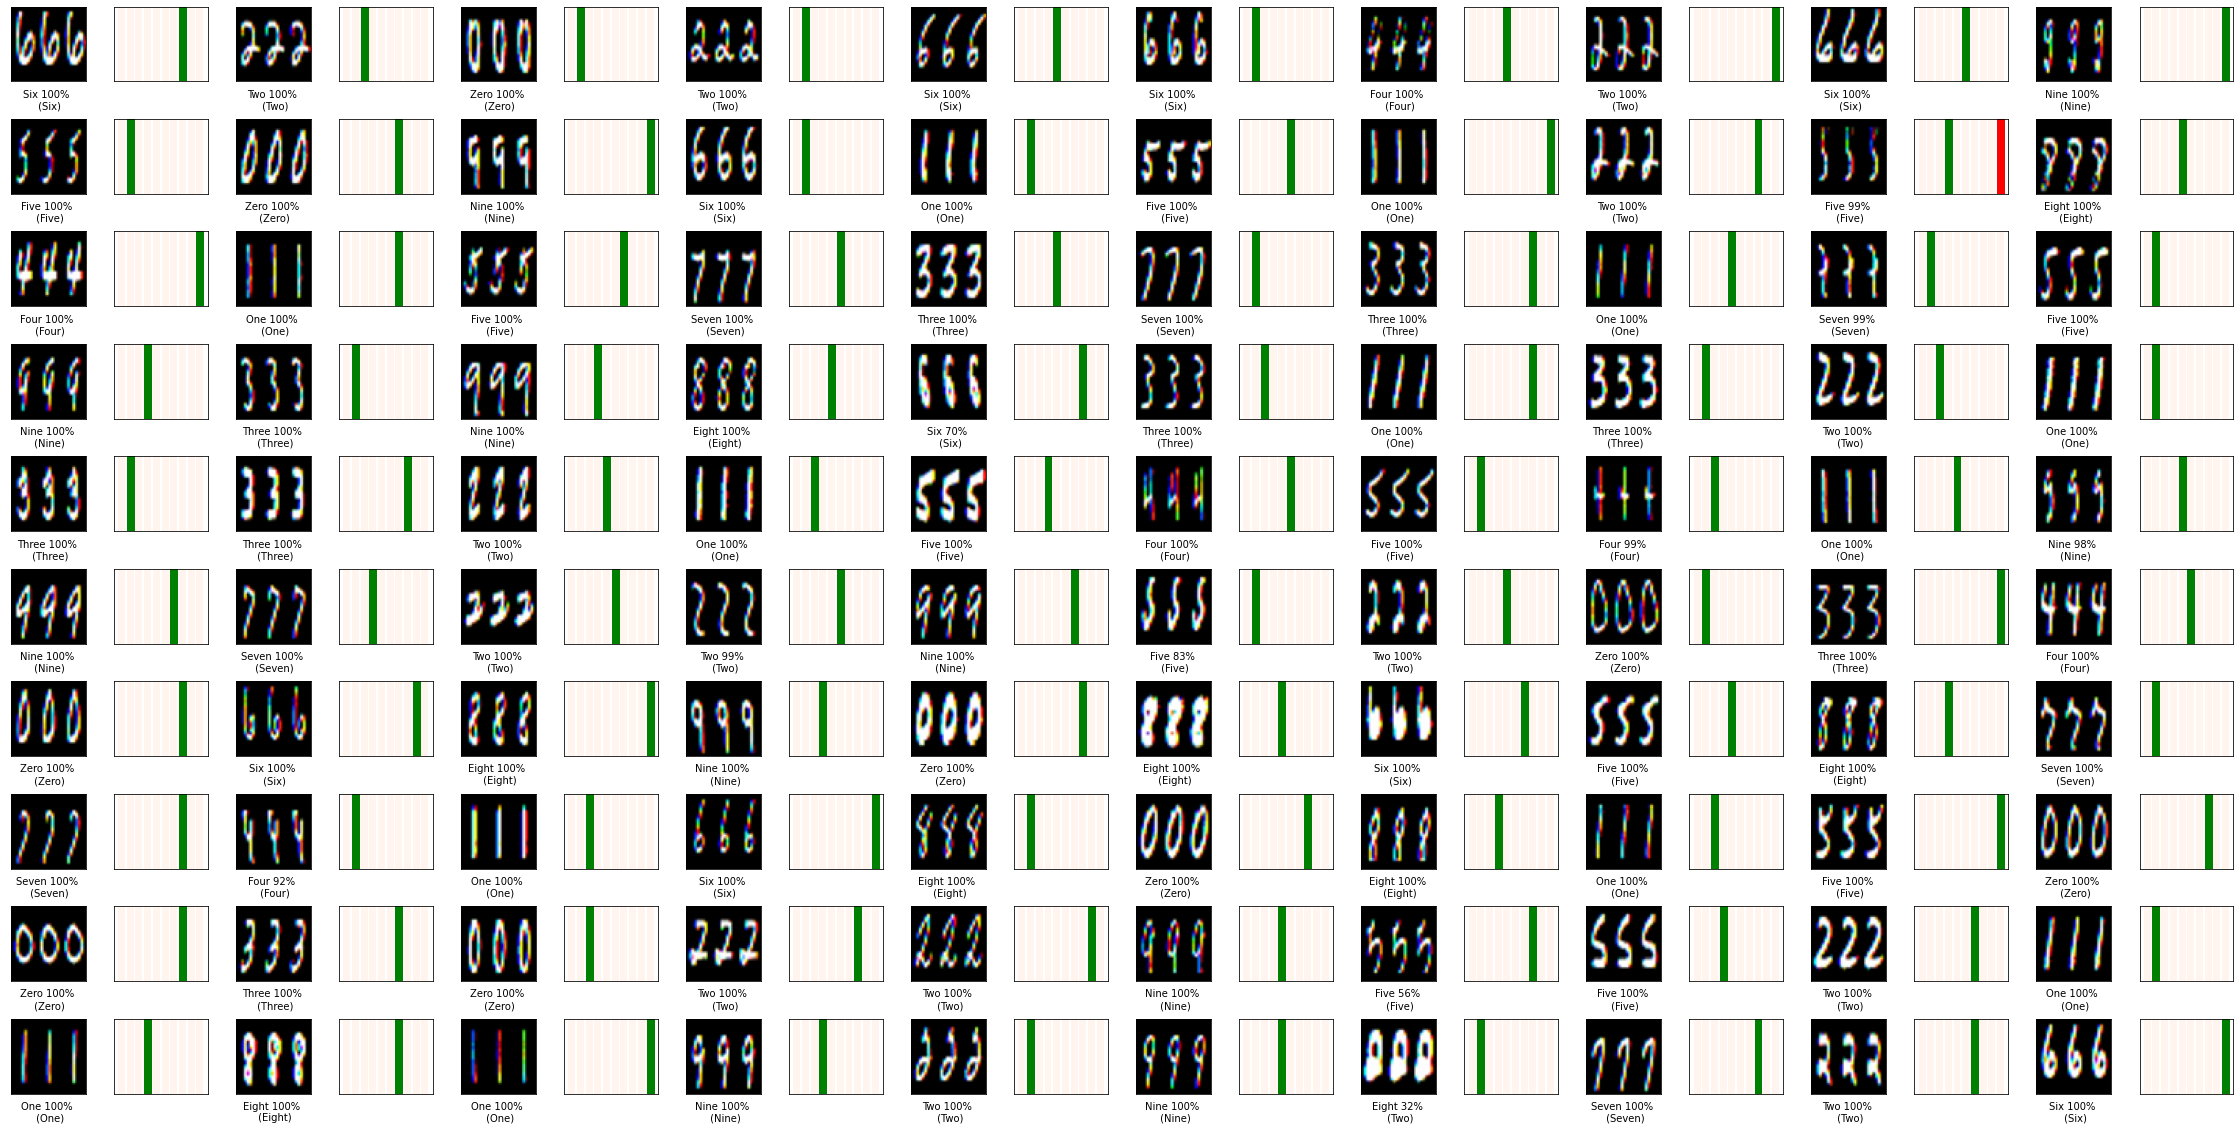

In [26]:
# Define the number of rows and columns for the image grid
num_rows = 10
num_cols = 10

# Calculate the total number of images to display
num_images = num_rows * num_cols

# Set the size of the figure
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Print a title for the plot
print("Classification using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

# Loop over the number of images to display
for i in range(num_images):
    # Define the subplot for the image and prediction values
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    
    # Choose a random index from the validation set
    ii = random.randrange(1, 10000)
    
    # Plot the image and prediction labels
    plot_image(ii, predict_results, val_image_label, val_images_original)
    
    # Define the subplot for the prediction value bar chart
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    # Plot the prediction value bar chart
    plot_value_array(i, predict_results, val_image_label)

# Adjust the vertical spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


Models results, Input image on left, output classification on right. Each correct class is represented in

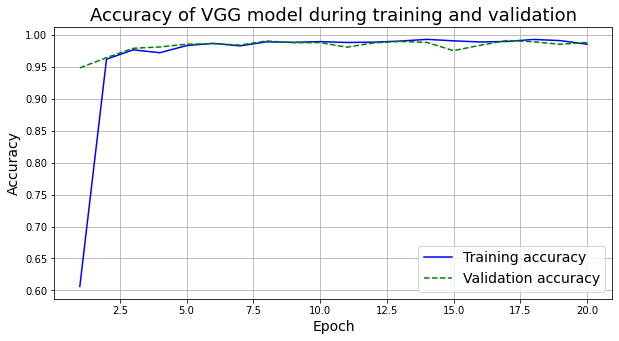

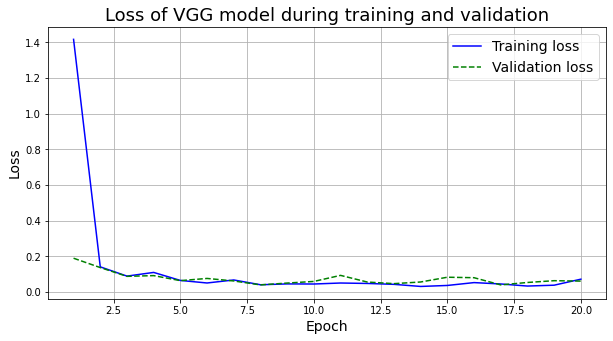

In [27]:
acc = vgg_model.history['accuracy']
val_acc = vgg_model.history['val_accuracy']
loss = vgg_model.history['loss']
val_loss = vgg_model.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation accuracy')
plt.title('Accuracy of VGG model during training and validation', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'g--', label='Validation loss')
plt.title('Loss of VGG model during training and validation', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.show()


In summary, the VGG model started off with very low accuracy, then improved by the 5th epoch to approx. 96%. By epoch 20 the model reached 98-99.4% accuracy at peak. While this model is very good at evaluating mnist, it is likely very over trained on the sppecific data and could have problems on unseen data that is centered differently. This could be solved by image augmentaton, allowing more training variation with the same base image set through slight tweaks to each image.